# NetworkX Introduction - Part 2

In [19]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Input/Output

There are several functions for reading and writing graphs. The following table summarizes their properties.



In [20]:
import io

tabletext ="""
Format, Attributes, Reader, Writer
Adjacency list, Not stored, nx.read_adjlist(), nx.write_adjlist()
Edge list, Not stored, nx.read_edgelist(), nx.write_edgelist()
Graph exchange XML format, Stored, nx.read_gexf(), nx.write_gexf()
Graph modeling language, Stored, nx.read_gml(), nx.write_gml()
GraphML, Stored, nx.read_graphml(), nx.write_graphml()
Pajek NET, Not stored, nx.read_pajek(), nx.write_pajek()
Pickle, Stored, nx.read_gpickle(), nx.write_gpickle()
YAML, Stored, nx.read_yaml(), nx.write_yaml()"""

tabletextIO = io.StringIO(tabletext)

tb = pd.read_csv(tabletextIO)
tb

,Format,Attributes,Reader,Writer
0,Adjacency list,Not stored,nx.read_adjlist(),nx.write_adjlist()
1,Edge list,Not stored,nx.read_edgelist(),nx.write_edgelist()
2,Graph exchange XML format,Stored,nx.read_gexf(),nx.write_gexf()
3,Graph modeling language,Stored,nx.read_gml(),nx.write_gml()
4,GraphML,Stored,nx.read_graphml(),nx.write_graphml()
5,Pajek NET,Not stored,nx.read_pajek(),nx.write_pajek()
6,Pickle,Stored,nx.read_gpickle(),nx.write_gpickle()
7,YAML,Stored,nx.read_yaml(),nx.write_yaml()


In [21]:
%%writefile adjlist.txt
a b
b c d
c b e 
d c e f
e c d g
f d


Overwriting adjlist.txt


In [22]:
!more adjlist.txt

a b
b c d
c b e 
d c e f
e c d g
f d


{'a': {'b': {}}, 'b': {'a': {}, 'c': {}, 'd': {}}, 'c': {'b': {}, 'e': {}, 'd': {}}, 'd': {'b': {}, 'c': {}, 'e': {}, 'f': {}}, 'e': {'c': {}, 'd': {}, 'g': {}}, 'f': {'d': {}}, 'g': {'e': {}}}


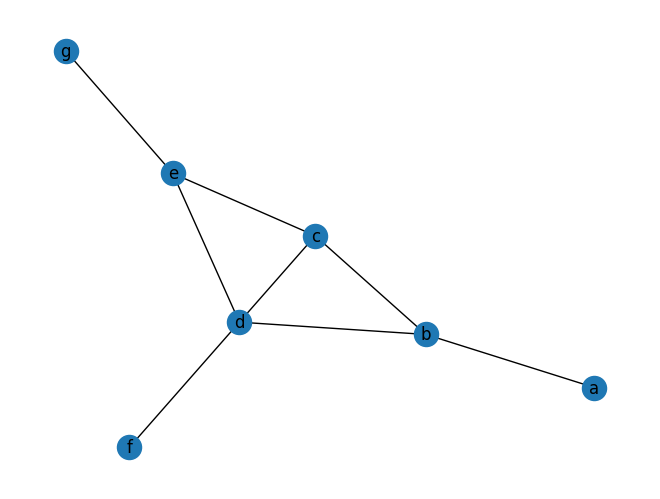

In [23]:
G = nx.read_adjlist('adjlist.txt')
print(G.adj)
nx.draw(G,with_labels=True)

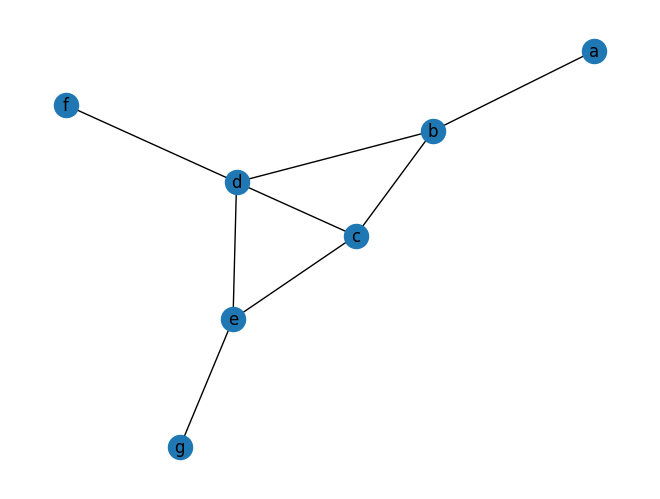

In [24]:
edgelist = \
"""a b
b c 
b d
c b 
c e 
d c 
d e 
d f
e c 
e d 
e g
f d
"""

f = open('edgelist.txt','w')
f.write(edgelist)

G = nx.read_edgelist('edgelist.txt')

nx.draw(G,with_labels=True)

When we have the text representation in a list of strings, we can use function `nx.parse_...()`.

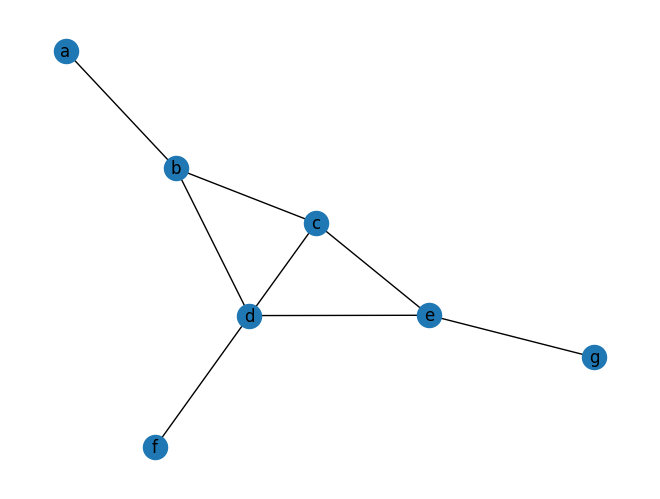

In [25]:
edgelist = ["a b",
"b c", 
"b d",
"c b",
"c e", 
"d c", 
"d e", 
"d f",
"e c", 
"e d", 
"e g",
"f d"
]

G = nx.parse_edgelist(edgelist)

nx.draw(G,with_labels=True)

Graph: [1, 2, 3, 4, 5, 6, 7]
Edges: [(1, 2, {'Weight': 1.0}), (2, 3, {'Weight': 2.0}), (2, 4, {'Weight': 3.2}), (3, 4, {'Weight': 1.7}), (3, 5, {'Weight': 2.3}), (4, 5, {'Weight': 1.3}), (4, 6, {'Weight': 0.4}), (5, 7, {'Weight': 2.0})]


{(1, 2): Text(-0.6077703770438533, -0.5894924172886422, "{'Weight': 1.0}"),
 (2, 3): Text(-0.2521885247236407, -0.23698024422324113, "{'Weight': 2.0}"),
 (2, 4): Text(-0.2868050772059141, -0.05898126733501091, "{'Weight': 3.2}"),
 (3, 4): Text(-0.07946997602029282, 0.03835718771122612, "{'Weight': 1.7}"),
 (3, 5): Text(0.1947168026079625, -0.0194830885598907, "{'Weight': 2.3}"),
 (4, 5): Text(0.1601002501256891, 0.15851588832833952, "{'Weight': 1.3}"),
 (4, 6): Text(-0.08694642556410966, 0.5063235195876552, "{'Weight': 0.4}"),
 (5, 7): Text(0.7171435143769722, 0.15298979228948878, "{'Weight': 2.0}")}

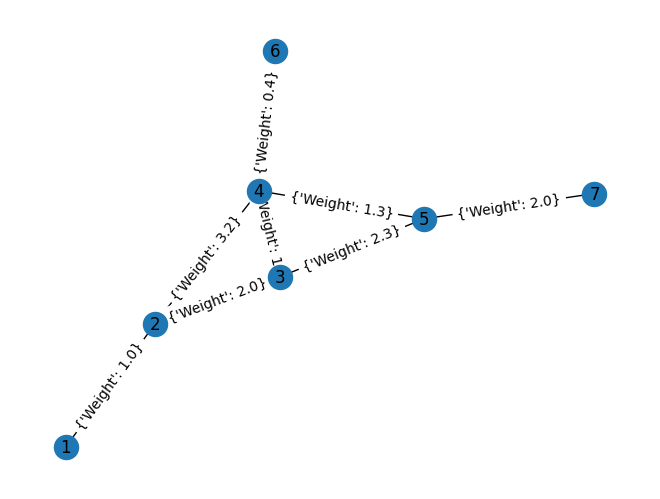

In [26]:
w_edgelist = [
"1 2 1.0",
"2 3 2.0",
"2 4 3.2",
"3 4 1.7",
"3 5 2.3",
"4 5 1.3",
"4 6 0.4",
"5 7 2.0"
]

G = nx.parse_edgelist(w_edgelist, nodetype = int, data=[('Weight', float)])
print('Graph:',list(G))

print('Edges:',list(G.edges(data=True)))

pos = nx.spring_layout(G)
nx.draw(G,pos=pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos=pos)

In [27]:
%%writefile w_edgelist.txt
1 2 1.0
2 3 2.0
2 4 3.2
3 4 1.7
3 5 2.3
4 5 1.3
4 6 0.4
5 7 2.0

Overwriting w_edgelist.txt


## Pandas

Graphs can be built also from Pandas tables (called dataframes) containing list od edges. Do not forget to import pandas.

In [28]:
import pandas as pd

In [29]:
G_df = pd.read_csv('w_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['u', 'v', 'weight'])
G_df

,u,v,weight
0,1,2,1.0
1,2,3,2.0
2,2,4,3.2
3,3,4,1.7
4,3,5,2.3
5,4,5,1.3
6,4,6,0.4
7,5,7,2.0


In the following five cells, the results of chess matches are entered. Each record is a tuple containing 
* ID of the first player
* ID if the second player
* a dictionary with tho item-pairs:
  * `outcome` from the view of the first player (`1`: the first player won, `0`: a tie, `-1` the second player won), and
  * `timestamp` time when the match  was recorded.

In [30]:
# decoding timestamp
import datetime

timestamp = 896148000.000003
dt = datetime.datetime.fromtimestamp(timestamp)
print(dt)

1998-05-26 04:00:00.000003


In [31]:
cel1 = [('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '166', {'outcome': -1, 'timestamp': 906660000.0}),
 ('1', '1241', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '1242', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '808', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('1', '819', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('1', '448', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('1', '1214', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('1', '1217', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('1', '2454', {'outcome': 0, 'timestamp': 938196000.0}),
 ('1', '925', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('1', '91', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('1', '4477', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('1', '1363', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('1', '3644', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('1', '1615', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('1', '1051', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('2', '3', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('2', '1166', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('2', '303', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('2', '926', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('2', '1117', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('2', '2010', {'outcome': -1, 'timestamp': 930312000.0}),
 ('2', '172', {'outcome': 0, 'timestamp': 930312000.0}),
 ('2', '172', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('2', '2240', {'outcome': 0, 'timestamp': 930312000.0}),
 ('2', '2240', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('2', '371', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('2', '14', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('2', '277', {'outcome': -1, 'timestamp': 946080000.0}),
 ('2', '152', {'outcome': 1, 'timestamp': 985500000.0}),
 ('2', '23', {'outcome': 1, 'timestamp': 993384000.0}),
 ('2', '1439', {'outcome': -1, 'timestamp': 993384000.0}),
 ('2', '610', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('2', '3991', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('2', '421', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('2', '462', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('2', '483', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('2', '879', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('2', '456', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('2', '456', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('2', '623', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('2', '477', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('2', '3776', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('2', '673', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('2', '580', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('2', '64', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('2', '2028', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('2', '1677', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('2', '112', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('2', '545', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('2', '545', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('2', '639', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('2', '412', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('2', '983', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('2', '1529', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('2', '418', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('2', '621', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('2', '74', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('2', '3830', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('2', '1184', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('2', '9', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('2', '3989', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('2', '3465', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('2', '7200', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('2', '90', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('3', '89', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('3', '172', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('3', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('3', '236', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('3', '6', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('3', '542', {'outcome': 0, 'timestamp': 890892000.0}),
 ('3', '602', {'outcome': 0, 'timestamp': 890892000.0}),
 ('3', '602', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('3', '680', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('3', '117', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('3', '1035', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('3', '1035', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('3', '1', {'outcome': 0, 'timestamp': 906660000.0}),
 ('3', '1', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('3', '1181', {'outcome': 1, 'timestamp': 906660000.0}),
 ('3', '91', {'outcome': 1, 'timestamp': 906660000.0}),
 ('3', '91', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('3', '59', {'outcome': 0, 'timestamp': 906660000.0}),
 ('3', '1242', {'outcome': 0, 'timestamp': 906660000.0}),
 ('3', '808', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('3', '808', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('3', '9', {'outcome': 0, 'timestamp': 938196000.0}),
 ('3', '9', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('3', '9', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('3', '1472', {'outcome': -1, 'timestamp': 938196000.0}),
 ('3', '453', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('3', '453', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('3', '453', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('3', '1432', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('3', '1125', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('3', '516', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('3', '448', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('3', '1241', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('3', '807', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('3', '1363', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('3', '1406', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('3', '1123', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('3', '18', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('3', '3934', {'outcome': -1, 'timestamp': 1119528000.0}),
 ('3', '1809', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('3', '4234', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('3', '3058', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('3', '1066', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('3', '118', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('3', '4182', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('3', '681', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('3', '394', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('4', '89', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('4', '172', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('4', '236', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('4', '91', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('4', '992', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('4', '1245', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('5', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('5', '236', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('5', '6', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('5', '115', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('5', '3318', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('5', '56', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('5', '2266', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('5', '4637', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('5', '4628', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('5', '2677', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('6', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('6', '91', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('6', '453', {'outcome': 1, 'timestamp': 890892000.0}),
 ('6', '3', {'outcome': 0, 'timestamp': 890892000.0}),
 ('6', '454', {'outcome': 0, 'timestamp': 890892000.0}),
 ('6', '182', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('6', '118', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('6', '680', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('6', '142', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('6', '1035', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('6', '818', {'outcome': 0, 'timestamp': 906660000.0}),
 ('6', '139', {'outcome': 1, 'timestamp': 906660000.0}),
 ('6', '1262', {'outcome': 1, 'timestamp': 906660000.0}),
 ('6', '257', {'outcome': 0, 'timestamp': 946080000.0}),
 ('6', '586', {'outcome': 0, 'timestamp': 946080000.0}),
 ('6', '84', {'outcome': 1, 'timestamp': 985500000.0}),
 ('6', '1711', {'outcome': 0, 'timestamp': 985500000.0}),
 ('6', '214', {'outcome': 1, 'timestamp': 985500000.0}),
 ('6', '90', {'outcome': -1, 'timestamp': 1024920000.0}),
 ('6', '90', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('6', '332', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('6', '332', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('6', '1166', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('6', '1556', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('6', '440', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('6', '500', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('6', '913', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('6', '1308', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('6', '2972', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('6', '4302', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('6', '4029', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('6', '4862', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('6', '1282', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('6', '3737', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('6', '5919', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('6', '3497', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('6', '4883', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('6', '6001', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('6', '6023', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('6', '3103', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('6', '39', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('6', '3113', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('6', '128', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('6', '7115', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('6', '870', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('6', '7166', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('6', '2008', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('7', '8', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('7', '9', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('7', '10', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('8', '67', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('8', '67', {'outcome': -1, 'timestamp': 888264000.000003}),
 ('8', '20', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('8', '68', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('8', '69', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('8', '277', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('8', '322', {'outcome': -1, 'timestamp': 888264000.000003}),
 ('8', '323', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('8', '324', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('8', '631', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('8', '946', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('8', '4060', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('9', '113', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('9', '114', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('9', '477', {'outcome': 0, 'timestamp': 890892000.0}),
 ('9', '269', {'outcome': 1, 'timestamp': 890892000.0}),
 ('9', '200', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('9', '436', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('9', '436', {'outcome': 0, 'timestamp': 922428000.0}),
 ('9', '285', {'outcome': -1, 'timestamp': 922428000.0}),
 ('9', '1194', {'outcome': 0, 'timestamp': 922428000.0}),
 ('9', '448', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('9', '807', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('9', '1214', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('9', '1491', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('9', '1167', {'outcome': 1, 'timestamp': 938196000.0}),
 ('9', '2457', {'outcome': 1, 'timestamp': 938196000.0}),
 ('9', '2515', {'outcome': 1, 'timestamp': 938196000.0}),
 ('9', '819', {'outcome': 0, 'timestamp': 938196000.0}),
 ('9', '819', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('9', '91', {'outcome': -1, 'timestamp': 938196000.0}),
 ('9', '1123', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('9', '310', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('9', '1252', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('9', '2247', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('9', '602', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('9', '736', {'outcome': 0, 'timestamp': 977616000.0}),
 ('9', '2413', {'outcome': 0, 'timestamp': 977616000.0}),
 ('9', '1466', {'outcome': 1, 'timestamp': 977616000.0}),
 ('9', '130', {'outcome': 0, 'timestamp': 985500000.0}),
 ('9', '130', {'outcome': -1, 'timestamp': 993384000.0}),
 ('9', '669', {'outcome': -1, 'timestamp': 985500000.0}),
 ('9', '712', {'outcome': 0, 'timestamp': 985500000.0}),
 ('9', '3113', {'outcome': -1, 'timestamp': 985500000.0}),
 ('9', '3113', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('9', '653', {'outcome': -1, 'timestamp': 993384000.0}),
 ('9', '330', {'outcome': -1, 'timestamp': 993384000.0}),
 ('9', '330', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('9', '731', {'outcome': 0, 'timestamp': 993384000.0}),
 ('9', '81', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('9', '3139', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('9', '127', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('9', '3101', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('9', '1929', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('9', '889', {'outcome': -1, 'timestamp': 1024920000.0}),
 ('9', '223', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('9', '3038', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('9', '3135', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('9', '128', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('9', '3505', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('9', '635', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('9', '453', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('9', '87', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('9', '1035', {'outcome': -1, 'timestamp': 1051200000.0}),
 ('9', '3201', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('9', '817', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('9', '1927', {'outcome': -1, 'timestamp': 1072224000.0}),
 ('9', '4543', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('9', '4545', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('9', '4544', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('9', '3524', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('9', '39', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('9', '4060', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('9', '1117', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('9', '1676', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('9', '4549', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('9', '4542', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('10', '114', {'outcome': -1, 'timestamp': 985500000.0}),
 ('11', '12', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('12', '48', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('12', '517', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('12', '1932', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('12', '115', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('12', '93', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('12', '278', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('12', '2070', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('12', '974', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('12', '3658', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('12', '1796', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('12', '77', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('12', '1087', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('12', '224', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('12', '3465', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('12', '366', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('12', '34', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('12', '4886', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('12', '25', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('12', '1957', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('12', '1835', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('12', '2526', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('12', '3745', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('12', '170', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('12', '1911', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('12', '1201', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('12', '287', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('12', '3024', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('12', '1177', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('12', '174', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('12', '357', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('13', '14', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('13', '14', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('13', '14', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('13', '280', {'outcome': 0, 'timestamp': 898776000.0}),
 ('13', '280', {'outcome': 0, 'timestamp': 914544000.0}),
 ('13', '280', {'outcome': 0, 'timestamp': 993384000.0}),
 ('13', '280', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('13', '280', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('13', '280', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('13', '280', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('13', '280', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('13', '280', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('13', '275', {'outcome': 1, 'timestamp': 898776000.0}),
 ('13', '275', {'outcome': 0, 'timestamp': 930312000.0}),
 ('13', '275', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('13', '275', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('13', '275', {'outcome': -1, 'timestamp': 1043316000.0}),
 ('13', '275', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('13', '275', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('13', '275', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('13', '275', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('13', '211', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('13', '211', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('13', '211', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('13', '211', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('13', '188', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('13', '461', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('13', '461', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('13', '503', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('13', '503', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('13', '98', {'outcome': 1, 'timestamp': 914544000.0}),
 ('13', '98', {'outcome': 0, 'timestamp': 977616000.0}),
 ('13', '98', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('13', '98', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('13', '801', {'outcome': 0, 'timestamp': 914544000.0}),
 ('13', '801', {'outcome': -1, 'timestamp': 930312000.0}),
 ('13', '801', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('13', '801', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('13', '801', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('13', '180', {'outcome': -1, 'timestamp': 946080000.0}),
 ('13', '731', {'outcome': 0, 'timestamp': 946080000.0}),
 ('13', '257', {'outcome': 0, 'timestamp': 946080000.0}),
 ('13', '913', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('13', '913', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('13', '913', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('13', '1027', {'outcome': 1, 'timestamp': 969732000.0}),
 ('13', '1027', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('13', '673', {'outcome': 1, 'timestamp': 969732000.0}),
 ('13', '1244', {'outcome': 1, 'timestamp': 969732000.0}),
 ('13', '537', {'outcome': 1, 'timestamp': 977616000.0}),
 ('13', '537', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('13', '537', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('13', '537', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('13', '1791', {'outcome': 0, 'timestamp': 977616000.0}),
 ('13', '1791', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('13', '1791', {'outcome': -1, 'timestamp': 993384000.0}),
 ('13', '1791', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('13', '1791', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('13', '1202', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('13', '462', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('13', '467', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('13', '440', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('13', '53', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('13', '371', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('13', '371', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('13', '371', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('13', '371', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('13', '371', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('13', '439', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('13', '500', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('13', '1108', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('13', '1108', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('13', '1108', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('13', '272', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('13', '1025', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('13', '580', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('13', '635', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('13', '2574', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('14', '13', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('14', '13', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('14', '280', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('14', '280', {'outcome': 0, 'timestamp': 898776000.0}),
 ('14', '53', {'outcome': 0, 'timestamp': 898776000.0}),
 ('14', '53', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('14', '455', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('14', '537', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('14', '257', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('14', '637', {'outcome': 0, 'timestamp': 906660000.0}),
 ('14', '731', {'outcome': 1, 'timestamp': 906660000.0}),
 ('14', '731', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('14', '207', {'outcome': 0, 'timestamp': 906660000.0}),
 ('14', '1245', {'outcome': 0, 'timestamp': 906660000.0}),
 ('14', '1178', {'outcome': 1, 'timestamp': 906660000.0}),
 ('14', '1160', {'outcome': 0, 'timestamp': 906660000.0}),
 ('14', '1160', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('14', '2028', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('14', '952', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('14', '275', {'outcome': 0, 'timestamp': 938196000.0}),
 ('14', '275', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('14', '98', {'outcome': 1, 'timestamp': 946080000.0}),
 ('14', '643', {'outcome': 0, 'timestamp': 946080000.0}),
 ('14', '211', {'outcome': 0, 'timestamp': 946080000.0}),
 ('14', '127', {'outcome': 0, 'timestamp': 946080000.0}),
 ('14', '580', {'outcome': -1, 'timestamp': 969732000.0}),
 ('14', '798', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('14', '1013', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('14', '3174', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('14', '522', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('14', '1095', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('14', '573', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('14', '1201', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('14', '595', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('14', '862', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('14', '28', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('14', '3195', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('14', '519', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('14', '500', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('14', '838', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('14', '238', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('14', '574', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('14', '828', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('14', '251', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('14', '510', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('14', '412', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('14', '228', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('14', '259', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('14', '132', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('14', '586', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('14', '561', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('14', '2836', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('14', '684', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('14', '36', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('14', '1430', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('14', '3990', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('14', '387', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('14', '3326', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('14', '3326', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('14', '1169', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('14', '421', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('14', '1925', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('14', '3124', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('14', '983', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('14', '2714', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('14', '414', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('14', '414', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('14', '139', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('14', '3989', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('14', '1566', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('14', '1244', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('14', '3077', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('14', '3406', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('14', '621', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('14', '64', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('14', '1294', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('15', '16', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('15', '1266', {'outcome': 1, 'timestamp': 906660000.0}),
 ('15', '1267', {'outcome': 1, 'timestamp': 906660000.0}),
 ('15', '197', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('15', '254', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('15', '256', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('15', '2710', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('15', '104', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('15', '2371', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('15', '3145', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('15', '3150', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('15', '5176', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('15', '921', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('15', '5177', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('15', '6814', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('17', '18', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('17', '300', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('17', '300', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('17', '301', {'outcome': -1, 'timestamp': 888264000.000003}),
 ('17', '302', {'outcome': -1, 'timestamp': 888264000.000003}),
 ('17', '335', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('17', '335', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('17', '649', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('17', '1221', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('17', '1221', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('17', '157', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('17', '158', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('17', '752', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('17', '774', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('17', '2460', {'outcome': 1, 'timestamp': 938196000.0}),
 ('17', '260', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('17', '1103', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('17', '1466', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('17', '2737', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('17', '334', {'outcome': -1, 'timestamp': 964475999.999997}),
 ('17', '334', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('17', '186', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('17', '155', {'outcome': 1, 'timestamp': 977616000.0}),
 ('17', '700', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('17', '739', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('17', '3262', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('17', '92', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('17', '1623', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('17', '42', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('17', '1160', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('17', '2574', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('17', '2170', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('17', '74', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('17', '1108', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('17', '447', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('17', '1548', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('17', '2496', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('17', '3577', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('17', '2319', {'outcome': -1, 'timestamp': 1024920000.0}),
 ('17', '352', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('17', '2984', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('17', '573', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('17', '228', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('17', '164', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('17', '449', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('17', '4244', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('17', '2667', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('17', '720', {'outcome': -1, 'timestamp': 1072224000.0}),
 ('17', '3137', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('17', '4173', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('17', '165', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('17', '327', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('17', '53', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('17', '939', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('17', '2105', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('17', '3934', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('17', '3189', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('18', '170', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('18', '49', {'outcome': -1, 'timestamp': 898776000.0}),
 ('18', '49', {'outcome': -1, 'timestamp': 938196000.0}),
 ('18', '48', {'outcome': -1, 'timestamp': 898776000.0}),
 ('18', '1120', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('18', '1055', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('18', '2289', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('18', '1283', {'outcome': 0, 'timestamp': 938196000.0}),
 ('18', '1522', {'outcome': 0, 'timestamp': 938196000.0}),
 ('18', '2537', {'outcome': 1, 'timestamp': 938196000.0}),
 ('18', '2458', {'outcome': 1, 'timestamp': 969732000.0}),
 ('18', '723', {'outcome': 1, 'timestamp': 969732000.0}),
 ('18', '2576', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('18', '910', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('18', '2570', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('18', '754', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('18', '3520', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('18', '2468', {'outcome': -1, 'timestamp': 1095876000.0}),
 ('18', '2765', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('18', '3201', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('18', '1942', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('18', '1942', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('18', '5580', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('18', '115', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('18', '3785', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('18', '197', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('19', '7', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('19', '8', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('19', '20', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('19', '21', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('19', '22', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('19', '61', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('19', '2900', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('19', '153', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('19', '2249', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('19', '156', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('19', '220', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('19', '1820', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('19', '66', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('19', '197', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('20', '156', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('20', '167', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('20', '184', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('20', '147', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('20', '4540', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('20', '6012', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('21', '115', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('21', '129', {'outcome': 0, 'timestamp': 890892000.0}),
 ('21', '531', {'outcome': 1, 'timestamp': 890892000.0}),
 ('21', '102', {'outcome': 1, 'timestamp': 890892000.0}),
 ('21', '366', {'outcome': 0, 'timestamp': 890892000.0}),
 ('21', '851', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('21', '344', {'outcome': 1, 'timestamp': 898776000.0}),
 ('21', '279', {'outcome': 0, 'timestamp': 898776000.0}),
 ('21', '999', {'outcome': 1, 'timestamp': 898776000.0}),
 ('21', '142', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('21', '503', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('21', '257', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('21', '257', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('21', '545', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('21', '640', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('21', '1177', {'outcome': 0, 'timestamp': 946080000.0}),
 ('21', '1108', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('21', '1820', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('21', '720', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('21', '696', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('21', '2041', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('21', '281', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('21', '4284', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('21', '725', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('21', '56', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('21', '4753', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('21', '2476', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('21', '2317', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('21', '1428', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('21', '153', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('21', '3849', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('21', '4686', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('21', '4712', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('21', '2796', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('21', '3530', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('21', '2676', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('21', '246', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('22', '20', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('22', '217', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('23', '1', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('23', '2', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('23', '3', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('23', '1439', {'outcome': -1, 'timestamp': 922428000.0}),
 ('23', '1439', {'outcome': -1, 'timestamp': 993384000.0}),
 ('23', '1439', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('23', '2008', {'outcome': 1, 'timestamp': 922428000.0}),
 ('23', '2008', {'outcome': 0, 'timestamp': 993384000.0}),
 ('23', '2008', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('23', '172', {'outcome': -1, 'timestamp': 922428000.0}),
 ('23', '172', {'outcome': 0, 'timestamp': 993384000.0}),
 ('23', '90', {'outcome': 0, 'timestamp': 922428000.0}),
 ('23', '90', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('23', '952', {'outcome': 0, 'timestamp': 922428000.0}),
 ('23', '352', {'outcome': -1, 'timestamp': 993384000.0}),
 ('23', '2718', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('23', '165', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('23', '605', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('23', '2057', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('23', '3473', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('23', '4867', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('23', '4078', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('23', '232', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('24', '25', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('24', '890', {'outcome': 1, 'timestamp': 898776000.0}),
 ('24', '142', {'outcome': 1, 'timestamp': 898776000.0}),
 ('24', '21', {'outcome': 0, 'timestamp': 898776000.0}),
 ('24', '1314', {'outcome': 1, 'timestamp': 906660000.0}),
 ('24', '222', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('24', '372', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('24', '1118', {'outcome': 0, 'timestamp': 914544000.0}),
 ('24', '2009', {'outcome': 1, 'timestamp': 922428000.0}),
 ('24', '733', {'outcome': 1, 'timestamp': 922428000.0}),
 ('24', '462', {'outcome': -1, 'timestamp': 922428000.0}),
 ('24', '1882', {'outcome': 0, 'timestamp': 938196000.0}),
 ('24', '1025', {'outcome': 0, 'timestamp': 969732000.0}),
 ('24', '160', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('24', '242', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('24', '1281', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('24', '1578', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('24', '3290', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('24', '2957', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('24', '710', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('24', '1636', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('24', '2959', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('24', '1652', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('24', '849', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('24', '364', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('24', '2840', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('24', '3814', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('24', '2614', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('24', '3150', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('24', '204', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('25', '30', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('25', '93', {'outcome': -1, 'timestamp': 898776000.0}),
 ('25', '922', {'outcome': 1, 'timestamp': 898776000.0}),
 ('25', '316', {'outcome': -1, 'timestamp': 898776000.0}),
 ('25', '910', {'outcome': 1, 'timestamp': 930312000.0}),
 ('25', '315', {'outcome': 0, 'timestamp': 930312000.0}),
 ('25', '2268', {'outcome': 1, 'timestamp': 930312000.0}),
 ('25', '172', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('25', '90', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('25', '2416', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('25', '115', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('25', '115', {'outcome': -1, 'timestamp': 1069596000.0}),
 ('25', '2681', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('25', '4018', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('25', '2990', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('25', '184', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('25', '1125', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('25', '1719', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('25', '132', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('25', '3743', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('25', '268', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('25', '215', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('25', '4924', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('25', '4215', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('25', '3747', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('25', '6059', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('25', '5522', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('25', '1957', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('25', '1851', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('25', '2673', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('25', '4333', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('25', '6424', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('25', '1177', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('25', '48', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('25', '2152', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('26', '27', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('27', '222', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('27', '107', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('28', '29', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('28', '411', {'outcome': -1, 'timestamp': 890892000.0}),
 ('28', '74', {'outcome': 0, 'timestamp': 890892000.0}),
 ('28', '261', {'outcome': 0, 'timestamp': 890892000.0}),
 ('28', '190', {'outcome': 0, 'timestamp': 890892000.0}),
 ('28', '412', {'outcome': 1, 'timestamp': 890892000.0}),
 ('28', '412', {'outcome': -1, 'timestamp': 1085364000.0}),
 ('28', '56', {'outcome': -1, 'timestamp': 890892000.0}),
 ('28', '891', {'outcome': 1, 'timestamp': 898776000.0}),
 ('28', '174', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('28', '517', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('28', '182', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('28', '897', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('28', '53', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('28', '2995', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('28', '2837', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('28', '2805', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('28', '432', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('29', '131', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('29', '77', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('30', '31', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('30', '651', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('30', '653', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('30', '653', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('30', '653', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('30', '653', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('30', '653', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('30', '654', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('30', '654', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('30', '654', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('30', '654', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('30', '256', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('30', '54', {'outcome': 0, 'timestamp': 906660000.0}),
 ('30', '483', {'outcome': 0, 'timestamp': 906660000.0}),
 ('30', '502', {'outcome': 0, 'timestamp': 906660000.0}),
 ('30', '573', {'outcome': 0, 'timestamp': 906660000.0}),
 ('30', '232', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('30', '2749', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('30', '1963', {'outcome': 0, 'timestamp': 961848000.0}),
 ('30', '3519', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('30', '21', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('30', '3565', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('30', '662', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('30', '1366', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('30', '663', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('30', '663', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('30', '227', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('30', '952', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('30', '449', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('30', '3023', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('30', '1857', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('30', '3154', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('30', '2823', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('30', '643', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('30', '1677', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('30', '3989', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('30', '421', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('30', '2090', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('30', '2090', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('30', '330', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('30', '674', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('30', '789', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('30', '789', {'outcome': -1, 'timestamp': 1114272000.0}),
 ('30', '3463', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('30', '3463', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('30', '874', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('30', '4553', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('30', '655', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('30', '4569', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('30', '3762', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('30', '3457', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('30', '1859', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('30', '2796', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('30', '272', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('31', '1131', {'outcome': 0, 'timestamp': 914544000.0}),
 ('31', '1728', {'outcome': 0, 'timestamp': 914544000.0}),
 ('31', '333', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('31', '1933', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('31', '252', {'outcome': -1, 'timestamp': 953964000.0}),
 ('31', '330', {'outcome': -1, 'timestamp': 953964000.0}),
 ('31', '239', {'outcome': -1, 'timestamp': 953964000.0}),
 ('31', '2988', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('31', '2009', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('31', '2990', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('31', '1081', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('32', '33', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('32', '34', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('32', '35', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('32', '36', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('32', '37', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('32', '884', {'outcome': 1, 'timestamp': 898776000.0}),
 ('32', '897', {'outcome': 0, 'timestamp': 898776000.0}),
 ('32', '898', {'outcome': 0, 'timestamp': 898776000.0}),
 ('32', '898', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('32', '468', {'outcome': 1, 'timestamp': 898776000.0}),
 ('32', '899', {'outcome': 0, 'timestamp': 898776000.0}),
 ('32', '172', {'outcome': -1, 'timestamp': 906660000.0}),
 ('32', '61', {'outcome': 0, 'timestamp': 906660000.0}),
 ('32', '164', {'outcome': -1, 'timestamp': 906660000.0}),
 ('32', '1357', {'outcome': 1, 'timestamp': 906660000.0}),
 ('32', '922', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('32', '276', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('32', '803', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('32', '803', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('32', '483', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('32', '440', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('32', '886', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('32', '886', {'outcome': 1, 'timestamp': 930312000.0}),
 ('32', '676', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('32', '997', {'outcome': 0, 'timestamp': 969732000.0}),
 ('32', '88', {'outcome': 0, 'timestamp': 977616000.0}),
 ('32', '2184', {'outcome': 1, 'timestamp': 993384000.0}),
 ('32', '3225', {'outcome': 0, 'timestamp': 993384000.0}),
 ('32', '2269', {'outcome': 1, 'timestamp': 993384000.0}),
 ('32', '401', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('32', '960', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('32', '2079', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('32', '1557', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('32', '2230', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('32', '320', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('32', '1862', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('32', '2594', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('32', '1134', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('32', '641', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('32', '1099', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('32', '3853', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('32', '2986', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('32', '471', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('32', '3194', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('32', '1466', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('32', '3679', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('32', '834', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('32', '496', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('32', '496', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('32', '4214', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('32', '3924', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('32', '2667', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('32', '670', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('32', '670', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('32', '3548', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('32', '1232', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('32', '98', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('32', '537', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('32', '959', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('32', '4445', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('32', '4445', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('32', '3101', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('32', '188', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('32', '928', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('32', '153', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('32', '259', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('32', '2131', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('32', '4368', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('32', '189', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('32', '3925', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('32', '3112', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('32', '4060', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('32', '166', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('33', '42', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('33', '43', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('33', '773', {'outcome': 0, 'timestamp': 898776000.0}),
 ('33', '900', {'outcome': 1, 'timestamp': 898776000.0}),
 ('33', '901', {'outcome': 0, 'timestamp': 898776000.0}),
 ('33', '902', {'outcome': 0, 'timestamp': 898776000.0}),
 ('33', '468', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('33', '79', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('33', '200', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('33', '200', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('33', '1308', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('33', '75', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('33', '922', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('33', '61', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('33', '188', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('33', '1194', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('33', '2061', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('33', '2067', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('33', '1608', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('33', '2380', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('33', '2380', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('33', '1099', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('33', '2003', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('33', '201', {'outcome': -1, 'timestamp': 1064340000.0}),
 ('33', '2138', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('33', '1025', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('33', '1796', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('33', '3392', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('34', '47', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('34', '48', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('34', '890', {'outcome': 1, 'timestamp': 898776000.0}),
 ('34', '278', {'outcome': 0, 'timestamp': 898776000.0}),
 ('34', '1760', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('34', '1177', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('34', '522', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('34', '931', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('34', '423', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('34', '64', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('34', '64', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('34', '256', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('34', '266', {'outcome': 1, 'timestamp': 961848000.0}),
 ('34', '266', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('34', '265', {'outcome': 0, 'timestamp': 961848000.0}),
 ('34', '1327', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('34', '965', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('34', '25', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('34', '25', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('34', '234', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('34', '268', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('34', '14', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('34', '215', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('34', '1944', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('34', '267', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('35', '12', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('35', '163', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('35', '2724', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('35', '2170', {'outcome': 1, 'timestamp': 969732000.0}),
 ('35', '1809', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('35', '2930', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('35', '2317', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('35', '1675', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('35', '3799', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('36', '207', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('36', '207', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('36', '441', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('36', '188', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('36', '775', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('36', '775', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('36', '776', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('36', '24', {'outcome': 0, 'timestamp': 898776000.0}),
 ('36', '728', {'outcome': 0, 'timestamp': 898776000.0}),
 ('36', '573', {'outcome': -1, 'timestamp': 898776000.0}),
 ('36', '573', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('36', '919', {'outcome': 1, 'timestamp': 898776000.0}),
 ('36', '579', {'outcome': 0, 'timestamp': 898776000.0}),
 ('36', '1194', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('36', '1173', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('36', '883', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('36', '686', {'outcome': 0, 'timestamp': 906660000.0}),
 ('36', '1658', {'outcome': 1, 'timestamp': 906660000.0}),
 ('36', '1526', {'outcome': 1, 'timestamp': 906660000.0}),
 ('36', '163', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('36', '956', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('36', '201', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('36', '1327', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('36', '2598', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('36', '112', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('36', '2631', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('36', '465', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('36', '237', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('36', '1827', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('36', '3456', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('36', '104', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('36', '635', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('36', '902', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('36', '721', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('36', '519', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('36', '3608', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('36', '287', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('36', '3926', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('36', '3448', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('36', '741', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('36', '4455', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('36', '2032', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('36', '220', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('36', '1719', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('36', '259', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('36', '476', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('36', '4215', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('36', '1117', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('36', '77', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('36', '89', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('36', '1191', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('36', '251', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('36', '385', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('36', '6053', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('36', '266', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('36', '6131', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('36', '41', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('36', '4018', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('37', '35', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('37', '1049', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('37', '275', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('37', '72', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('37', '2894', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('37', '1178', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('37', '115', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('37', '12', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('37', '199', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('37', '910', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('37', '257', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('37', '79', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('37', '64', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('37', '4870', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('37', '5350', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('37', '3147', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('37', '458', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('38', '39', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('38', '40', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('38', '41', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('38', '3101', {'outcome': -1, 'timestamp': 985500000.0}),
 ('38', '84', {'outcome': -1, 'timestamp': 985500000.0}),
 ('38', '3104', {'outcome': 1, 'timestamp': 985500000.0})]

In [32]:
cel2 = [('38', '3112', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('38', '2209', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('38', '2209', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('38', '505', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('38', '3225', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('38', '816', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('38', '6595', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('38', '269', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('38', '128', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('38', '128', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('38', '4540', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('38', '3120', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('39', '53', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('39', '728', {'outcome': 0, 'timestamp': 914544000.0}),
 ('39', '202', {'outcome': -1, 'timestamp': 914544000.0}),
 ('39', '2493', {'outcome': 1, 'timestamp': 938196000.0}),
 ('39', '788', {'outcome': 1, 'timestamp': 938196000.0}),
 ('39', '3036', {'outcome': 1, 'timestamp': 977616000.0}),
 ('39', '3037', {'outcome': -1, 'timestamp': 977616000.0}),
 ('39', '114', {'outcome': 1, 'timestamp': 977616000.0}),
 ('39', '223', {'outcome': 1, 'timestamp': 977616000.0}),
 ('39', '3038', {'outcome': -1, 'timestamp': 977616000.0}),
 ('39', '3038', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('39', '269', {'outcome': 0, 'timestamp': 977616000.0}),
 ('39', '269', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('39', '2209', {'outcome': 0, 'timestamp': 977616000.0}),
 ('39', '713', {'outcome': 0, 'timestamp': 977616000.0}),
 ('39', '41', {'outcome': 0, 'timestamp': 977616000.0}),
 ('39', '3105', {'outcome': 0, 'timestamp': 985500000.0}),
 ('39', '100', {'outcome': 1, 'timestamp': 985500000.0}),
 ('39', '2195', {'outcome': -1, 'timestamp': 985500000.0}),
 ('39', '870', {'outcome': 0, 'timestamp': 985500000.0}),
 ('39', '9', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('39', '81', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('39', '3139', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('39', '128', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('39', '2121', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('39', '2', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('39', '4539', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('39', '3113', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('39', '3113', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('39', '3506', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('39', '467', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('39', '773', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('39', '191', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('39', '3103', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('39', '76', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('39', '179', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('39', '46', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('39', '2400', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('39', '152', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('39', '4547', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('39', '4535', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('39', '2718', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('39', '914', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('39', '3977', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('40', '101', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('40', '130', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('40', '156', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('40', '114', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('40', '669', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('40', '269', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('40', '127', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('40', '152', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('40', '712', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('40', '68', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('41', '100', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('41', '9', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('41', '126', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('41', '147', {'outcome': 1, 'timestamp': 890892000.0}),
 ('41', '156', {'outcome': 0, 'timestamp': 890892000.0}),
 ('41', '477', {'outcome': -1, 'timestamp': 890892000.0}),
 ('41', '269', {'outcome': 1, 'timestamp': 890892000.0}),
 ('41', '269', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('41', '269', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('41', '269', {'outcome': 0, 'timestamp': 977616000.0}),
 ('41', '81', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('41', '40', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('41', '40', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('41', '128', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('41', '152', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('41', '152', {'outcome': 0, 'timestamp': 977616000.0}),
 ('41', '712', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('41', '68', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('41', '2531', {'outcome': 1, 'timestamp': 938196000.0}),
 ('41', '3036', {'outcome': 0, 'timestamp': 977616000.0}),
 ('41', '3037', {'outcome': -1, 'timestamp': 977616000.0}),
 ('41', '3038', {'outcome': 1, 'timestamp': 977616000.0}),
 ('41', '47', {'outcome': 0, 'timestamp': 985500000.0}),
 ('41', '4547', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('41', '4538', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('41', '46', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('41', '1879', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('41', '3789', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('41', '36', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('41', '4003', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('41', '124', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('41', '3120', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('42', '446', {'outcome': 1, 'timestamp': 890892000.0}),
 ('42', '446', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('42', '456', {'outcome': -1, 'timestamp': 890892000.0}),
 ('42', '478', {'outcome': 1, 'timestamp': 890892000.0}),
 ('42', '458', {'outcome': 0, 'timestamp': 890892000.0}),
 ('42', '89', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('42', '400', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('42', '400', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('42', '980', {'outcome': 1, 'timestamp': 898776000.0}),
 ('42', '316', {'outcome': 1, 'timestamp': 898776000.0}),
 ('42', '145', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('42', '113', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('42', '1181', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('42', '455', {'outcome': 1, 'timestamp': 906660000.0}),
 ('42', '455', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('42', '477', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('42', '2437', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('42', '1257', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('42', '1623', {'outcome': 0, 'timestamp': 946080000.0}),
 ('42', '1624', {'outcome': 0, 'timestamp': 946080000.0}),
 ('42', '1571', {'outcome': 0, 'timestamp': 946080000.0}),
 ('42', '1942', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('42', '2250', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('42', '237', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('42', '648', {'outcome': 0, 'timestamp': 959220000.000003}),
 ('42', '649', {'outcome': 0, 'timestamp': 959220000.000003}),
 ('42', '1990', {'outcome': 0, 'timestamp': 959220000.000003}),
 ('42', '2986', {'outcome': 1, 'timestamp': 977616000.0}),
 ('42', '1180', {'outcome': 0, 'timestamp': 977616000.0}),
 ('42', '1180', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('42', '1180', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('42', '725', {'outcome': 0, 'timestamp': 977616000.0}),
 ('42', '2405', {'outcome': 1, 'timestamp': 977616000.0}),
 ('42', '2733', {'outcome': 1, 'timestamp': 977616000.0}),
 ('42', '1683', {'outcome': 0, 'timestamp': 977616000.0}),
 ('42', '61', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('42', '1230', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('42', '1609', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('42', '299', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('42', '748', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('42', '748', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('42', '748', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('42', '748', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('42', '2363', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('42', '1272', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('42', '1209', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('42', '1057', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('42', '1057', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('42', '1057', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('42', '1875', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('42', '833', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('42', '2330', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('42', '752', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('42', '659', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('42', '497', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('42', '497', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('42', '1202', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('42', '573', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('42', '3604', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('42', '98', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('42', '98', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('42', '731', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('42', '447', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('42', '447', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('42', '421', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('42', '1482', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('42', '2731', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('42', '3562', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('42', '827', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('42', '827', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('42', '728', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('42', '66', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('42', '219', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('42', '897', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('42', '673', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('42', '981', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('42', '1245', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('42', '4001', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('42', '4001', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('42', '1178', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('42', '1178', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('42', '601', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('42', '1179', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('42', '983', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('42', '246', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('42', '2023', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('42', '174', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('42', '174', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('42', '2716', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('42', '1234', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('42', '92', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('42', '913', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('42', '482', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('42', '4846', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('42', '393', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('42', '1214', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('42', '164', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('42', '1997', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('42', '383', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('42', '2006', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('42', '485', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('42', '6744', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('42', '1190', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('42', '62', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('42', '3740', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('42', '5859', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('43', '131', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('43', '198', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('43', '1958', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('43', '240', {'outcome': -1, 'timestamp': 1114272000.0}),
 ('44', '19', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('44', '45', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('44', '46', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('44', '674', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('44', '655', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('44', '443', {'outcome': 0, 'timestamp': 906660000.0}),
 ('44', '1112', {'outcome': -1, 'timestamp': 906660000.0}),
 ('44', '1364', {'outcome': -1, 'timestamp': 906660000.0}),
 ('44', '92', {'outcome': 0, 'timestamp': 914544000.0}),
 ('44', '126', {'outcome': 0, 'timestamp': 914544000.0}),
 ('44', '2161', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('44', '260', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('44', '736', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('44', '190', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('44', '2162', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('44', '1117', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('44', '1177', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('44', '2926', {'outcome': 1, 'timestamp': 969732000.0}),
 ('44', '1430', {'outcome': 1, 'timestamp': 969732000.0}),
 ('44', '1430', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('44', '400', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('44', '2143', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('44', '2391', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('44', '3339', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('44', '2292', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('44', '2583', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('44', '4089', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('44', '2940', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('44', '2593', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('44', '902', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('44', '563', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('44', '2716', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('44', '2476', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('44', '4460', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('44', '1928', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('44', '1273', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('44', '2478', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('44', '5136', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('44', '1741', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('44', '71', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('44', '1201', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('44', '3558', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('44', '3924', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('44', '6094', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('44', '3307', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('44', '7194', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('44', '314', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('45', '67', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('45', '152', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('45', '132', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('45', '535', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('45', '882', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('45', '687', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('45', '687', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('45', '687', {'outcome': 0, 'timestamp': 1077480000.0}),
 ('45', '643', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('45', '643', {'outcome': -1, 'timestamp': 946080000.0}),
 ('45', '1285', {'outcome': 1, 'timestamp': 906660000.0}),
 ('45', '300', {'outcome': 0, 'timestamp': 906660000.0}),
 ('45', '832', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('45', '1117', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('45', '2888', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('45', '466', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('45', '123', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('45', '2103', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('45', '573', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('45', '503', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('45', '692', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('45', '1210', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('45', '741', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('45', '129', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('45', '36', {'outcome': -1, 'timestamp': 1043316000.0}),
 ('45', '2247', {'outcome': -1, 'timestamp': 1043316000.0}),
 ('45', '30', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('45', '2', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('45', '537', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('45', '773', {'outcome': 0, 'timestamp': 1077480000.0}),
 ('45', '875', {'outcome': 0, 'timestamp': 1077480000.0}),
 ('45', '3767', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('45', '1257', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('45', '4576', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('45', '548', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('45', '4489', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('45', '285', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('45', '461', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('45', '1711', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('45', '1482', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('45', '2200', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('45', '862', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('46', '224', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('46', '250', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('46', '217', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('46', '214', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('46', '41', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('46', '3104', {'outcome': 0, 'timestamp': 985500000.0}),
 ('46', '713', {'outcome': 0, 'timestamp': 985500000.0}),
 ('46', '9', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('46', '1403', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('46', '128', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('46', '128', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('46', '256', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('46', '3120', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('46', '3120', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('46', '152', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('46', '4549', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('46', '39', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('46', '3113', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('46', '2143', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('46', '102', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('47', '33', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('47', '36', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('47', '256', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('47', '717', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('47', '495', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('47', '719', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('47', '763', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('47', '152', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('47', '227', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('47', '227', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('47', '275', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('47', '878', {'outcome': 0, 'timestamp': 938196000.0}),
 ('47', '1421', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('47', '178', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('47', '188', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('47', '48', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('47', '824', {'outcome': 0, 'timestamp': 969732000.0}),
 ('47', '1929', {'outcome': 1, 'timestamp': 985500000.0}),
 ('47', '237', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('47', '433', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('47', '2800', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('47', '2612', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('47', '3938', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('47', '3939', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('47', '2023', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('47', '278', {'outcome': -1, 'timestamp': 1114272000.0}),
 ('47', '3541', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('47', '2278', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('47', '1252', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('47', '161', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('47', '1393', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('47', '1005', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('47', '5978', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('47', '3518', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('47', '4284', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('47', '543', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('47', '637', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('47', '2986', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('47', '62', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('47', '2111', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('47', '337', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('47', '6030', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('47', '778', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('48', '131', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('48', '245', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('48', '64', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('48', '499', {'outcome': 0, 'timestamp': 890892000.0}),
 ('48', '49', {'outcome': 0, 'timestamp': 898776000.0}),
 ('48', '197', {'outcome': 0, 'timestamp': 898776000.0}),
 ('48', '133', {'outcome': -1, 'timestamp': 938196000.0}),
 ('48', '2311', {'outcome': 0, 'timestamp': 938196000.0}),
 ('48', '487', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('48', '226', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('48', '182', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('48', '1270', {'outcome': 1, 'timestamp': 969732000.0}),
 ('48', '849', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('48', '2196', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('48', '237', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('48', '1181', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('48', '222', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('48', '256', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('48', '138', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('49', '50', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('49', '12', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('49', '51', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('49', '52', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('49', '263', {'outcome': 0, 'timestamp': 898776000.0}),
 ('49', '28', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('49', '220', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('49', '220', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('49', '220', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('49', '131', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('49', '170', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('49', '117', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('49', '1636', {'outcome': 0, 'timestamp': 969732000.0}),
 ('49', '1149', {'outcome': 0, 'timestamp': 977616000.0}),
 ('49', '579', {'outcome': 1, 'timestamp': 977616000.0}),
 ('49', '1327', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('49', '34', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('49', '910', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('49', '965', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('49', '965', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('49', '61', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('49', '278', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('49', '64', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('49', '138', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('49', '723', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('49', '266', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('49', '3456', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('49', '1527', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('49', '47', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('49', '1268', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('49', '79', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('49', '3503', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('49', '2661', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('50', '107', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('50', '1942', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('50', '35', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('50', '253', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('50', '2721', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('51', '182', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('51', '135', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('51', '79', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('51', '275', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('51', '256', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('51', '33', {'outcome': 0, 'timestamp': 898776000.0}),
 ('51', '33', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('51', '285', {'outcome': -1, 'timestamp': 898776000.0}),
 ('51', '200', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('51', '200', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('51', '200', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('51', '1302', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('51', '1823', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('51', '255', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('51', '255', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('51', '47', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('51', '138', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('51', '2057', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('51', '197', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('51', '638', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('51', '2067', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('51', '2003', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('51', '70', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('51', '1363', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('51', '2079', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('51', '2773', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('51', '2077', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('51', '2422', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('51', '3010', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('51', '2402', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('51', '731', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('51', '2413', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('51', '2050', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('51', '2170', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('51', '1194', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('51', '1835', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('51', '418', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('51', '418', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('51', '2405', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('51', '1608', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('51', '387', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('51', '2101', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('51', '199', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('51', '1283', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('51', '2847', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('51', '698', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('51', '2780', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('51', '775', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('51', '3813', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('51', '644', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('52', '3718', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('53', '8', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('53', '84', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('53', '152', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('53', '85', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('53', '127', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('53', '127', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('53', '132', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('53', '129', {'outcome': 1, 'timestamp': 890892000.0}),
 ('53', '502', {'outcome': 1, 'timestamp': 890892000.0}),
 ('53', '426', {'outcome': 0, 'timestamp': 890892000.0}),
 ('53', '510', {'outcome': 1, 'timestamp': 890892000.0}),
 ('53', '510', {'outcome': 0, 'timestamp': 914544000.0}),
 ('53', '510', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('53', '439', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('53', '439', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('53', '13', {'outcome': 0, 'timestamp': 898776000.0}),
 ('53', '225', {'outcome': 1, 'timestamp': 914544000.0}),
 ('53', '656', {'outcome': 0, 'timestamp': 914544000.0}),
 ('53', '656', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('53', '373', {'outcome': 1, 'timestamp': 914544000.0}),
 ('53', '207', {'outcome': 1, 'timestamp': 922428000.0}),
 ('53', '207', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('53', '62', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('53', '226', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('53', '2578', {'outcome': 1, 'timestamp': 938196000.0}),
 ('53', '126', {'outcome': 0, 'timestamp': 938196000.0}),
 ('53', '1533', {'outcome': 1, 'timestamp': 938196000.0}),
 ('53', '211', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('53', '1393', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('53', '371', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('53', '467', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('53', '467', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('53', '467', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('53', '440', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('53', '440', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('53', '913', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('53', '455', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('53', '1197', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('53', '1197', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('53', '387', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('53', '387', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('53', '1226', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('53', '880', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('53', '451', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('53', '3525', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('53', '383', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('53', '30', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('53', '45', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('53', '32', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('53', '720', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('53', '130', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('53', '172', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('53', '653', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('53', '64', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('53', '563', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('53', '2209', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('53', '457', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('53', '3326', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('53', '214', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('53', '3073', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('53', '3073', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('53', '973', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('53', '3189', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('53', '465', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('53', '153', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('53', '188', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('53', '257', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('53', '1791', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('53', '3757', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('53', '251', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('53', '3913', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('53', '1245', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('53', '3865', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('53', '372', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('53', '803', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('53', '3710', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('53', '3150', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('53', '742', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('54', '55', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('54', '56', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('54', '439', {'outcome': -1, 'timestamp': 890892000.0}),
 ('54', '440', {'outcome': 0, 'timestamp': 890892000.0}),
 ('54', '882', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('54', '659', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('54', '880', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('54', '6', {'outcome': 0, 'timestamp': 906660000.0}),
 ('54', '801', {'outcome': 0, 'timestamp': 906660000.0}),
 ('54', '275', {'outcome': 0, 'timestamp': 906660000.0}),
 ('54', '621', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('54', '3106', {'outcome': 0, 'timestamp': 985500000.0}),
 ('54', '3106', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('54', '3106', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('54', '3106', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('54', '2675', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('54', '2356', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('54', '1366', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('54', '2357', {'outcome': -1, 'timestamp': 1024920000.0}),
 ('54', '2357', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('54', '2357', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('54', '654', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('54', '2203', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('54', '862', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('54', '2307', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('54', '2307', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('54', '973', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('54', '3769', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('54', '4302', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('54', '983', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('54', '3786', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('54', '4115', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('54', '4115', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('54', '4115', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('54', '4115', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('54', '1677', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('54', '1677', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('54', '1183', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('54', '5821', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('54', '4162', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('54', '1545', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('55', '2319', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('55', '1033', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('55', '1033', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('55', '1033', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('55', '3366', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('55', '2710', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('55', '2354', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('55', '1631', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('55', '2277', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('55', '3754', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('55', '128', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('55', '920', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('55', '521', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('55', '1134', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('55', '670', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('55', '1415', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('56', '636', {'outcome': 0, 'timestamp': 890892000.0}),
 ('56', '567', {'outcome': 1, 'timestamp': 890892000.0}),
 ('56', '632', {'outcome': 1, 'timestamp': 890892000.0}),
 ('56', '74', {'outcome': 0, 'timestamp': 890892000.0}),
 ('56', '74', {'outcome': 0, 'timestamp': 953964000.0}),
 ('56', '261', {'outcome': 1, 'timestamp': 890892000.0}),
 ('56', '261', {'outcome': 0, 'timestamp': 922428000.0}),
 ('56', '190', {'outcome': 0, 'timestamp': 890892000.0}),
 ('56', '412', {'outcome': 0, 'timestamp': 890892000.0}),
 ('56', '412', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('56', '832', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('56', '188', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('56', '842', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('56', '803', {'outcome': 1, 'timestamp': 898776000.0}),
 ('56', '803', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('56', '809', {'outcome': 0, 'timestamp': 898776000.0}),
 ('56', '944', {'outcome': 0, 'timestamp': 898776000.0}),
 ('56', '468', {'outcome': 1, 'timestamp': 898776000.0}),
 ('56', '193', {'outcome': 0, 'timestamp': 922428000.0}),
 ('56', '193', {'outcome': 0, 'timestamp': 953964000.0}),
 ('56', '193', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('56', '2048', {'outcome': 0, 'timestamp': 922428000.0}),
 ('56', '798', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('56', '462', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('56', '573', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('56', '3179', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('56', '14', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('56', '659', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('56', '257', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('56', '2722', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('56', '3524', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('56', '502', {'outcome': -1, 'timestamp': 1043316000.0}),
 ('56', '414', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('56', '3348', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('56', '4284', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('56', '4094', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('56', '182', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('56', '898', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('56', '1711', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('56', '6180', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('56', '3121', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('57', '58', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('57', '59', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('57', '59', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('57', '680', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('57', '680', {'outcome': 0, 'timestamp': 898776000.0}),
 ('57', '173', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('57', '173', {'outcome': 0, 'timestamp': 898776000.0}),
 ('57', '681', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('57', '907', {'outcome': 0, 'timestamp': 898776000.0}),
 ('57', '907', {'outcome': -1, 'timestamp': 919800000.000003}),
 ('57', '908', {'outcome': 1, 'timestamp': 898776000.0}),
 ('57', '143', {'outcome': 1, 'timestamp': 898776000.0}),
 ('57', '370', {'outcome': 1, 'timestamp': 898776000.0}),
 ('57', '833', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('57', '142', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('57', '1829', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('57', '1966', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('57', '339', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('57', '453', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('57', '1965', {'outcome': -1, 'timestamp': 943452000.000003}),
 ('57', '819', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('57', '2715', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('57', '3055', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('57', '1584', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('57', '2765', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('58', '108', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('58', '173', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('58', '59', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('58', '59', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('58', '309', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('58', '87', {'outcome': -1, 'timestamp': 888264000.000003}),
 ('58', '57', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('58', '702', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('58', '703', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('58', '143', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('58', '339', {'outcome': -1, 'timestamp': 898776000.0}),
 ('58', '680', {'outcome': 0, 'timestamp': 898776000.0}),
 ('58', '950', {'outcome': 0, 'timestamp': 898776000.0}),
 ('58', '945', {'outcome': 0, 'timestamp': 898776000.0}),
 ('58', '1208', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('58', '166', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('58', '1483', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('59', '173', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('59', '212', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('59', '87', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('59', '58', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('59', '58', {'outcome': 0, 'timestamp': 898776000.0}),
 ('59', '361', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('59', '398', {'outcome': 0, 'timestamp': 890892000.0}),
 ('59', '382', {'outcome': 0, 'timestamp': 890892000.0}),
 ('59', '680', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('59', '680', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('59', '681', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('59', '754', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('59', '339', {'outcome': 0, 'timestamp': 898776000.0}),
 ('59', '339', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('59', '339', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('59', '339', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('59', '339', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('59', '1060', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('59', '1051', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('59', '1107', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('59', '930', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('59', '930', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('59', '1130', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('59', '166', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('59', '455', {'outcome': -1, 'timestamp': 906660000.0}),
 ('59', '1828', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('59', '907', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('59', '1483', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('59', '1966', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('59', '1470', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('59', '2651', {'outcome': 1, 'timestamp': 943452000.000003}),
 ('59', '1722', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('59', '1572', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('59', '2765', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('59', '2224', {'outcome': -1, 'timestamp': 953964000.0}),
 ('59', '1499', {'outcome': 0, 'timestamp': 953964000.0}),
 ('59', '3372', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('59', '3916', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('59', '927', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('59', '4200', {'outcome': -1, 'timestamp': 1077480000.0}),
 ('59', '3729', {'outcome': 0, 'timestamp': 1077480000.0}),
 ('59', '3729', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('59', '4282', {'outcome': 0, 'timestamp': 1077480000.0}),
 ('59', '4833', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('59', '143', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('59', '3642', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('59', '1399', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('59', '3638', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('59', '2819', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('59', '2819', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('59', '108', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('59', '2971', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('60', '61', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('60', '1386', {'outcome': 0, 'timestamp': 906660000.0}),
 ('60', '173', {'outcome': 0, 'timestamp': 906660000.0}),
 ('60', '1377', {'outcome': 0, 'timestamp': 906660000.0}),
 ('60', '107', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('60', '2495', {'outcome': 0, 'timestamp': 938196000.0}),
 ('60', '1701', {'outcome': 0, 'timestamp': 938196000.0}),
 ('60', '1270', {'outcome': 0, 'timestamp': 969732000.0}),
 ('60', '2523', {'outcome': 1, 'timestamp': 969732000.0}),
 ('60', '1758', {'outcome': 1, 'timestamp': 969732000.0}),
 ('60', '3090', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('60', '1792', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('60', '2605', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('60', '3367', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('60', '1267', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('60', '739', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('60', '5249', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('60', '1559', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('60', '3402', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('60', '6264', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('60', '2223', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('60', '2224', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('61', '179', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('61', '320', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('61', '358', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('61', '342', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('61', '960', {'outcome': 0, 'timestamp': 898776000.0}),
 ('61', '264', {'outcome': -1, 'timestamp': 898776000.0}),
 ('61', '264', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('61', '1535', {'outcome': 1, 'timestamp': 906660000.0}),
 ('61', '653', {'outcome': 0, 'timestamp': 914544000.0}),
 ('61', '75', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('61', '104', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('61', '275', {'outcome': 0, 'timestamp': 938196000.0}),
 ('61', '90', {'outcome': 0, 'timestamp': 946080000.0}),
 ('61', '637', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('61', '2328', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('61', '2721', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('61', '2721', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('61', '2721', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('61', '222', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('61', '623', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('61', '2591', {'outcome': -1, 'timestamp': 969732000.0}),
 ('61', '1250', {'outcome': 0, 'timestamp': 969732000.0}),
 ('61', '2578', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('61', '3146', {'outcome': 0, 'timestamp': 993384000.0}),
 ('61', '357', {'outcome': 0, 'timestamp': 993384000.0}),
 ('61', '62', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('61', '259', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('61', '278', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('61', '3384', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('61', '987', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('61', '360', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('61', '1761', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('61', '253', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('61', '849', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('61', '256', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('61', '285', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('61', '2406', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('61', '496', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('61', '1949', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('61', '1808', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('61', '464', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('61', '166', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('61', '933', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('61', '2071', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('61', '1782', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('61', '1497', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('61', '826', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('61', '248', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('61', '250', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('61', '670', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('61', '3548', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('61', '1232', {'outcome': -1, 'timestamp': 1087992000.0}),
 ('61', '3927', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('61', '1958', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('61', '32', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('61', '3317', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('61', '5840', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('62', '63', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('62', '42', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('62', '64', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('62', '64', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('62', '64', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('62', '64', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('62', '664', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('62', '257', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('62', '257', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('62', '278', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('62', '278', {'outcome': -1, 'timestamp': 1090620000.0}),
 ('62', '742', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('62', '1623', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('62', '2164', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('62', '188', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('62', '115', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('62', '254', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('62', '545', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('62', '299', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('62', '49', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('62', '77', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('62', '207', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('62', '207', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('62', '207', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('62', '79', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('62', '79', {'outcome': -1, 'timestamp': 1090620000.0}),
 ('62', '79', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('62', '910', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('62', '910', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('62', '138', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('62', '3684', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('62', '4363', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('62', '1957', {'outcome': -1, 'timestamp': 1090620000.0}),
 ('62', '399', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('62', '48', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('62', '232', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('62', '183', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('62', '1244', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('62', '357', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('62', '692', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('62', '178', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('63', '182', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('63', '183', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('64', '98', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('64', '98', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('64', '12', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('64', '286', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('64', '956', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('64', '956', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('64', '207', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('64', '257', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('64', '257', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('64', '465', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('64', '2152', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('64', '742', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('64', '188', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('64', '188', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('64', '1257', {'outcome': 0, 'timestamp': 938196000.0}),
 ('64', '462', {'outcome': 1, 'timestamp': 938196000.0}),
 ('64', '49', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('64', '204', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('64', '1489', {'outcome': 1, 'timestamp': 969732000.0}),
 ('64', '2196', {'outcome': 0, 'timestamp': 969732000.0}),
 ('64', '14', {'outcome': 0, 'timestamp': 969732000.0}),
 ('64', '2861', {'outcome': 1, 'timestamp': 993384000.0}),
 ('64', '77', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('64', '77', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('64', '197', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('64', '673', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('64', '673', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('64', '66', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('64', '588', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('64', '910', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('64', '910', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('64', '115', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('64', '278', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('64', '278', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('64', '160', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('64', '461', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('64', '1927', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('64', '1549', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('64', '579', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('64', '1080', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('64', '1197', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('64', '62', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('64', '104', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('64', '1928', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('64', '53', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('64', '815', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('64', '1202', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('64', '452', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('64', '2380', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('64', '1675', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('64', '3233', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('64', '4381', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('64', '79', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('64', '449', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('64', '1380', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('64', '487', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('64', '487', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('64', '299', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('64', '1294', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('64', '1160', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('64', '229', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('64', '138', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('64', '4082', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('64', '3708', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('64', '3456', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('64', '5945', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('64', '3611', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('64', '327', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('64', '3985', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('64', '1533', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('64', '3693', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('64', '2988', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('64', '5891', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('64', '4001', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('64', '2872', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('64', '1117', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('65', '66', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('65', '298', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('65', '161', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('65', '299', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('65', '1838', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('65', '333', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('65', '1931', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('65', '239', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('65', '239', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('65', '2387', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('65', '2927', {'outcome': 1, 'timestamp': 969732000.0}),
 ('65', '2982', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('65', '1938', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('65', '3341', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('65', '2319', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('65', '1406', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('65', '461', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('65', '272', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('65', '462', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('65', '1081', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('65', '73', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('65', '741', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('65', '5252', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('65', '3272', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('65', '460', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('65', '21', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('65', '282', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('66', '93', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('66', '96', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('66', '112', {'outcome': 0, 'timestamp': 890892000.0}),
 ('66', '684', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('66', '785', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('66', '730', {'outcome': 1, 'timestamp': 898776000.0}),
 ('66', '557', {'outcome': 0, 'timestamp': 898776000.0}),
 ('66', '557', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('66', '789', {'outcome': 1, 'timestamp': 898776000.0}),
 ('66', '478', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('66', '824', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('66', '1382', {'outcome': 1, 'timestamp': 906660000.0}),
 ('66', '1833', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('66', '2036', {'outcome': 1, 'timestamp': 922428000.0}),
 ('66', '1638', {'outcome': 1, 'timestamp': 922428000.0}),
 ('66', '1388', {'outcome': 0, 'timestamp': 922428000.0}),
 ('66', '601', {'outcome': 0, 'timestamp': 922428000.0}),
 ('66', '2151', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('66', '560', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('66', '621', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('66', '621', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('66', '621', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('66', '952', {'outcome': 0, 'timestamp': 946080000.0}),
 ('66', '742', {'outcome': 1, 'timestamp': 961848000.0}),
 ('66', '357', {'outcome': 1, 'timestamp': 961848000.0}),
 ('66', '174', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('66', '515', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('66', '465', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('66', '465', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('66', '545', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('66', '165', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('66', '164', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('66', '300', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('66', '1057', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('66', '897', {'outcome': 1, 'timestamp': 993384000.0}),
 ('66', '1393', {'outcome': 0, 'timestamp': 993384000.0}),
 ('66', '1684', {'outcome': 1, 'timestamp': 996011999.999997})]

In [33]:
cel3 = [('66', '1711', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('66', '1166', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('66', '237', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('66', '132', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('66', '396', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('66', '1200', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('66', '1782', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('66', '383', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('66', '3215', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('66', '1984', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('66', '3759', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('66', '913', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('66', '725', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('66', '725', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('66', '1566', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('66', '1095', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('66', '436', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('66', '309', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('66', '1344', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('66', '649', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('66', '741', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('66', '3607', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('66', '2681', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('66', '337', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('66', '337', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('66', '1889', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('66', '2240', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('66', '4270', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('66', '3604', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('66', '1854', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('66', '3913', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('66', '2307', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('66', '2888', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('66', '2714', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('66', '787', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('66', '787', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('66', '1179', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('66', '2296', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('66', '1030', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('66', '1925', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('66', '421', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('66', '1117', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('66', '3108', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('66', '2677', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('66', '2005', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('66', '2399', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('66', '1202', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('66', '749', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('66', '2380', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('66', '710', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('66', '3326', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('66', '849', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('66', '1791', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('66', '1063', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('66', '3448', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('66', '3608', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('66', '1523', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('66', '1066', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('66', '1296', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('66', '3168', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('66', '522', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('66', '3893', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('66', '3416', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('67', '114', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('67', '132', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('67', '277', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('67', '322', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('67', '322', {'outcome': 0, 'timestamp': 922428000.0}),
 ('67', '323', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('67', '952', {'outcome': 0, 'timestamp': 898776000.0}),
 ('67', '952', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('67', '862', {'outcome': 0, 'timestamp': 898776000.0}),
 ('67', '1408', {'outcome': 1, 'timestamp': 906660000.0}),
 ('67', '885', {'outcome': -1, 'timestamp': 906660000.0}),
 ('67', '371', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('67', '371', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('67', '23', {'outcome': 0, 'timestamp': 922428000.0}),
 ('67', '352', {'outcome': 1, 'timestamp': 922428000.0}),
 ('67', '172', {'outcome': 0, 'timestamp': 922428000.0}),
 ('67', '172', {'outcome': 0, 'timestamp': 930312000.0}),
 ('67', '172', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('67', '2028', {'outcome': 0, 'timestamp': 922428000.0}),
 ('67', '467', {'outcome': 0, 'timestamp': 930312000.0}),
 ('67', '330', {'outcome': 0, 'timestamp': 930312000.0}),
 ('67', '4883', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('68', '44', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('68', '20', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('68', '22', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('68', '668', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('68', '130', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('68', '2195', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('68', '713', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('68', '1738', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('68', '3105', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('68', '5914', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('68', '6605', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('69', '9', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('69', '269', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('69', '103', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('70', '71', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('70', '72', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('70', '245', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('70', '1527', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('71', '77', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('71', '375', {'outcome': 1, 'timestamp': 930312000.0}),
 ('71', '2232', {'outcome': 0, 'timestamp': 930312000.0}),
 ('71', '2232', {'outcome': 0, 'timestamp': 993384000.0}),
 ('71', '1186', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('71', '2327', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('71', '281', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('71', '2328', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('71', '2250', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('71', '1635', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('71', '1635', {'outcome': -1, 'timestamp': 993384000.0}),
 ('71', '1839', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('71', '2364', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('71', '1086', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('71', '2244', {'outcome': 0, 'timestamp': 985500000.0}),
 ('71', '237', {'outcome': 0, 'timestamp': 993384000.0}),
 ('71', '113', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('71', '446', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('71', '451', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('71', '4044', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('71', '1054', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('71', '260', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('71', '1231', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('72', '4656', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('72', '3464', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('72', '77', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('73', '74', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('73', '252', {'outcome': -1, 'timestamp': 890892000.0}),
 ('73', '459', {'outcome': 1, 'timestamp': 890892000.0}),
 ('73', '330', {'outcome': -1, 'timestamp': 890892000.0}),
 ('73', '460', {'outcome': -1, 'timestamp': 890892000.0}),
 ('73', '461', {'outcome': -1, 'timestamp': 890892000.0}),
 ('73', '246', {'outcome': -1, 'timestamp': 890892000.0}),
 ('73', '462', {'outcome': -1, 'timestamp': 890892000.0}),
 ('73', '2991', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('73', '362', {'outcome': -1, 'timestamp': 972359999.999997}),
 ('73', '583', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('74', '411', {'outcome': 0, 'timestamp': 890892000.0}),
 ('74', '190', {'outcome': 0, 'timestamp': 890892000.0}),
 ('74', '412', {'outcome': 0, 'timestamp': 890892000.0}),
 ('74', '412', {'outcome': 0, 'timestamp': 922428000.0}),
 ('74', '412', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('74', '412', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('74', '830', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('74', '830', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('74', '477', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('74', '475', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('74', '443', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('74', '684', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('74', '112', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('74', '2047', {'outcome': 1, 'timestamp': 922428000.0}),
 ('74', '246', {'outcome': 0, 'timestamp': 922428000.0}),
 ('74', '728', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('74', '1226', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('74', '1226', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('74', '2221', {'outcome': 1, 'timestamp': 953964000.0}),
 ('74', '2129', {'outcome': 1, 'timestamp': 953964000.0}),
 ('74', '466', {'outcome': 1, 'timestamp': 969732000.0}),
 ('74', '2141', {'outcome': 1, 'timestamp': 969732000.0}),
 ('74', '838', {'outcome': -1, 'timestamp': 969732000.0}),
 ('74', '14', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('74', '14', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('74', '447', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('74', '1184', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('74', '2836', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('74', '436', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('74', '364', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('74', '3174', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('74', '3597', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('74', '3600', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('74', '753', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('74', '753', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('74', '3524', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('74', '56', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('74', '193', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('74', '193', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('74', '2013', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('74', '3083', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('74', '3994', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('74', '1108', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('74', '983', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('74', '1782', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('74', '1820', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('74', '1054', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('74', '4006', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('74', '461', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('74', '387', {'outcome': -1, 'timestamp': 1074852000.0}),
 ('74', '2995', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('74', '28', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('74', '545', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('74', '3348', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('74', '130', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('74', '2714', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('74', '561', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('74', '2796', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('74', '4703', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('74', '4616', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('74', '4820', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('74', '4515', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('74', '456', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('74', '1597', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('74', '235', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('74', '4058', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('74', '6977', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('74', '6861', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('74', '66', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('75', '49', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('75', '49', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('75', '76', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('75', '77', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('75', '78', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('75', '79', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('75', '12', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('75', '254', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('75', '2716', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('75', '1719', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('75', '74', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('75', '3299', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('75', '220', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('76', '61', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('76', '1946', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('76', '145', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('76', '3562', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('76', '3736', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('76', '4971', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('76', '179', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('76', '214', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('77', '12', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('77', '12', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('77', '215', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('77', '216', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('77', '2372', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('77', '2372', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('77', '222', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('77', '200', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('77', '241', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('77', '2746', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('77', '747', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('77', '890', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('77', '1827', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('77', '1408', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('77', '1894', {'outcome': -1, 'timestamp': 974988000.000003}),
 ('77', '1026', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('77', '1088', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('77', '49', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('77', '61', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('77', '172', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('77', '1926', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('77', '314', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('77', '3230', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('77', '145', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('77', '3057', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('77', '37', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('77', '62', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('77', '207', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('77', '229', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('77', '138', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('77', '2724', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('77', '1942', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('77', '1778', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('78', '133', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('78', '120', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('78', '99', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('78', '170', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('78', '200', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('78', '204', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('78', '1911', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('78', '4856', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('78', '6034', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('78', '266', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('78', '2952', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('79', '28', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('79', '237', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('79', '1168', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('79', '1008', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('79', '1184', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('79', '51', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('79', '51', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('79', '223', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('79', '436', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('79', '37', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('79', '92', {'outcome': 1, 'timestamp': 938196000.0}),
 ('79', '1505', {'outcome': 0, 'timestamp': 938196000.0}),
 ('79', '158', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('79', '327', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('79', '1221', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('79', '1221', {'outcome': 0, 'timestamp': 977616000.0}),
 ('79', '2647', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('79', '34', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('79', '75', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('79', '200', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('79', '334', {'outcome': 0, 'timestamp': 977616000.0}),
 ('79', '104', {'outcome': 0, 'timestamp': 977616000.0}),
 ('79', '485', {'outcome': 1, 'timestamp': 977616000.0}),
 ('79', '1911', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('79', '1177', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('79', '741', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('79', '62', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('79', '62', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('79', '229', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('79', '229', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('79', '64', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('79', '64', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('79', '64', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('79', '138', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('79', '204', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('79', '278', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('79', '278', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('79', '172', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('79', '2416', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('79', '545', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('79', '1585', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('79', '3818', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('79', '502', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('79', '74', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('79', '115', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('79', '1706', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('79', '199', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('79', '833', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('79', '749', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('79', '3215', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('79', '910', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('79', '220', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('79', '207', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('79', '77', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('79', '257', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('79', '371', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('79', '5724', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('79', '3598', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('79', '5922', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('80', '81', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('80', '82', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('81', '20', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('81', '130', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('81', '130', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('81', '156', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('81', '114', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('81', '114', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('81', '669', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('81', '40', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('81', '269', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('81', '127', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('81', '127', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('81', '3474', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('81', '223', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('81', '2209', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('81', '1403', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('81', '3507', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('82', '19', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('82', '184', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('82', '22', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('82', '127', {'outcome': 0, 'timestamp': 985500000.0}),
 ('82', '3518', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('82', '3706', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('82', '3124', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('82', '3049', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('82', '2765', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('82', '1125', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('82', '4244', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('82', '2195', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('82', '128', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('82', '4211', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('82', '6396', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('82', '189', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('82', '3743', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('82', '4535', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('82', '3073', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('82', '6114', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('82', '3135', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('83', '84', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('83', '85', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('83', '86', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('83', '756', {'outcome': 0, 'timestamp': 898776000.0}),
 ('83', '127', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('83', '127', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('83', '465', {'outcome': -1, 'timestamp': 906660000.0}),
 ('83', '1202', {'outcome': -1, 'timestamp': 906660000.0}),
 ('83', '483', {'outcome': -1, 'timestamp': 906660000.0}),
 ('83', '425', {'outcome': -1, 'timestamp': 906660000.0}),
 ('83', '1440', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('83', '1939', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('83', '147', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('83', '147', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('83', '147', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('83', '147', {'outcome': 1, 'timestamp': 1077480000.0}),
 ('83', '147', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('83', '557', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('83', '227', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('83', '125', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('83', '100', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('83', '1929', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('83', '101', {'outcome': 1, 'timestamp': 985500000.0}),
 ('83', '214', {'outcome': -1, 'timestamp': 985500000.0}),
 ('83', '228', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('83', '6', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('83', '4285', {'outcome': -1, 'timestamp': 1077480000.0}),
 ('83', '4285', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('83', '1782', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('83', '3743', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('83', '3102', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('83', '3101', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('83', '330', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('84', '130', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('84', '425', {'outcome': 0, 'timestamp': 890892000.0}),
 ('84', '555', {'outcome': -1, 'timestamp': 890892000.0}),
 ('84', '373', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('84', '373', {'outcome': 1, 'timestamp': 985500000.0}),
 ('84', '654', {'outcome': 0, 'timestamp': 906660000.0}),
 ('84', '183', {'outcome': 0, 'timestamp': 906660000.0}),
 ('84', '801', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('84', '443', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('84', '609', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('84', '3037', {'outcome': 0, 'timestamp': 985500000.0}),
 ('84', '1676', {'outcome': 1, 'timestamp': 985500000.0}),
 ('84', '9', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('84', '3073', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('84', '5995', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('84', '4821', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('85', '38', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('85', '214', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('85', '130', {'outcome': 0, 'timestamp': 890892000.0}),
 ('85', '147', {'outcome': 0, 'timestamp': 890892000.0}),
 ('85', '373', {'outcome': 0, 'timestamp': 890892000.0}),
 ('85', '41', {'outcome': 1, 'timestamp': 890892000.0}),
 ('85', '67', {'outcome': 0, 'timestamp': 906660000.0}),
 ('85', '354', {'outcome': 0, 'timestamp': 906660000.0}),
 ('85', '2574', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('85', '269', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('85', '3754', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('85', '1403', {'outcome': 1, 'timestamp': 1109016000.0}),
 ('85', '3380', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('85', '4775', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('85', '3129', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('85', '4308', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('86', '114', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('86', '114', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('86', '217', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('86', '696', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('86', '4105', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('86', '4540', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('86', '3113', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('86', '4547', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('87', '88', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('87', '310', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('87', '57', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('87', '702', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('87', '58', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('87', '703', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('87', '143', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('87', '143', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('87', '1058', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('87', '1059', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('87', '1445', {'outcome': 1, 'timestamp': 906660000.0}),
 ('87', '1965', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('87', '1483', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('87', '1968', {'outcome': -1, 'timestamp': 919800000.000003}),
 ('87', '59', {'outcome': -1, 'timestamp': 919800000.000003}),
 ('87', '339', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('87', '339', {'outcome': 0, 'timestamp': 953964000.0}),
 ('87', '2642', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('87', '1967', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('87', '453', {'outcome': -1, 'timestamp': 1051200000.0}),
 ('87', '3', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('87', '91', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('87', '89', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('87', '1537', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('87', '1500', {'outcome': -1, 'timestamp': 1064340000.0}),
 ('88', '142', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('88', '166', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('88', '360', {'outcome': 0, 'timestamp': 898776000.0}),
 ('88', '951', {'outcome': 1, 'timestamp': 898776000.0}),
 ('88', '933', {'outcome': 1, 'timestamp': 898776000.0}),
 ('88', '933', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('88', '87', {'outcome': 0, 'timestamp': 906660000.0}),
 ('88', '1591', {'outcome': 0, 'timestamp': 906660000.0}),
 ('88', '1483', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('88', '1239', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('88', '1194', {'outcome': -1, 'timestamp': 977616000.0}),
 ('88', '621', {'outcome': -1, 'timestamp': 977616000.0}),
 ('88', '340', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('88', '340', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('88', '340', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('88', '1361', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('88', '1026', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('88', '1035', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('88', '1432', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('88', '122', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('88', '108', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('88', '108', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('88', '1829', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('88', '2715', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('88', '1519', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('88', '339', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('88', '4195', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('88', '1472', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('88', '747', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('88', '3021', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('88', '1470', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('88', '3058', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('88', '3204', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('89', '23', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('89', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('89', '90', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('89', '91', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('89', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('89', '6', {'outcome': 0, 'timestamp': 890892000.0}),
 ('89', '392', {'outcome': 1, 'timestamp': 890892000.0}),
 ('89', '453', {'outcome': 0, 'timestamp': 890892000.0}),
 ('89', '109', {'outcome': 1, 'timestamp': 890892000.0}),
 ('89', '3', {'outcome': 0, 'timestamp': 890892000.0}),
 ('89', '454', {'outcome': 0, 'timestamp': 890892000.0}),
 ('89', '827', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('89', '574', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('89', '1190', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('89', '1452', {'outcome': 1, 'timestamp': 906660000.0}),
 ('89', '446', {'outcome': -1, 'timestamp': 922428000.0}),
 ('89', '446', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('89', '393', {'outcome': 0, 'timestamp': 922428000.0}),
 ('89', '393', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('89', '1179', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('89', '1218', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('89', '122', {'outcome': 1, 'timestamp': 946080000.0}),
 ('89', '2189', {'outcome': 0, 'timestamp': 946080000.0}),
 ('89', '640', {'outcome': 0, 'timestamp': 946080000.0}),
 ('89', '1428', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('89', '9', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('89', '602', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('89', '1456', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('89', '1472', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('89', '1635', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('89', '2414', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('89', '1123', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('89', '747', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('89', '1406', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('89', '1406', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('89', '1178', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('89', '1178', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('89', '595', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('89', '2672', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('89', '519', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('89', '447', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('89', '334', {'outcome': -1, 'timestamp': 1064340000.0}),
 ('89', '481', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('89', '1538', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('89', '42', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('89', '1160', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('89', '1', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('89', '1802', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('89', '1966', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('89', '3642', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('89', '497', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('89', '793', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('89', '455', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('89', '1501', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('89', '1007', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('89', '741', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('89', '807', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('90', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('90', '2', {'outcome': -1, 'timestamp': 1085364000.0}),
 ('90', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('90', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('90', '2010', {'outcome': 0, 'timestamp': 922428000.0}),
 ('90', '172', {'outcome': 0, 'timestamp': 922428000.0}),
 ('90', '172', {'outcome': -1, 'timestamp': 993384000.0}),
 ('90', '2028', {'outcome': 0, 'timestamp': 922428000.0}),
 ('90', '2028', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('90', '2028', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('90', '467', {'outcome': 0, 'timestamp': 946080000.0}),
 ('90', '188', {'outcome': 1, 'timestamp': 946080000.0}),
 ('90', '1364', {'outcome': 1, 'timestamp': 946080000.0}),
 ('90', '1439', {'outcome': -1, 'timestamp': 993384000.0}),
 ('90', '1439', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('90', '2008', {'outcome': 0, 'timestamp': 993384000.0}),
 ('90', '352', {'outcome': 0, 'timestamp': 993384000.0}),
 ('90', '322', {'outcome': -1, 'timestamp': 993384000.0}),
 ('90', '85', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('90', '416', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('90', '332', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('90', '332', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('90', '6', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('90', '6', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('90', '2240', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('90', '2765', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('90', '7200', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('90', '3989', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('91', '1', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('91', '1', {'outcome': 0, 'timestamp': 906660000.0}),
 ('91', '23', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('91', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('91', '3', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('91', '3', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('91', '3', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('91', '3', {'outcome': -1, 'timestamp': 1051200000.0}),
 ('91', '3', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('91', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('91', '109', {'outcome': -1, 'timestamp': 890892000.0}),
 ('91', '109', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('91', '818', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('91', '818', {'outcome': 0, 'timestamp': 906660000.0}),
 ('91', '6', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('91', '747', {'outcome': -1, 'timestamp': 906660000.0}),
 ('91', '874', {'outcome': 0, 'timestamp': 906660000.0}),
 ('91', '1160', {'outcome': 0, 'timestamp': 906660000.0}),
 ('91', '808', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('91', '264', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('91', '1472', {'outcome': -1, 'timestamp': 938196000.0}),
 ('91', '833', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('91', '1035', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('91', '166', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('91', '89', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('91', '3525', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('91', '259', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('91', '1650', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('91', '1125', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('91', '1125', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('91', '9', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('91', '3645', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('91', '3645', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('91', '4187', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('91', '3458', {'outcome': -1, 'timestamp': 1064340000.0}),
 ('91', '2237', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('91', '4477', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('91', '1178', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('91', '2765', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('91', '18', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('91', '2372', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('91', '104', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('91', '4001', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('91', '807', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('91', '807', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('91', '1829', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('91', '4200', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('91', '55', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('91', '3317', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('92', '93', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('92', '93', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('92', '94', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('92', '497', {'outcome': -1, 'timestamp': 890892000.0}),
 ('92', '497', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('92', '921', {'outcome': 0, 'timestamp': 898776000.0}),
 ('92', '483', {'outcome': 0, 'timestamp': 906660000.0}),
 ('92', '483', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('92', '973', {'outcome': 1, 'timestamp': 906660000.0}),
 ('92', '1458', {'outcome': 1, 'timestamp': 906660000.0}),
 ('92', '1881', {'outcome': 1, 'timestamp': 914544000.0}),
 ('92', '75', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('92', '537', {'outcome': 1, 'timestamp': 922428000.0}),
 ('92', '537', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('92', '577', {'outcome': 0, 'timestamp': 922428000.0}),
 ('92', '610', {'outcome': 0, 'timestamp': 922428000.0}),
 ('92', '452', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('92', '1480', {'outcome': -1, 'timestamp': 925055999.999997}),
 ('92', '371', {'outcome': 1, 'timestamp': 930312000.0}),
 ('92', '1055', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('92', '2464', {'outcome': 1, 'timestamp': 938196000.0}),
 ('92', '1380', {'outcome': 1, 'timestamp': 938196000.0}),
 ('92', '1380', {'outcome': 1, 'timestamp': 969732000.0}),
 ('92', '1344', {'outcome': 1, 'timestamp': 938196000.0}),
 ('92', '228', {'outcome': 0, 'timestamp': 938196000.0}),
 ('92', '228', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('92', '879', {'outcome': 0, 'timestamp': 938196000.0}),
 ('92', '546', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('92', '133', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('92', '197', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('92', '913', {'outcome': 1, 'timestamp': 961848000.0}),
 ('92', '913', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('92', '913', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('92', '913', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('92', '257', {'outcome': 0, 'timestamp': 961848000.0}),
 ('92', '132', {'outcome': 0, 'timestamp': 961848000.0}),
 ('92', '132', {'outcome': 1, 'timestamp': 993384000.0}),
 ('92', '2311', {'outcome': -1, 'timestamp': 969732000.0}),
 ('92', '1597', {'outcome': 1, 'timestamp': 969732000.0}),
 ('92', '1597', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('92', '545', {'outcome': -1, 'timestamp': 985500000.0}),
 ('92', '1677', {'outcome': -1, 'timestamp': 985500000.0}),
 ('92', '278', {'outcome': 0, 'timestamp': 985500000.0}),
 ('92', '2714', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('92', '742', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('92', '742', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('92', '579', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('92', '487', {'outcome': 1, 'timestamp': 993384000.0}),
 ('92', '573', {'outcome': 0, 'timestamp': 993384000.0}),
 ('92', '573', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('92', '801', {'outcome': -1, 'timestamp': 993384000.0}),
 ('92', '801', {'outcome': -1, 'timestamp': 1024920000.0}),
 ('92', '801', {'outcome': -1, 'timestamp': 1087992000.0}),
 ('92', '383', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('92', '560', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('92', '560', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('92', '48', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('92', '1619', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('92', '1619', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('92', '2972', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('92', '64', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('92', '64', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('92', '500', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('92', '17', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('92', '213', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('92', '1243', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('92', '1016', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('92', '149', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('92', '1489', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('92', '3237', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('92', '1684', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('92', '460', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('92', '299', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('92', '692', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('92', '2574', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('92', '2574', {'outcome': -1, 'timestamp': 1087992000.0}),
 ('92', '211', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('92', '207', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('92', '1782', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('92', '623', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('92', '623', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('92', '1482', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('92', '330', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('92', '223', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('92', '130', {'outcome': -1, 'timestamp': 1077480000.0}),
 ('92', '130', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('92', '728', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('92', '2172', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('92', '753', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('92', '833', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('92', '1963', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('92', '1254', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('92', '876', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('92', '1174', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('92', '3693', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('92', '479', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('92', '1791', {'outcome': -1, 'timestamp': 1087992000.0}),
 ('92', '1791', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('92', '1791', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('92', '2309', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('92', '4284', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('92', '1927', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('92', '1842', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('92', '519', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('92', '36', {'outcome': -1, 'timestamp': 1106388000.0}),
 ('92', '1719', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('92', '98', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('92', '862', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('92', '456', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('92', '725', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('92', '157', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('92', '635', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('92', '1066', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('92', '327', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('92', '364', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('92', '3054', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('92', '5249', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('92', '640', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('92', '3262', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('92', '2143', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('92', '4379', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('92', '99', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('93', '115', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('93', '77', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('93', '909', {'outcome': 1, 'timestamp': 898776000.0}),
 ('93', '349', {'outcome': 0, 'timestamp': 898776000.0}),
 ('93', '942', {'outcome': 0, 'timestamp': 898776000.0}),
 ('93', '221', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('93', '204', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('93', '1944', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('93', '244', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('93', '1955', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('93', '47', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('93', '278', {'outcome': -1, 'timestamp': 1074852000.0}),
 ('93', '1421', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('93', '5945', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('94', '290', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('94', '1945', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('94', '93', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('94', '35', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('94', '12', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('94', '244', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('95', '96', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('95', '97', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('95', '3943', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('95', '2309', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('95', '3235', {'outcome': -1, 'timestamp': 1095876000.0}),
 ('95', '131', {'outcome': -1, 'timestamp': 1095876000.0}),
 ('95', '2051', {'outcome': -1, 'timestamp': 1095876000.0}),
 ('95', '1751', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('96', '131', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('96', '74', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('96', '535', {'outcome': 0, 'timestamp': 890892000.0}),
 ('96', '382', {'outcome': 0, 'timestamp': 890892000.0}),
 ('96', '536', {'outcome': 1, 'timestamp': 890892000.0}),
 ('96', '59', {'outcome': 1, 'timestamp': 890892000.0}),
 ('96', '1287', {'outcome': -1, 'timestamp': 906660000.0}),
 ('96', '1363', {'outcome': -1, 'timestamp': 906660000.0}),
 ('96', '1519', {'outcome': 1, 'timestamp': 906660000.0}),
 ('96', '57', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('96', '818', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('96', '833', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('96', '2022', {'outcome': 0, 'timestamp': 922428000.0}),
 ('96', '696', {'outcome': 0, 'timestamp': 922428000.0}),
 ('96', '1871', {'outcome': 1, 'timestamp': 922428000.0}),
 ('96', '91', {'outcome': -1, 'timestamp': 925055999.999997}),
 ('96', '4806', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('96', '3978', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('96', '4807', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('96', '3973', {'outcome': -1, 'timestamp': 1116900000.0}),
 ('96', '5225', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('96', '1387', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('96', '5308', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('97', '239', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('97', '2264', {'outcome': 1, 'timestamp': 930312000.0}),
 ('97', '399', {'outcome': 0, 'timestamp': 946080000.0}),
 ('97', '975', {'outcome': 1, 'timestamp': 946080000.0}),
 ('97', '2672', {'outcome': 0, 'timestamp': 993384000.0}),
 ('97', '2107', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('97', '237', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('97', '1257', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('97', '4857', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('97', '924', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('97', '2253', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('97', '1887', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('97', '4164', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('98', '99', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('98', '704', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('98', '705', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('98', '706', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('98', '706', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('98', '371', {'outcome': 0, 'timestamp': 898776000.0}),
 ('98', '371', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('98', '537', {'outcome': 0, 'timestamp': 898776000.0}),
 ('98', '537', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('98', '537', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('98', '537', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('98', '1027', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('98', '659', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('98', '330', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('98', '330', {'outcome': 1, 'timestamp': 906660000.0}),
 ('98', '211', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('98', '1016', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('98', '1065', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('98', '880', {'outcome': 1, 'timestamp': 906660000.0}),
 ('98', '880', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('98', '264', {'outcome': 1, 'timestamp': 906660000.0}),
 ('98', '1245', {'outcome': -1, 'timestamp': 906660000.0}),
 ('98', '280', {'outcome': 0, 'timestamp': 906660000.0}),
 ('98', '280', {'outcome': 1, 'timestamp': 914544000.0}),
 ('98', '280', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('98', '280', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('98', '1466', {'outcome': 1, 'timestamp': 906660000.0}),
 ('98', '275', {'outcome': 0, 'timestamp': 906660000.0}),
 ('98', '275', {'outcome': -1, 'timestamp': 914544000.0}),
 ('98', '275', {'outcome': 0, 'timestamp': 946080000.0}),
 ('98', '275', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('98', '275', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('98', '275', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('98', '275', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('98', '130', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('98', '633', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('98', '801', {'outcome': -1, 'timestamp': 914544000.0}),
 ('98', '53', {'outcome': -1, 'timestamp': 922428000.0}),
 ('98', '53', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('98', '53', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('98', '257', {'outcome': 1, 'timestamp': 922428000.0}),
 ('98', '257', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('98', '2170', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('98', '21', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('98', '34', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('98', '456', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('98', '456', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('98', '456', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('98', '2323', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('98', '1583', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('98', '1380', {'outcome': 1, 'timestamp': 938196000.0}),
 ('98', '1308', {'outcome': 0, 'timestamp': 938196000.0}),
 ('98', '1257', {'outcome': 0, 'timestamp': 938196000.0}),
 ('98', '132', {'outcome': 0, 'timestamp': 938196000.0}),
 ('98', '487', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('98', '496', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('98', '496', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('98', '496', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('98', '440', {'outcome': -1, 'timestamp': 946080000.0}),
 ('98', '440', {'outcome': 1, 'timestamp': 977616000.0}),
 ('98', '440', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('98', '503', {'outcome': 1, 'timestamp': 946080000.0}),
 ('98', '503', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('98', '580', {'outcome': -1, 'timestamp': 946080000.0}),
 ('98', '580', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('98', '278', {'outcome': 0, 'timestamp': 946080000.0}),
 ('98', '387', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('98', '387', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('98', '197', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('98', '37', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('98', '467', {'outcome': 1, 'timestamp': 961848000.0}),
 ('98', '467', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('98', '467', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('98', '467', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('98', '149', {'outcome': 0, 'timestamp': 961848000.0}),
 ('98', '556', {'outcome': 1, 'timestamp': 967104000.000003}),
 ('98', '439', {'outcome': 0, 'timestamp': 977616000.0}),
 ('98', '439', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('98', '1791', {'outcome': 0, 'timestamp': 977616000.0}),
 ('98', '1791', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('98', '1791', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('98', '1791', {'outcome': -1, 'timestamp': 1119528000.0}),
 ('98', '465', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('98', '741', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('98', '1927', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('98', '1927', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('98', '1927', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('98', '1927', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('98', '1927', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('98', '1286', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('98', '955', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('98', '673', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('98', '673', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('98', '742', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('98', '637', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('98', '637', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('98', '64', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('98', '13', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('98', '13', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('98', '798', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('98', '579', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('98', '687', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('98', '687', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('98', '2496', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('98', '736', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('98', '736', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('98', '1184', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('98', '635', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('98', '635', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('98', '635', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('98', '1426', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('98', '334', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('98', '621', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('98', '172', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('98', '74', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('98', '455', {'outcome': -1, 'timestamp': 1051200000.0}),
 ('98', '112', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('98', '4021', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('98', '4', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('98', '1933', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('98', '1711', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('98', '92', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('98', '1925', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('98', '610', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('98', '187', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('98', '3525', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('98', '1889', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('98', '681', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('98', '2247', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('98', '1117', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('98', '1108', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('98', '1179', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('98', '447', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('98', '3083', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('98', '1548', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('98', '2391', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('98', '421', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('98', '586', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('98', '862', {'outcome': -1, 'timestamp': 1116900000.0}),
 ('98', '2574', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('98', '2574', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('98', '803', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('98', '3884', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('98', '2224', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('98', '458', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('98', '1025', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('98', '3873', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('98', '561', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('98', '416', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('98', '910', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('98', '1403', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('98', '4750', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('99', '49', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('99', '296', {'outcome': -1, 'timestamp': 888264000.000003}),
 ('99', '316', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('99', '297', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('99', '19', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('99', '3020', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('99', '162', {'outcome': -1, 'timestamp': 974988000.000003}),
 ('99', '267', {'outcome': 1, 'timestamp': 974988000.000003}),
 ('99', '213', {'outcome': 0, 'timestamp': 985500000.0}),
 ('99', '396', {'outcome': 1, 'timestamp': 985500000.0}),
 ('99', '4107', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('99', '47', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('100', '101', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('100', '102', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('100', '47', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('100', '1929', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('100', '1929', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('100', '586', {'outcome': 0, 'timestamp': 938196000.0}),
 ('100', '712', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('100', '183', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('100', '669', {'outcome': 1, 'timestamp': 985500000.0}),
 ('100', '2195', {'outcome': 1, 'timestamp': 985500000.0}),
 ('100', '713', {'outcome': 0, 'timestamp': 985500000.0}),
 ('100', '250', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('101', '9', {'outcome': 1, 'timestamp': 885635999.999997})]

In [34]:
cel4 = [('101', '103', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('101', '41', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('101', '41', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('101', '668', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('101', '81', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('101', '712', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('101', '712', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('101', '713', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('101', '147', {'outcome': 0, 'timestamp': 985500000.0}),
 ('101', '156', {'outcome': 0, 'timestamp': 985500000.0}),
 ('101', '47', {'outcome': 0, 'timestamp': 985500000.0}),
 ('101', '3037', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('101', '3038', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('101', '269', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('101', '128', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('101', '444', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('101', '39', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('101', '152', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('101', '223', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('101', '4540', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('101', '46', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('101', '4542', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('101', '5831', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('101', '6605', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('101', '3132', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('102', '125', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('102', '156', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('102', '46', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('102', '597', {'outcome': 0, 'timestamp': 890892000.0}),
 ('102', '2', {'outcome': -1, 'timestamp': 985500000.0}),
 ('102', '3104', {'outcome': -1, 'timestamp': 985500000.0}),
 ('102', '3138', {'outcome': 0, 'timestamp': 985500000.0}),
 ('102', '1676', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('102', '2195', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('102', '127', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('102', '373', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('102', '664', {'outcome': -1, 'timestamp': 1024920000.0}),
 ('102', '589', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('102', '4362', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('102', '3135', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('102', '712', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('102', '3120', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('102', '128', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('102', '86', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('103', '130', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('103', '68', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('103', '148', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('103', '214', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('103', '444', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('104', '105', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('104', '106', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('104', '77', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('104', '78', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('104', '115', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('104', '115', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('104', '12', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('104', '1944', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('104', '207', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('104', '207', {'outcome': -1, 'timestamp': 1043316000.0}),
 ('104', '244', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('104', '375', {'outcome': 0, 'timestamp': 977616000.0}),
 ('104', '485', {'outcome': 0, 'timestamp': 977616000.0}),
 ('104', '1973', {'outcome': -1, 'timestamp': 977616000.0}),
 ('104', '1327', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('104', '910', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('104', '910', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('104', '36', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('104', '241', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('104', '229', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('104', '3456', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('104', '116', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('104', '1933', {'outcome': -1, 'timestamp': 1053828000.0}),
 ('104', '237', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('104', '79', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('104', '138', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('104', '25', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('104', '2006', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('104', '2751', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('104', '3934', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('104', '1438', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('104', '5311', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('104', '965', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('104', '965', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('104', '3741', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('104', '2606', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('104', '3861', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('104', '2891', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('104', '3608', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('104', '199', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('104', '222', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('104', '1362', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('104', '197', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('104', '2731', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('104', '4778', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('105', '911', {'outcome': 0, 'timestamp': 898776000.0}),
 ('105', '912', {'outcome': 1, 'timestamp': 898776000.0}),
 ('105', '278', {'outcome': -1, 'timestamp': 898776000.0}),
 ('106', '170', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('106', '199', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('106', '16', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('106', '35', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('106', '241', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('106', '70', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('106', '2717', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('106', '213', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('106', '5850', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('106', '1327', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('107', '171', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('107', '37', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('107', '1942', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('107', '197', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('107', '355', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('108', '57', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('108', '109', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('108', '110', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('108', '339', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('108', '340', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('108', '340', {'outcome': 0, 'timestamp': 898776000.0}),
 ('108', '340', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('108', '340', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('108', '166', {'outcome': 1, 'timestamp': 898776000.0}),
 ('108', '933', {'outcome': 1, 'timestamp': 898776000.0}),
 ('108', '933', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('108', '1693', {'outcome': 1, 'timestamp': 938196000.0}),
 ('108', '248', {'outcome': 1, 'timestamp': 938196000.0}),
 ('108', '88', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('108', '3204', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('108', '3204', {'outcome': -1, 'timestamp': 1051200000.0}),
 ('108', '3548', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('108', '360', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('108', '360', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('108', '2882', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('108', '670', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('108', '122', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('108', '89', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('108', '2715', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('108', '991', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('108', '1472', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('108', '3623', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('108', '3458', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('108', '4528', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('108', '1352', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('108', '2819', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('108', '4512', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('108', '2349', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('108', '61', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('108', '321', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('108', '3645', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('109', '110', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('109', '173', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('109', '59', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('109', '59', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('109', '59', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('109', '59', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('109', '59', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('109', '3', {'outcome': 1, 'timestamp': 890892000.0}),
 ('109', '454', {'outcome': -1, 'timestamp': 890892000.0}),
 ('109', '339', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('109', '339', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('109', '339', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('109', '1050', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('109', '1097', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('109', '1208', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('109', '680', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('109', '87', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('109', '87', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('109', '1483', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('109', '57', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('109', '1966', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('109', '1828', {'outcome': 0, 'timestamp': 953964000.0}),
 ('109', '1828', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('109', '908', {'outcome': 0, 'timestamp': 953964000.0}),
 ('109', '143', {'outcome': 0, 'timestamp': 953964000.0}),
 ('109', '143', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('109', '143', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('109', '448', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('109', '448', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('109', '3949', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('109', '1722', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('109', '3026', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('109', '499', {'outcome': -1, 'timestamp': 1045944000.0}),
 ('109', '4114', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('109', '1536', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('109', '1123', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('109', '4185', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('109', '1750', {'outcome': -1, 'timestamp': 1064340000.0}),
 ('109', '1352', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('109', '4508', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('109', '933', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('109', '1278', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('109', '4678', {'outcome': 1, 'timestamp': 1109016000.0}),
 ('109', '3934', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('109', '142', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('109', '927', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('109', '2819', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('109', '2819', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('109', '2819', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('109', '453', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('109', '4205', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('109', '4200', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('109', '340', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('109', '215', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('109', '4804', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('109', '7227', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('110', '57', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('110', '173', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('110', '59', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('110', '108', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('110', '485', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('110', '3201', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('111', '112', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('111', '84', {'outcome': 0, 'timestamp': 890892000.0}),
 ('111', '519', {'outcome': 0, 'timestamp': 890892000.0}),
 ('111', '223', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('111', '224', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('111', '185', {'outcome': 0, 'timestamp': 906660000.0}),
 ('111', '687', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('111', '557', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('111', '842', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('111', '523', {'outcome': 0, 'timestamp': 953964000.0}),
 ('111', '2802', {'outcome': 0, 'timestamp': 953964000.0}),
 ('111', '2803', {'outcome': 1, 'timestamp': 953964000.0}),
 ('111', '568', {'outcome': 1, 'timestamp': 953964000.0}),
 ('111', '3592', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('111', '4028', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('111', '4787', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('111', '3498', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('111', '328', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('111', '3586', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('111', '4807', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('111', '5359', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('111', '4058', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('111', '5951', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('111', '4513', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('112', '149', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('112', '150', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('112', '822', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('112', '822', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('112', '492', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('112', '508', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('112', '508', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('112', '508', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('112', '140', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('112', '661', {'outcome': 1, 'timestamp': 914544000.0}),
 ('112', '1846', {'outcome': 0, 'timestamp': 914544000.0}),
 ('112', '1846', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('112', '352', {'outcome': -1, 'timestamp': 914544000.0}),
 ('112', '352', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('112', '522', {'outcome': 0, 'timestamp': 914544000.0}),
 ('112', '684', {'outcome': 0, 'timestamp': 922428000.0}),
 ('112', '684', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('112', '684', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('112', '510', {'outcome': 0, 'timestamp': 922428000.0}),
 ('112', '510', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('112', '587', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('112', '789', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('112', '789', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('112', '313', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('112', '2406', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('112', '412', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('112', '1200', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('112', '862', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('112', '251', {'outcome': 1, 'timestamp': 953964000.0}),
 ('112', '251', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('112', '2722', {'outcome': 1, 'timestamp': 953964000.0}),
 ('112', '2808', {'outcome': 1, 'timestamp': 953964000.0}),
 ('112', '2796', {'outcome': 1, 'timestamp': 985500000.0}),
 ('112', '277', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('112', '2188', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('112', '2311', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('112', '572', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('112', '56', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('112', '56', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('112', '56', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('112', '830', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('112', '466', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('112', '545', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('112', '1209', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('112', '256', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('112', '803', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('112', '803', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('112', '543', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('112', '2911', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('112', '3153', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('112', '477', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('112', '261', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('112', '147', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('112', '3260', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('112', '557', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('112', '557', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('112', '3648', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('112', '462', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('112', '2713', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('112', '1197', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('112', '330', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('112', '330', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('112', '2836', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('112', '421', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('112', '2811', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('112', '656', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('112', '278', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('112', '3085', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('112', '387', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('112', '53', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('112', '53', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('112', '53', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('112', '2160', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('112', '2', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('112', '172', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('112', '530', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('112', '14', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('112', '838', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('112', '456', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('112', '2521', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('112', '588', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('112', '414', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('112', '414', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('112', '586', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('112', '2031', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('112', '3073', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('112', '4648', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('112', '1169', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('112', '1548', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('112', '239', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('112', '2714', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('112', '3076', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('112', '3540', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('112', '452', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('112', '580', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('112', '753', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('112', '2718', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('112', '2718', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('112', '1245', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('112', '842', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('112', '2723', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('112', '3312', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('112', '3312', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('112', '3018', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('112', '1403', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('113', '151', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('113', '152', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('113', '103', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('113', '128', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('113', '132', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('113', '188', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('113', '455', {'outcome': -1, 'timestamp': 898776000.0}),
 ('113', '948', {'outcome': 0, 'timestamp': 898776000.0}),
 ('113', '778', {'outcome': 1, 'timestamp': 898776000.0}),
 ('113', '949', {'outcome': 1, 'timestamp': 898776000.0}),
 ('113', '120', {'outcome': 0, 'timestamp': 898776000.0}),
 ('113', '1028', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('113', '330', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('113', '691', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('113', '1309', {'outcome': 0, 'timestamp': 914544000.0}),
 ('113', '775', {'outcome': 0, 'timestamp': 914544000.0}),
 ('113', '1186', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('113', '2121', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('113', '399', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('113', '17', {'outcome': 0, 'timestamp': 977616000.0}),
 ('113', '1631', {'outcome': 1, 'timestamp': 977616000.0}),
 ('113', '436', {'outcome': 1, 'timestamp': 977616000.0}),
 ('113', '436', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('113', '436', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('113', '2152', {'outcome': 0, 'timestamp': 993384000.0}),
 ('113', '1581', {'outcome': 0, 'timestamp': 993384000.0}),
 ('113', '840', {'outcome': 0, 'timestamp': 993384000.0}),
 ('113', '1180', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('113', '1180', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('113', '516', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('113', '2233', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('113', '207', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('113', '2057', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('113', '1719', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('113', '3481', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('113', '997', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('113', '621', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('113', '467', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('113', '480', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('113', '456', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('113', '2089', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('113', '393', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('113', '393', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('113', '601', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('113', '24', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('113', '1637', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('113', '748', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('113', '337', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('113', '2350', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('113', '4122', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('113', '747', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('113', '1234', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('113', '959', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('113', '1179', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('113', '1179', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('113', '481', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('113', '1056', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('113', '1056', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('113', '3543', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('113', '2986', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('113', '939', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('113', '1623', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('113', '3985', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('113', '3534', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('113', '72', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('113', '3423', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('113', '104', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('113', '2259', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('113', '6930', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('113', '2996', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('113', '4656', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('113', '5407', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('113', '5191', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('113', '171', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('114', '168', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('114', '45', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('114', '101', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('114', '101', {'outcome': 0, 'timestamp': 985500000.0}),
 ('114', '130', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('114', '130', {'outcome': 0, 'timestamp': 977616000.0}),
 ('114', '156', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('114', '152', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('114', '152', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('114', '152', {'outcome': 0, 'timestamp': 977616000.0}),
 ('114', '712', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('114', '713', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('114', '41', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('114', '40', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('114', '3043', {'outcome': -1, 'timestamp': 977616000.0}),
 ('114', '3038', {'outcome': 1, 'timestamp': 977616000.0}),
 ('114', '128', {'outcome': -1, 'timestamp': 977616000.0}),
 ('114', '128', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('114', '1769', {'outcome': 1, 'timestamp': 985500000.0}),
 ('114', '1031', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('114', '3261', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('114', '1123', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('114', '1125', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('114', '21', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('114', '39', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('114', '3037', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('114', '3037', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('114', '223', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('114', '2209', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('114', '3130', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('114', '3112', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('114', '9', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('114', '3135', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('114', '387', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('114', '299', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('114', '4605', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('114', '127', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('114', '127', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('114', '232', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('114', '3113', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('114', '38', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('114', '3105', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('114', '5998', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('114', '46', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('114', '7060', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('114', '3506', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('114', '3506', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('114', '5914', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('114', '3515', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('115', '116', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('115', '117', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('115', '118', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('115', '119', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('115', '120', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('115', '226', {'outcome': 0, 'timestamp': 906660000.0}),
 ('115', '148', {'outcome': 1, 'timestamp': 906660000.0}),
 ('115', '170', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('115', '106', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('115', '278', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('115', '278', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('115', '49', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('115', '207', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('115', '207', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('115', '64', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('115', '138', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('115', '138', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('115', '3464', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('115', '2402', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('115', '79', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('115', '229', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('115', '268', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('115', '62', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('115', '910', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('115', '104', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('115', '104', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('115', '199', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('115', '3230', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('115', '77', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('115', '77', {'outcome': -1, 'timestamp': 1090620000.0}),
 ('115', '4417', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('115', '1675', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('115', '2722', {'outcome': -1, 'timestamp': 1095876000.0}),
 ('115', '3838', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('115', '448', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('115', '731', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('115', '213', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('115', '2724', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('115', '178', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('115', '222', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('116', '281', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('116', '772', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('116', '5970', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('117', '70', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('117', '210', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('117', '207', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('117', '980', {'outcome': -1, 'timestamp': 898776000.0}),
 ('117', '668', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('117', '818', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('117', '91', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('117', '1351', {'outcome': 1, 'timestamp': 906660000.0}),
 ('117', '764', {'outcome': 1, 'timestamp': 906660000.0}),
 ('117', '1591', {'outcome': 1, 'timestamp': 906660000.0}),
 ('117', '204', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('117', '37', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('117', '1563', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('117', '1066', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('117', '118', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('118', '200', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('118', '833', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('118', '182', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('118', '396', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('118', '602', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('118', '2496', {'outcome': 1, 'timestamp': 969732000.0}),
 ('118', '965', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('118', '255', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('118', '409', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('118', '1559', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('118', '1406', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('118', '4233', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('118', '1290', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('118', '2939', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('118', '1066', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('118', '2456', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('118', '2597', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('118', '5507', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('118', '1670', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('118', '2522', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('119', '175', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('119', '179', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('119', '15', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('119', '199', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('119', '1958', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('119', '234', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('120', '63', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('120', '195', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('120', '244', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('120', '159', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('120', '701', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('120', '701', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('120', '34', {'outcome': 0, 'timestamp': 898776000.0}),
 ('120', '241', {'outcome': 0, 'timestamp': 930312000.0}),
 ('120', '184', {'outcome': 0, 'timestamp': 930312000.0}),
 ('120', '158', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('120', '2447', {'outcome': 1, 'timestamp': 943452000.000003}),
 ('120', '647', {'outcome': 1, 'timestamp': 964475999.999997}),
 ('120', '647', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('120', '266', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('120', '3057', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('120', '2598', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('120', '2330', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('120', '649', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('120', '797', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('120', '1820', {'outcome': -1, 'timestamp': 1119528000.0}),
 ('120', '700', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('120', '2883', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('120', '5049', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('120', '4947', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('120', '4139', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('121', '17', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('121', '34', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('121', '520', {'outcome': 1, 'timestamp': 890892000.0}),
 ('121', '71', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('121', '1085', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('121', '251', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('121', '1086', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('121', '235', {'outcome': 0, 'timestamp': 906660000.0}),
 ('121', '2180', {'outcome': 1, 'timestamp': 974988000.000003}),
 ('121', '1222', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('121', '2301', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('121', '2301', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('121', '2015', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('121', '552', {'outcome': 1, 'timestamp': 982872000.000003}),
 ('121', '114', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('121', '3380', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('121', '543', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('121', '963', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('121', '1672', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('121', '6584', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('121', '394', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('122', '123', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('122', '124', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('122', '317', {'outcome': 0, 'timestamp': 890892000.0}),
 ('122', '525', {'outcome': 1, 'timestamp': 890892000.0}),
 ('122', '525', {'outcome': 0, 'timestamp': 938196000.0}),
 ('122', '403', {'outcome': 0, 'timestamp': 890892000.0}),
 ('122', '940', {'outcome': 1, 'timestamp': 898776000.0}),
 ('122', '189', {'outcome': -1, 'timestamp': 906660000.0}),
 ('122', '189', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('122', '362', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('122', '2178', {'outcome': -1, 'timestamp': 930312000.0}),
 ('122', '987', {'outcome': 0, 'timestamp': 930312000.0}),
 ('122', '987', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('122', '987', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('122', '2367', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('122', '670', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('122', '670', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('122', '2379', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('122', '2379', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('122', '2379', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('122', '2379', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('122', '2403', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('122', '1675', {'outcome': 0, 'timestamp': 946080000.0}),
 ('122', '842', {'outcome': 0, 'timestamp': 946080000.0}),
 ('122', '862', {'outcome': 1, 'timestamp': 946080000.0}),
 ('122', '1428', {'outcome': -1, 'timestamp': 969732000.0}),
 ('122', '1428', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('122', '2368', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('122', '2368', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('122', '893', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('122', '408', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('122', '3247', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('122', '259', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('122', '108', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('122', '360', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('122', '166', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('122', '933', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('122', '605', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('122', '1466', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('122', '414', {'outcome': -1, 'timestamp': 1053828000.0}),
 ('122', '1819', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('122', '798', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('122', '388', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('122', '1891', {'outcome': -1, 'timestamp': 1069596000.0}),
 ('122', '3250', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('122', '2067', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('122', '643', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('122', '664', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('122', '32', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('122', '941', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('122', '2755', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('122', '744', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('122', '1249', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('122', '313', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('122', '3107', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('122', '1232', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('123', '139', {'outcome': -1, 'timestamp': 906660000.0}),
 ('123', '237', {'outcome': 1, 'timestamp': 906660000.0}),
 ('123', '801', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('123', '580', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('123', '465', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('123', '3540', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('123', '193', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('123', '623', {'outcome': -1, 'timestamp': 1017036000.0}),
 ('123', '2911', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('123', '4439', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('123', '415', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('123', '2048', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('123', '4304', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('124', '288', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('124', '955', {'outcome': 0, 'timestamp': 898776000.0}),
 ('124', '956', {'outcome': 0, 'timestamp': 898776000.0}),
 ('124', '957', {'outcome': 0, 'timestamp': 898776000.0}),
 ('124', '500', {'outcome': 0, 'timestamp': 898776000.0}),
 ('124', '519', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('124', '519', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('124', '1478', {'outcome': 0, 'timestamp': 906660000.0}),
 ('124', '704', {'outcome': 0, 'timestamp': 914544000.0}),
 ('124', '150', {'outcome': 1, 'timestamp': 914544000.0}),
 ('124', '913', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('124', '653', {'outcome': -1, 'timestamp': 925055999.999997}),
 ('124', '231', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('124', '684', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('124', '387', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('124', '188', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('124', '595', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('124', '659', {'outcome': 0, 'timestamp': 938196000.0}),
 ('124', '2545', {'outcome': 0, 'timestamp': 938196000.0}),
 ('124', '560', {'outcome': 0, 'timestamp': 938196000.0}),
 ('124', '560', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('124', '1195', {'outcome': 1, 'timestamp': 938196000.0}),
 ('124', '586', {'outcome': -1, 'timestamp': 938196000.0}),
 ('124', '229', {'outcome': 0, 'timestamp': 938196000.0}),
 ('124', '1692', {'outcome': 0, 'timestamp': 938196000.0}),
 ('124', '563', {'outcome': 1, 'timestamp': 946080000.0}),
 ('124', '330', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('124', '280', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('124', '885', {'outcome': 1, 'timestamp': 959220000.000003}),
 ('124', '731', {'outcome': 0, 'timestamp': 959220000.000003}),
 ('124', '676', {'outcome': 0, 'timestamp': 959220000.000003}),
 ('124', '621', {'outcome': 0, 'timestamp': 959220000.000003}),
 ('124', '455', {'outcome': -1, 'timestamp': 969732000.0}),
 ('124', '458', {'outcome': -1, 'timestamp': 969732000.0}),
 ('124', '1697', {'outcome': 1, 'timestamp': 977616000.0}),
 ('124', '1711', {'outcome': 0, 'timestamp': 977616000.0}),
 ('124', '543', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('124', '407', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('124', '2718', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('124', '2090', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('124', '2090', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('124', '3468', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('124', '334', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('124', '235', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('124', '66', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('124', '3601', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('124', '1169', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('124', '1675', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('124', '1254', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('124', '418', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('124', '256', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('124', '1202', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('124', '673', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('124', '1308', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('124', '64', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('124', '64', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('124', '130', {'outcome': -1, 'timestamp': 1106388000.0}),
 ('124', '573', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('124', '2677', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('124', '451', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('124', '2316', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('124', '3085', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('124', '788', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('124', '1056', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('124', '1214', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('124', '538', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('124', '2143', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('125', '100', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('125', '126', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('125', '127', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('125', '128', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('125', '128', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('125', '68', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('125', '1929', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('125', '3103', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('125', '39', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('125', '3037', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('125', '152', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('125', '4547', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('125', '4881', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('125', '352', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('125', '871', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('125', '4882', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('125', '5942', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('125', '4883', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('125', '4538', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('125', '5686', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('125', '5736', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('126', '7', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('126', '156', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('126', '477', {'outcome': 0, 'timestamp': 890892000.0}),
 ('126', '269', {'outcome': 0, 'timestamp': 890892000.0}),
 ('126', '733', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('126', '716', {'outcome': 1, 'timestamp': 914544000.0}),
 ('126', '1200', {'outcome': -1, 'timestamp': 914544000.0}),
 ('126', '522', {'outcome': 1, 'timestamp': 914544000.0}),
 ('126', '224', {'outcome': 1, 'timestamp': 914544000.0}),
 ('126', '1529', {'outcome': 0, 'timestamp': 922428000.0}),
 ('126', '2031', {'outcome': 0, 'timestamp': 922428000.0}),
 ('126', '844', {'outcome': 0, 'timestamp': 922428000.0}),
 ('126', '516', {'outcome': 0, 'timestamp': 938196000.0}),
 ('126', '953', {'outcome': 1, 'timestamp': 938196000.0}),
 ('126', '264', {'outcome': 0, 'timestamp': 938196000.0}),
 ('126', '2210', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('126', '45', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('126', '2413', {'outcome': 0, 'timestamp': 985500000.0}),
 ('126', '2847', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('126', '644', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('126', '862', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('126', '862', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('126', '3136', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('126', '3503', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('126', '441', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('126', '441', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('126', '756', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('126', '859', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('126', '762', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('126', '789', {'outcome': -1, 'timestamp': 1053828000.0}),
 ('126', '1188', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('126', '3267', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('126', '2203', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('126', '2888', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('126', '421', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('126', '2247', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('126', '2297', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('126', '228', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('126', '207', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('126', '449', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('126', '326', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('126', '1677', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('126', '3873', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('126', '3133', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('126', '1210', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('127', '250', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('127', '101', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('127', '712', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('127', '712', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('127', '712', {'outcome': 0, 'timestamp': 977616000.0}),
 ('127', '713', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('127', '713', {'outcome': 0, 'timestamp': 977616000.0}),
 ('127', '41', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('127', '41', {'outcome': 1, 'timestamp': 977616000.0}),
 ('127', '130', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('127', '130', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('127', '130', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('127', '156', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('127', '84', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('127', '1183', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('127', '1054', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('127', '1108', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('127', '1196', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('127', '1403', {'outcome': -1, 'timestamp': 906660000.0}),
 ('127', '883', {'outcome': -1, 'timestamp': 906660000.0}),
 ('127', '152', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('127', '152', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('127', '40', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('127', '68', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('127', '14', {'outcome': 0, 'timestamp': 946080000.0}),
 ('127', '39', {'outcome': 1, 'timestamp': 977616000.0}),
 ('127', '3036', {'outcome': 1, 'timestamp': 977616000.0}),
 ('127', '3037', {'outcome': 1, 'timestamp': 977616000.0}),
 ('127', '3037', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('127', '114', {'outcome': 1, 'timestamp': 977616000.0}),
 ('127', '114', {'outcome': 0, 'timestamp': 985500000.0}),
 ('127', '114', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('127', '223', {'outcome': 0, 'timestamp': 977616000.0}),
 ('127', '223', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('127', '129', {'outcome': 0, 'timestamp': 985500000.0}),
 ('127', '3124', {'outcome': 1, 'timestamp': 985500000.0}),
 ('127', '269', {'outcome': 0, 'timestamp': 985500000.0}),
 ('127', '2209', {'outcome': 0, 'timestamp': 985500000.0}),
 ('127', '46', {'outcome': 1, 'timestamp': 985500000.0}),
 ('127', '46', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('127', '3474', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('127', '3112', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('127', '3512', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('127', '959', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('127', '731', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('127', '426', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('127', '2207', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('127', '880', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('127', '1117', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('127', '3038', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('127', '3038', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('127', '3038', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('127', '3135', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('127', '3135', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('127', '3135', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('127', '128', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('127', '112', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('127', '112', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('127', '79', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('127', '862', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('127', '505', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('127', '961', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('127', '3225', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('127', '692', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('127', '2888', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('127', '2667', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('127', '3481', {'outcome': -1, 'timestamp': 1072224000.0}),
 ('127', '349', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('127', '595', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('127', '2681', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('127', '4357', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('127', '38', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('127', '621', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('127', '4541', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('127', '3073', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('127', '670', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('127', '3757', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('127', '4303', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('127', '4547', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('127', '335', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('127', '971', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('127', '2238', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('127', '1184', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('127', '2143', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('128', '167', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('128', '102', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('128', '668', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('128', '114', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('128', '114', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('128', '669', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('128', '669', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('128', '40', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('128', '833', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('128', '1123', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('128', '976', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('128', '39', {'outcome': 0, 'timestamp': 977616000.0}),
 ('128', '223', {'outcome': 0, 'timestamp': 977616000.0}),
 ('128', '712', {'outcome': 0, 'timestamp': 977616000.0}),
 ('128', '712', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('128', '712', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('128', '269', {'outcome': 0, 'timestamp': 977616000.0}),
 ('128', '269', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('128', '127', {'outcome': 0, 'timestamp': 977616000.0}),
 ('128', '127', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('128', '127', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('128', '41', {'outcome': 1, 'timestamp': 977616000.0}),
 ('128', '3257', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('128', '2135', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('128', '9', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('128', '81', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('128', '3038', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('128', '3038', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('128', '3139', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('128', '3510', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('128', '38', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('128', '3037', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('128', '84', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('128', '3505', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('128', '563', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('128', '961', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('128', '610', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('128', '4110', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('128', '2681', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('128', '1885', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('128', '2813', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('128', '2887', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('128', '1088', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('128', '621', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('128', '621', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('128', '3112', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('128', '101', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('128', '3120', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('128', '3113', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('128', '147', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('128', '3105', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('128', '5942', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('128', '5998', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('128', '5998', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('128', '6595', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('128', '68', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('128', '4542', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('128', '130', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('128', '152', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('128', '1280', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('128', '6983', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('128', '664', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('128', '4054', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('128', '1406', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('129', '44', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('129', '39', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('129', '130', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('129', '424', {'outcome': -1, 'timestamp': 890892000.0}),
 ('129', '425', {'outcome': 1, 'timestamp': 890892000.0}),
 ('129', '733', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('129', '328', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('129', '3116', {'outcome': 1, 'timestamp': 985500000.0}),
 ('129', '41', {'outcome': 1, 'timestamp': 985500000.0}),
 ('129', '586', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('129', '510', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('129', '1421', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('129', '234', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('129', '278', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('129', '492', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('129', '3579', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('129', '3579', {'outcome': 1, 'timestamp': 1109016000.0}),
 ('129', '842', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('129', '973', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('129', '545', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('129', '3999', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('129', '605', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('129', '865', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('129', '3449', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('129', '2020', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('129', '3083', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('129', '188', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('129', '519', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('129', '753', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('129', '74', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('129', '4596', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('129', '4594', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('129', '1192', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('129', '4738', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('129', '4367', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('129', '728', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('129', '3540', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('130', '126', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('130', '126', {'outcome': 0, 'timestamp': 890892000.0}),
 ('130', '132', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('130', '9', {'outcome': 1, 'timestamp': 890892000.0}),
 ('130', '147', {'outcome': 1, 'timestamp': 890892000.0}),
 ('130', '41', {'outcome': 1, 'timestamp': 890892000.0}),
 ('130', '41', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('130', '41', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('130', '41', {'outcome': 1, 'timestamp': 977616000.0}),
 ('130', '101', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('130', '156', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('130', '152', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('130', '712', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('130', '712', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('130', '713', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('130', '128', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('130', '84', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('130', '789', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('130', '251', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('130', '251', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('130', '251', {'outcome': 0, 'timestamp': 1082736000.0})]

In [35]:
cel5 = [('130', '1117', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('130', '54', {'outcome': -1, 'timestamp': 906660000.0}),
 ('130', '643', {'outcome': 1, 'timestamp': 906660000.0}),
 ('130', '33', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('130', '98', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('130', '98', {'outcome': -1, 'timestamp': 1116900000.0}),
 ('130', '1308', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('130', '256', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('130', '1977', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('130', '1650', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('130', '623', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('130', '40', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('130', '269', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('130', '269', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('130', '127', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('130', '127', {'outcome': 1, 'timestamp': 977616000.0}),
 ('130', '801', {'outcome': 0, 'timestamp': 946080000.0}),
 ('130', '801', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('130', '197', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('130', '51', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('130', '2413', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('130', '39', {'outcome': 1, 'timestamp': 977616000.0}),
 ('130', '223', {'outcome': 1, 'timestamp': 977616000.0}),
 ('130', '1403', {'outcome': 1, 'timestamp': 985500000.0}),
 ('130', '973', {'outcome': 0, 'timestamp': 985500000.0}),
 ('130', '973', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('130', '973', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('130', '973', {'outcome': -1, 'timestamp': 1106388000.0}),
 ('130', '330', {'outcome': 0, 'timestamp': 993384000.0}),
 ('130', '330', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('130', '731', {'outcome': 0, 'timestamp': 993384000.0}),
 ('130', '500', {'outcome': 0, 'timestamp': 993384000.0}),
 ('130', '483', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('130', '483', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('130', '621', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('130', '2631', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('130', '2631', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('130', '3037', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('130', '3135', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('130', '462', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('130', '462', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('130', '537', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('130', '537', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('130', '537', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('130', '1747', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('130', '455', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('130', '880', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('130', '456', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('130', '913', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('130', '32', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('130', '2067', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('130', '200', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('130', '171', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('130', '605', {'outcome': -1, 'timestamp': 1043316000.0}),
 ('130', '1791', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('130', '586', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('130', '586', {'outcome': -1, 'timestamp': 1116900000.0}),
 ('130', '414', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('130', '3940', {'outcome': 1, 'timestamp': 1077480000.0}),
 ('130', '1963', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('130', '3215', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('130', '3215', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('130', '2574', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('130', '983', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('130', '1245', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('130', '1245', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('130', '1712', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('130', '195', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('130', '3143', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('130', '2240', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('130', '357', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('130', '1711', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('130', '862', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('130', '1027', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('130', '3319', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('130', '673', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('130', '720', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('130', '545', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('130', '461', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('130', '1174', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('130', '6', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('130', '6006', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('130', '264', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('131', '49', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('131', '75', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('131', '234', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('131', '62', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('131', '115', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('131', '115', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('131', '180', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('131', '721', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('131', '517', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('131', '237', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('131', '77', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('131', '2636', {'outcome': -1, 'timestamp': 969732000.0}),
 ('131', '1191', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('131', '246', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('131', '1778', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('131', '2716', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('131', '2593', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('131', '2225', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('131', '174', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('131', '174', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('131', '48', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('131', '1623', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('131', '1809', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('131', '576', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('131', '177', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('131', '1924', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('131', '2730', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('131', '254', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('132', '44', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('132', '269', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('132', '465', {'outcome': 0, 'timestamp': 890892000.0}),
 ('132', '467', {'outcome': 1, 'timestamp': 890892000.0}),
 ('132', '467', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('132', '467', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('132', '495', {'outcome': 1, 'timestamp': 890892000.0}),
 ('132', '139', {'outcome': 0, 'timestamp': 890892000.0}),
 ('132', '211', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('132', '211', {'outcome': 0, 'timestamp': 930312000.0}),
 ('132', '211', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('132', '211', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('132', '817', {'outcome': 0, 'timestamp': 898776000.0}),
 ('132', '817', {'outcome': -1, 'timestamp': 938196000.0}),
 ('132', '978', {'outcome': 1, 'timestamp': 898776000.0}),
 ('132', '978', {'outcome': 0, 'timestamp': 938196000.0}),
 ('132', '324', {'outcome': 1, 'timestamp': 898776000.0}),
 ('132', '659', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('132', '659', {'outcome': 0, 'timestamp': 985500000.0}),
 ('132', '1202', {'outcome': 0, 'timestamp': 906660000.0}),
 ('132', '251', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('132', '1016', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('132', '387', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('132', '261', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('132', '371', {'outcome': 0, 'timestamp': 930312000.0}),
 ('132', '371', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('132', '580', {'outcome': 1, 'timestamp': 930312000.0}),
 ('132', '278', {'outcome': 1, 'timestamp': 930312000.0}),
 ('132', '1183', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('132', '1183', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('132', '54', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('132', '1581', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('132', '193', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('132', '98', {'outcome': -1, 'timestamp': 938196000.0}),
 ('132', '946', {'outcome': 0, 'timestamp': 938196000.0}),
 ('132', '977', {'outcome': 1, 'timestamp': 938196000.0}),
 ('132', '545', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('132', '545', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('132', '560', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('132', '452', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('132', '1245', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('132', '124', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('132', '92', {'outcome': 0, 'timestamp': 961848000.0}),
 ('132', '92', {'outcome': -1, 'timestamp': 993384000.0}),
 ('132', '92', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('132', '913', {'outcome': 1, 'timestamp': 961848000.0}),
 ('132', '573', {'outcome': -1, 'timestamp': 961848000.0}),
 ('132', '573', {'outcome': -1, 'timestamp': 993384000.0}),
 ('132', '257', {'outcome': 0, 'timestamp': 961848000.0}),
 ('132', '237', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('132', '237', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('132', '66', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('132', '275', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('132', '439', {'outcome': -1, 'timestamp': 985500000.0}),
 ('132', '487', {'outcome': 0, 'timestamp': 985500000.0}),
 ('132', '487', {'outcome': 0, 'timestamp': 993384000.0}),
 ('132', '621', {'outcome': 0, 'timestamp': 985500000.0}),
 ('132', '3080', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('132', '416', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('132', '53', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('132', '53', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('132', '801', {'outcome': 0, 'timestamp': 993384000.0}),
 ('132', '586', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('132', '586', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('132', '673', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('132', '981', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('132', '1025', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('132', '455', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('132', '455', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('132', '1294', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('132', '1294', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('132', '3369', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('132', '959', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('132', '147', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('132', '2574', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('132', '731', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('132', '259', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('132', '500', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('132', '1167', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('132', '223', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('132', '950', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('132', '1926', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('132', '255', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('132', '803', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('132', '1027', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('132', '921', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('132', '831', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('132', '3317', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('132', '14', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('132', '4060', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('132', '3018', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('132', '476', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('132', '3316', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('132', '2699', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('132', '2366', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('132', '546', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('132', '172', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('132', '519', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('132', '5685', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('133', '134', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('133', '135', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('133', '136', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('133', '61', {'outcome': 0, 'timestamp': 906660000.0}),
 ('133', '138', {'outcome': -1, 'timestamp': 906660000.0}),
 ('133', '138', {'outcome': 0, 'timestamp': 938196000.0}),
 ('133', '77', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('133', '1941', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('133', '107', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('133', '219', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('133', '256', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('133', '2170', {'outcome': 1, 'timestamp': 969732000.0}),
 ('133', '66', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('133', '35', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('133', '3386', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('133', '1529', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('133', '330', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('133', '2316', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('133', '458', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('133', '237', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('133', '24', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('133', '4536', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('133', '1777', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('133', '1908', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('133', '47', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('133', '5117', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('133', '189', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('133', '5775', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('133', '1608', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('133', '4054', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('133', '4124', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('133', '4007', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('134', '6378', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('135', '32', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('135', '175', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('135', '233', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('135', '237', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('135', '1104', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('135', '199', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('136', '195', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('136', '517', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('136', '179', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('136', '107', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('137', '138', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('137', '212', {'outcome': -1, 'timestamp': 930312000.0}),
 ('137', '184', {'outcome': 0, 'timestamp': 930312000.0}),
 ('137', '2170', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('137', '2278', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('137', '2468', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('137', '2509', {'outcome': -1, 'timestamp': 1024920000.0}),
 ('137', '499', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('137', '824', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('137', '3345', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('137', '4192', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('137', '219', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('137', '2224', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('137', '1191', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('137', '4924', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('137', '3458', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('137', '2103', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('137', '3464', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('138', '1192', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('138', '36', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('138', '913', {'outcome': 1, 'timestamp': 906660000.0}),
 ('138', '913', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('138', '824', {'outcome': 0, 'timestamp': 906660000.0}),
 ('138', '216', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('138', '622', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('138', '486', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('138', '569', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('138', '1197', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('138', '384', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('138', '35', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('138', '1440', {'outcome': 0, 'timestamp': 961848000.0}),
 ('138', '1963', {'outcome': 0, 'timestamp': 961848000.0}),
 ('138', '765', {'outcome': 1, 'timestamp': 961848000.0}),
 ('138', '1112', {'outcome': 1, 'timestamp': 969732000.0}),
 ('138', '61', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('138', '77', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('138', '207', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('138', '207', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('138', '64', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('138', '64', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('138', '3306', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('138', '462', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('138', '151', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('138', '2667', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('138', '639', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('138', '161', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('138', '1184', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('138', '1184', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('138', '254', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('138', '266', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('138', '910', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('138', '229', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('138', '229', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('138', '914', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('138', '140', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('138', '1637', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('138', '115', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('138', '1706', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('138', '736', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('138', '1926', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('138', '2555', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('138', '783', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('138', '605', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('138', '62', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('138', '257', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('138', '246', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('138', '202', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('138', '1927', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('138', '3654', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('138', '1125', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('138', '4379', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('138', '4107', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('139', '140', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('139', '147', {'outcome': 0, 'timestamp': 906660000.0}),
 ('139', '1527', {'outcome': 0, 'timestamp': 906660000.0}),
 ('139', '621', {'outcome': 0, 'timestamp': 906660000.0}),
 ('139', '1651', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('139', '789', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('139', '1202', {'outcome': 0, 'timestamp': 969732000.0}),
 ('139', '160', {'outcome': 1, 'timestamp': 969732000.0}),
 ('139', '673', {'outcome': -1, 'timestamp': 969732000.0}),
 ('139', '1177', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('139', '1148', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('139', '968', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('139', '3518', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('139', '449', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('139', '1108', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('139', '589', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('139', '366', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('139', '3524', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('139', '561', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('140', '203', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('140', '131', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('140', '581', {'outcome': -1, 'timestamp': 890892000.0}),
 ('140', '421', {'outcome': -1, 'timestamp': 890892000.0}),
 ('140', '423', {'outcome': 1, 'timestamp': 890892000.0}),
 ('140', '582', {'outcome': 1, 'timestamp': 890892000.0}),
 ('140', '285', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('140', '111', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('140', '851', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('140', '852', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('140', '412', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('140', '502', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('140', '74', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('140', '842', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('140', '1180', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('140', '1819', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('140', '1819', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('140', '1976', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('140', '2189', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('140', '3312', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('140', '2995', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('140', '3993', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('140', '7123', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('141', '88', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('141', '142', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('141', '143', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('141', '144', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('141', '1031', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('141', '1093', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('142', '87', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('142', '225', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('142', '36', {'outcome': 0, 'timestamp': 898776000.0}),
 ('142', '43', {'outcome': 1, 'timestamp': 898776000.0}),
 ('142', '668', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('142', '818', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('142', '91', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('142', '1469', {'outcome': 1, 'timestamp': 906660000.0}),
 ('142', '1698', {'outcome': -1, 'timestamp': 906660000.0}),
 ('142', '96', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('142', '1456', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('142', '9', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('142', '2015', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('142', '21', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('142', '1406', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('142', '423', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('142', '1294', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('142', '1008', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('142', '720', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('142', '1181', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('142', '3934', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('142', '3940', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('142', '602', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('142', '1941', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('142', '207', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('142', '3026', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('142', '2681', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('143', '142', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('143', '108', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('143', '151', {'outcome': 0, 'timestamp': 890892000.0}),
 ('143', '339', {'outcome': -1, 'timestamp': 890892000.0}),
 ('143', '535', {'outcome': 1, 'timestamp': 890892000.0}),
 ('143', '57', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('143', '57', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('143', '59', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('143', '173', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('143', '810', {'outcome': -1, 'timestamp': 898776000.0}),
 ('143', '680', {'outcome': 0, 'timestamp': 898776000.0}),
 ('143', '1966', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('143', '109', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('143', '398', {'outcome': -1, 'timestamp': 953964000.0}),
 ('143', '908', {'outcome': -1, 'timestamp': 953964000.0}),
 ('143', '1501', {'outcome': -1, 'timestamp': 953964000.0}),
 ('143', '3638', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('143', '3641', {'outcome': -1, 'timestamp': 1119528000.0}),
 ('143', '4833', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('143', '4834', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('143', '1698', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('143', '1698', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('143', '3642', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('143', '2819', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('143', '2819', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('143', '3229', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('143', '2170', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('144', '142', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('144', '1718', {'outcome': 1, 'timestamp': 906660000.0}),
 ('144', '68', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('144', '9', {'outcome': -1, 'timestamp': 985500000.0}),
 ('144', '4084', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('144', '1927', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('144', '2277', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('145', '146', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('145', '1098', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('145', '1098', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('145', '397', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('145', '1853', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('145', '1853', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('145', '1839', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('145', '1839', {'outcome': 0, 'timestamp': 946080000.0}),
 ('145', '1818', {'outcome': 0, 'timestamp': 946080000.0}),
 ('145', '314', {'outcome': 0, 'timestamp': 946080000.0}),
 ('145', '314', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('145', '2296', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('145', '1054', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('145', '1214', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('145', '827', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('145', '132', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('145', '2030', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('145', '3274', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('145', '3562', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('145', '3460', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('145', '115', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('145', '4018', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('145', '4018', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('145', '133', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('145', '237', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('145', '4585', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('145', '375', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('145', '3024', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('145', '1624', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('145', '989', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('145', '656', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('145', '3189', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('145', '2263', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('145', '376', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('145', '468', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('145', '1201', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('146', '191', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('146', '1113', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('146', '1072', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('146', '1112', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('146', '1054', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('146', '1210', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('146', '127', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('146', '231', {'outcome': -1, 'timestamp': 930312000.0}),
 ('146', '714', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('146', '2335', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('146', '160', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('146', '765', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('146', '842', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('147', '53', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('147', '148', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('147', '477', {'outcome': -1, 'timestamp': 890892000.0}),
 ('147', '152', {'outcome': 1, 'timestamp': 890892000.0}),
 ('147', '373', {'outcome': -1, 'timestamp': 890892000.0}),
 ('147', '1545', {'outcome': 1, 'timestamp': 906660000.0}),
 ('147', '47', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('147', '1929', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('147', '675', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('147', '773', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('147', '661', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('147', '778', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('147', '2351', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('147', '3449', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('147', '2767', {'outcome': 1, 'timestamp': 1077480000.0}),
 ('147', '4285', {'outcome': 1, 'timestamp': 1077480000.0}),
 ('147', '4285', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('147', '383', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('147', '2255', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('147', '696', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('147', '3135', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('147', '4604', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('147', '191', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('147', '1254', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('147', '2040', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('147', '3757', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('147', '223', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('147', '214', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('148', '83', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('148', '45', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('148', '46', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('148', '799', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('148', '773', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('148', '496', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('148', '784', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('148', '903', {'outcome': 1, 'timestamp': 898776000.0}),
 ('148', '687', {'outcome': 0, 'timestamp': 898776000.0}),
 ('148', '789', {'outcome': -1, 'timestamp': 898776000.0}),
 ('148', '1722', {'outcome': 1, 'timestamp': 906660000.0}),
 ('148', '1663', {'outcome': -1, 'timestamp': 925055999.999997}),
 ('148', '777', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('148', '1730', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('148', '1166', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('148', '1202', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('148', '2180', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('148', '400', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('148', '2163', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('148', '2163', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('148', '2210', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('148', '2465', {'outcome': 1, 'timestamp': 938196000.0}),
 ('148', '285', {'outcome': 0, 'timestamp': 938196000.0}),
 ('148', '692', {'outcome': 1, 'timestamp': 938196000.0}),
 ('148', '692', {'outcome': 0, 'timestamp': 977616000.0}),
 ('148', '1333', {'outcome': 1, 'timestamp': 938196000.0}),
 ('148', '2454', {'outcome': 0, 'timestamp': 938196000.0}),
 ('148', '730', {'outcome': -1, 'timestamp': 938196000.0}),
 ('148', '1904', {'outcome': 1, 'timestamp': 938196000.0}),
 ('148', '1025', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('148', '1871', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('148', '2156', {'outcome': 1, 'timestamp': 959220000.000003}),
 ('148', '875', {'outcome': 1, 'timestamp': 959220000.000003}),
 ('148', '450', {'outcome': -1, 'timestamp': 977616000.0}),
 ('148', '557', {'outcome': 0, 'timestamp': 985500000.0}),
 ('148', '2442', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('148', '3066', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('148', '2713', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('148', '2103', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('148', '862', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('148', '238', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('148', '3109', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('148', '1289', {'outcome': -1, 'timestamp': 1064340000.0}),
 ('148', '4186', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('148', '1307', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('148', '2964', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('148', '47', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('148', '1131', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('148', '1131', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('148', '1908', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('148', '1908', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('148', '1645', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('148', '1088', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('148', '1088', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('148', '71', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('148', '3215', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('148', '3150', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('148', '685', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('148', '1489', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('148', '1118', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('148', '1912', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('148', '1125', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('149', '1381', {'outcome': 1, 'timestamp': 906660000.0}),
 ('149', '1530', {'outcome': -1, 'timestamp': 906660000.0}),
 ('149', '2293', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('149', '2333', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('149', '2057', {'outcome': -1, 'timestamp': 938196000.0}),
 ('149', '92', {'outcome': 0, 'timestamp': 938196000.0}),
 ('149', '92', {'outcome': -1, 'timestamp': 969732000.0}),
 ('149', '1393', {'outcome': 0, 'timestamp': 938196000.0}),
 ('149', '1393', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('149', '1657', {'outcome': 0, 'timestamp': 938196000.0}),
 ('149', '714', {'outcome': -1, 'timestamp': 946080000.0}),
 ('149', '185', {'outcome': 0, 'timestamp': 946080000.0}),
 ('149', '1677', {'outcome': -1, 'timestamp': 946080000.0}),
 ('149', '2227', {'outcome': 1, 'timestamp': 961848000.0}),
 ('149', '440', {'outcome': 0, 'timestamp': 961848000.0}),
 ('149', '483', {'outcome': -1, 'timestamp': 969732000.0}),
 ('149', '583', {'outcome': -1, 'timestamp': 969732000.0}),
 ('149', '674', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('149', '778', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('149', '965', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('149', '334', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('149', '66', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('149', '1660', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('149', '563', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('149', '214', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('149', '2930', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('149', '1461', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('149', '1597', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('149', '1733', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('149', '659', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('149', '3593', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('149', '2255', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('149', '330', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('149', '1035', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('149', '1747', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('149', '595', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('149', '1271', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('149', '1308', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('149', '637', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('149', '1965', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('149', '671', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('149', '3520', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('150', '1889', {'outcome': 0, 'timestamp': 914544000.0}),
 ('150', '1791', {'outcome': -1, 'timestamp': 914544000.0}),
 ('150', '2257', {'outcome': 1, 'timestamp': 930312000.0}),
 ('150', '2309', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('150', '542', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('150', '423', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('150', '2920', {'outcome': 1, 'timestamp': 969732000.0}),
 ('150', '451', {'outcome': 0, 'timestamp': 969732000.0}),
 ('150', '2391', {'outcome': -1, 'timestamp': 969732000.0}),
 ('151', '381', {'outcome': 1, 'timestamp': 890892000.0}),
 ('151', '382', {'outcome': 0, 'timestamp': 890892000.0}),
 ('151', '184', {'outcome': 0, 'timestamp': 898776000.0}),
 ('151', '881', {'outcome': 0, 'timestamp': 898776000.0}),
 ('151', '2736', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('151', '2736', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('151', '3192', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('151', '3193', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('151', '3193', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('151', '1223', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('151', '3194', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('151', '2056', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('151', '1871', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('151', '1295', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('151', '3756', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('151', '1181', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('151', '1280', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('151', '4018', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('151', '560', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('151', '387', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('151', '683', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('151', '3462', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('151', '449', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('151', '537', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('151', '51', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('151', '6562', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('152', '129', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('152', '184', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('152', '9', {'outcome': 0, 'timestamp': 890892000.0}),
 ('152', '130', {'outcome': 0, 'timestamp': 890892000.0}),
 ('152', '130', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('152', '126', {'outcome': -1, 'timestamp': 890892000.0}),
 ('152', '41', {'outcome': 0, 'timestamp': 890892000.0}),
 ('152', '41', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('152', '668', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('152', '668', {'outcome': 1, 'timestamp': 985500000.0}),
 ('152', '101', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('152', '712', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('152', '713', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('152', '713', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('152', '713', {'outcome': 0, 'timestamp': 977616000.0}),
 ('152', '84', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('152', '373', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('152', '1440', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('152', '83', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('152', '1939', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('152', '557', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('152', '227', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('152', '2195', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('152', '2209', {'outcome': 0, 'timestamp': 977616000.0}),
 ('152', '128', {'outcome': 0, 'timestamp': 977616000.0}),
 ('152', '3038', {'outcome': 0, 'timestamp': 985500000.0}),
 ('152', '47', {'outcome': 0, 'timestamp': 985500000.0}),
 ('152', '269', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('152', '3120', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('152', '4547', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('152', '4542', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('152', '4105', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('152', '4244', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('152', '114', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('153', '111', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('153', '115', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('153', '313', {'outcome': 1, 'timestamp': 890892000.0}),
 ('153', '1099', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('153', '354', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('153', '71', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('153', '974', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('153', '162', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('153', '162', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('153', '162', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('153', '162', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('153', '162', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('153', '162', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('153', '1719', {'outcome': 0, 'timestamp': 969732000.0}),
 ('153', '2730', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('153', '61', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('153', '189', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('153', '744', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('153', '744', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('153', '279', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('153', '1958', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('153', '318', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('153', '259', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('153', '166', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('153', '2268', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('153', '3649', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('153', '2930', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('153', '3514', {'outcome': -1, 'timestamp': 1085364000.0}),
 ('153', '2927', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('153', '1944', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('153', '2079', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('153', '513', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('153', '220', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('153', '725', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('153', '4460', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('153', '171', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('153', '3247', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('153', '3919', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('153', '358', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('153', '91', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('153', '3903', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('153', '552', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('154', '155', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('155', '201', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('155', '201', {'outcome': -1, 'timestamp': 977616000.0}),
 ('155', '124', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('155', '1418', {'outcome': 0, 'timestamp': 906660000.0}),
 ('155', '931', {'outcome': -1, 'timestamp': 906660000.0}),
 ('155', '207', {'outcome': 1, 'timestamp': 906660000.0}),
 ('155', '1600', {'outcome': 0, 'timestamp': 938196000.0}),
 ('155', '2963', {'outcome': 1, 'timestamp': 969732000.0}),
 ('155', '1729', {'outcome': 1, 'timestamp': 969732000.0}),
 ('155', '1440', {'outcome': 0, 'timestamp': 977616000.0}),
 ('155', '32', {'outcome': 1, 'timestamp': 977616000.0}),
 ('155', '1711', {'outcome': 0, 'timestamp': 993384000.0}),
 ('155', '643', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('155', '3743', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('155', '862', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('155', '3103', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('155', '2079', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('155', '172', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('155', '3754', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('156', '7', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('156', '101', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('156', '101', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('156', '85', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('156', '85', {'outcome': -1, 'timestamp': 890892000.0}),
 ('156', '9', {'outcome': 0, 'timestamp': 890892000.0}),
 ('156', '130', {'outcome': 1, 'timestamp': 890892000.0}),
 ('156', '130', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('156', '152', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('156', '152', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('156', '712', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('156', '713', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('156', '128', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('156', '41', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('156', '41', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('156', '83', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('156', '84', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('156', '1571', {'outcome': 0, 'timestamp': 906660000.0}),
 ('156', '114', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('156', '482', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('156', '129', {'outcome': 0, 'timestamp': 985500000.0}),
 ('156', '3120', {'outcome': -1, 'timestamp': 985500000.0}),
 ('156', '2860', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('156', '2277', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('156', '3497', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('156', '1578', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('156', '3926', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('156', '223', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('156', '2555', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('156', '3124', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('156', '5980', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('156', '3135', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('157', '158', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('157', '159', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('157', '159', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('157', '159', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('157', '337', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('157', '185', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('157', '185', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('157', '185', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('157', '185', {'outcome': -1, 'timestamp': 1116900000.0}),
 ('157', '185', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('157', '302', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('157', '17', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('157', '17', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('157', '300', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('157', '300', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('157', '649', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('157', '1221', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('157', '1221', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('157', '1221', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('157', '806', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('157', '806', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('157', '2075', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('157', '2075', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('157', '1973', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('157', '1973', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('157', '2341', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('157', '24', {'outcome': 0, 'timestamp': 938196000.0}),
 ('157', '335', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('157', '335', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('157', '164', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('157', '1993', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('157', '1993', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('157', '1993', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('157', '2305', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('157', '120', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('157', '3265', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('157', '3259', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('157', '3276', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('157', '165', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('157', '2891', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('157', '701', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('157', '334', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('157', '833', {'outcome': -1, 'timestamp': 1090620000.0}),
 ('157', '833', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('157', '2085', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('157', '2084', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('157', '480', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('157', '3215', {'outcome': -1, 'timestamp': 1116900000.0}),
 ('157', '4793', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('157', '767', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('157', '2883', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('157', '3147', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('157', '2521', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('157', '1836', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('157', '740', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('157', '7108', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('158', '164', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('158', '165', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('158', '159', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('158', '334', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('158', '1166', {'outcome': 0, 'timestamp': 922428000.0}),
 ('158', '2024', {'outcome': 0, 'timestamp': 922428000.0}),
 ('158', '2035', {'outcome': 1, 'timestamp': 922428000.0}),
 ('158', '942', {'outcome': 0, 'timestamp': 922428000.0}),
 ('158', '2075', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('158', '157', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('158', '1973', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('158', '1973', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('158', '739', {'outcome': -1, 'timestamp': 938196000.0}),
 ('158', '833', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('158', '833', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('158', '310', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('158', '335', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('158', '335', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('158', '184', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('158', '2648', {'outcome': 1, 'timestamp': 953964000.0}),
 ('158', '2385', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('158', '749', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('158', '649', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('158', '3394', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('158', '3395', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('158', '2152', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('158', '1571', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('158', '685', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('158', '2804', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('158', '1885', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('158', '2555', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('158', '2555', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('158', '2555', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('158', '3227', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('158', '719', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('158', '1026', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('158', '1026', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('158', '3018', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('158', '1327', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('158', '4410', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('158', '4480', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('158', '574', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('158', '3044', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('158', '1854', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('158', '3566', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('158', '3566', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('158', '796', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('158', '690', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('158', '4249', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('159', '185', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('159', '185', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('159', '186', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('159', '17', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('159', '17', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('159', '334', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('159', '334', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('159', '334', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('159', '301', {'outcome': -1, 'timestamp': 888264000.000003}),
 ('159', '302', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('159', '302', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('159', '302', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('159', '335', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('159', '345', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('159', '2186', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('159', '2179', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('159', '2775', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('159', '2297', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('159', '2661', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('159', '627', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('159', '1973', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('159', '1993', {'outcome': -1, 'timestamp': 964475999.999997}),
 ('159', '338', {'outcome': -1, 'timestamp': 996011999.999997}),
 ('159', '3273', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('159', '833', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('159', '771', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('159', '165', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('160', '161', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('160', '162', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('160', '500', {'outcome': -1, 'timestamp': 890892000.0}),
 ('160', '714', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('160', '654', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('160', '256', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('160', '1581', {'outcome': 1, 'timestamp': 906660000.0}),
 ('160', '873', {'outcome': 1, 'timestamp': 906660000.0}),
 ('160', '788', {'outcome': 1, 'timestamp': 906660000.0}),
 ('160', '24', {'outcome': 0, 'timestamp': 914544000.0}),
 ('160', '1893', {'outcome': 1, 'timestamp': 914544000.0}),
 ('160', '1885', {'outcome': 1, 'timestamp': 914544000.0}),
 ('160', '1885', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('160', '1578', {'outcome': 0, 'timestamp': 914544000.0}),
 ('160', '1211', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('160', '1289', {'outcome': 1, 'timestamp': 938196000.0}),
 ('160', '157', {'outcome': -1, 'timestamp': 938196000.0}),
 ('160', '1674', {'outcome': 0, 'timestamp': 938196000.0}),
 ('160', '238', {'outcome': -1, 'timestamp': 938196000.0}),
 ('160', '238', {'outcome': 1, 'timestamp': 977616000.0}),
 ('160', '255', {'outcome': 1, 'timestamp': 938196000.0}),
 ('160', '258', {'outcome': 1, 'timestamp': 938196000.0}),
 ('160', '258', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('160', '1243', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('160', '92', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('160', '467', {'outcome': -1, 'timestamp': 969732000.0}),
 ('160', '622', {'outcome': 0, 'timestamp': 969732000.0}),
 ('160', '1733', {'outcome': 0, 'timestamp': 969732000.0}),
 ('160', '199', {'outcome': 0, 'timestamp': 969732000.0}),
 ('160', '1025', {'outcome': -1, 'timestamp': 977616000.0}),
 ('160', '1025', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('160', '1919', {'outcome': 0, 'timestamp': 977616000.0}),
 ('160', '442', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('160', '1131', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('160', '1880', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('160', '720', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('160', '538', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('160', '783', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('160', '4191', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('160', '1460', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('160', '637', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('160', '685', {'outcome': -1, 'timestamp': 1106388000.0}),
 ('160', '1489', {'outcome': -1, 'timestamp': 1106388000.0}),
 ('160', '1088', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('160', '1362', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('160', '242', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('160', '1408', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('160', '1374', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('160', '362', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('160', '1481', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('160', '3018', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('160', '369', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('161', '336', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('161', '362', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('161', '935', {'outcome': 1, 'timestamp': 914544000.0}),
 ('161', '935', {'outcome': 1, 'timestamp': 977616000.0}),
 ('161', '2022', {'outcome': 1, 'timestamp': 922428000.0}),
 ('161', '763', {'outcome': -1, 'timestamp': 922428000.0}),
 ('161', '2042', {'outcome': 0, 'timestamp': 922428000.0}),
 ('161', '1900', {'outcome': 1, 'timestamp': 938196000.0}),
 ('161', '1900', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('161', '2580', {'outcome': 1, 'timestamp': 938196000.0}),
 ('161', '2580', {'outcome': 1, 'timestamp': 977616000.0}),
 ('161', '2530', {'outcome': 1, 'timestamp': 938196000.0}),
 ('161', '2538', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('161', '2646', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('161', '2513', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('161', '2656', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('161', '1908', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('161', '1908', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('161', '356', {'outcome': 0, 'timestamp': 977616000.0}),
 ('161', '2152', {'outcome': 0, 'timestamp': 993384000.0}),
 ('161', '742', {'outcome': 0, 'timestamp': 993384000.0}),
 ('161', '3287', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('161', '1081', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('161', '1289', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('161', '3499', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('161', '3108', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('161', '1514', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('161', '3593', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('161', '672', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('161', '3842', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('161', '2699', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('161', '160', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('161', '238', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('161', '447', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('161', '4995', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('162', '42', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('162', '2327', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('162', '1157', {'outcome': 1, 'timestamp': 932939999.999997})]

In [36]:
cel6 = [('162', '2776', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('162', '19', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('162', '3011', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('162', '3020', {'outcome': 1, 'timestamp': 974988000.000003}),
 ('162', '267', {'outcome': 1, 'timestamp': 974988000.000003}),
 ('162', '3206', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('162', '2730', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('162', '316', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('162', '1080', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('162', '4082', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('162', '153', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('162', '4351', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('162', '499', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('162', '1430', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('162', '1086', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('162', '2443', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('162', '2468', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('162', '2478', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('162', '2600', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('162', '1921', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('162', '2143', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('162', '7248', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('162', '307', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('162', '541', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('162', '5497', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('162', '394', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('163', '734', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('163', '1847', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('163', '115', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('163', '1946', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('163', '1421', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('163', '178', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('163', '260', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('163', '639', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('163', '226', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('163', '1881', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('163', '610', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('163', '6692', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('163', '1115', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('163', '890', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('164', '157', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('164', '157', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('164', '157', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('164', '157', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('164', '157', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('164', '185', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('164', '186', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('164', '764', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('164', '300', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('164', '300', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('164', '300', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('164', '202', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('164', '536', {'outcome': 1, 'timestamp': 906660000.0}),
 ('164', '17', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('164', '1959', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('164', '1221', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('164', '1221', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('164', '1221', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('164', '806', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('164', '335', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('164', '301', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('164', '301', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('164', '327', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('164', '648', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('164', '1489', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('164', '1057', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('164', '1057', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('164', '1057', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('164', '337', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('164', '649', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('164', '649', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('164', '797', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('164', '165', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('164', '299', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('164', '787', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('164', '752', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('164', '752', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('164', '113', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('164', '376', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('164', '120', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('164', '1131', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('164', '720', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('164', '849', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('164', '237', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('164', '748', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('164', '1056', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('164', '2002', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('164', '400', {'outcome': -1, 'timestamp': 1051200000.0}),
 ('164', '739', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('164', '2007', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('164', '448', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('164', '302', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('164', '1993', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('164', '312', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('164', '2392', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('164', '2891', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('164', '1866', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('164', '740', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('164', '740', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('164', '2006', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('164', '4030', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('164', '627', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('164', '4001', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('164', '750', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('164', '819', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('164', '394', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('164', '2441', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('164', '3584', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('164', '2661', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('164', '2348', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('164', '334', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('164', '393', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('164', '383', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('164', '447', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('164', '3056', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('164', '1491', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('164', '1997', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('164', '385', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('165', '157', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('165', '157', {'outcome': 1, 'timestamp': 1109016000.0}),
 ('165', '164', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('165', '648', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('165', '880', {'outcome': -1, 'timestamp': 898776000.0}),
 ('165', '1210', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('165', '1196', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('165', '789', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('165', '456', {'outcome': -1, 'timestamp': 906660000.0}),
 ('165', '224', {'outcome': 0, 'timestamp': 906660000.0}),
 ('165', '334', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('165', '477', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('165', '973', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('165', '715', {'outcome': -1, 'timestamp': 925055999.999997}),
 ('165', '774', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('165', '774', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('165', '1820', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('165', '36', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('165', '536', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('165', '2351', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('165', '161', {'outcome': -1, 'timestamp': 993384000.0}),
 ('165', '1973', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('165', '2006', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('165', '312', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('165', '1383', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('165', '1997', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('165', '700', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('165', '3739', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('165', '3111', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('165', '983', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('165', '2658', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('165', '537', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('165', '3326', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('165', '742', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('165', '178', {'outcome': -1, 'timestamp': 1045944000.0}),
 ('165', '1592', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('165', '128', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('165', '1117', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('165', '1822', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('165', '481', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('165', '400', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('165', '3604', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('165', '357', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('165', '1976', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('165', '2647', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('165', '2647', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('165', '1935', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('165', '1975', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('165', '4390', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('165', '300', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('165', '2084', {'outcome': 1, 'timestamp': 1109016000.0}),
 ('165', '1221', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('165', '638', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('165', '451', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('165', '1066', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('165', '3835', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('165', '480', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('165', '649', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('165', '1029', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('165', '833', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('165', '3073', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('165', '185', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('165', '4003', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('166', '87', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('166', '141', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('166', '142', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('166', '144', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('166', '305', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('166', '345', {'outcome': 0, 'timestamp': 888264000.000003}),
 ('166', '307', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('166', '346', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('166', '88', {'outcome': -1, 'timestamp': 898776000.0}),
 ('166', '88', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('166', '109', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('166', '818', {'outcome': 0, 'timestamp': 906660000.0}),
 ('166', '680', {'outcome': 0, 'timestamp': 906660000.0}),
 ('166', '3', {'outcome': 0, 'timestamp': 906660000.0}),
 ('166', '1346', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('166', '1829', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('166', '908', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('166', '179', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('166', '325', {'outcome': 0, 'timestamp': 938196000.0}),
 ('166', '2015', {'outcome': 0, 'timestamp': 938196000.0}),
 ('166', '1456', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('166', '819', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('166', '108', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('166', '108', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('166', '3204', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('166', '3204', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('166', '3548', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('166', '2882', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('166', '2079', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('166', '248', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('166', '3058', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('166', '670', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('166', '122', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('166', '122', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('166', '987', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('166', '360', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('166', '341', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('166', '549', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('166', '927', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('166', '1399', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('166', '5563', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('166', '1415', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('166', '3107', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('166', '347', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('166', '3618', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('166', '3866', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('167', '129', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('167', '168', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('167', '39', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('167', '3120', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('167', '4530', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('167', '36', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('167', '1676', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('167', '114', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('167', '668', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('167', '102', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('168', '125', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('168', '46', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('168', '102', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('168', '1403', {'outcome': -1, 'timestamp': 985500000.0}),
 ('169', '123', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('169', '188', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('169', '1117', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('169', '721', {'outcome': -1, 'timestamp': 1045944000.0}),
 ('169', '721', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('169', '1044', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('169', '1290', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('169', '2497', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('169', '975', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('169', '783', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('169', '3357', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('169', '4803', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('169', '739', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('169', '1623', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('169', '178', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('169', '1438', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('169', '2364', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('170', '171', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('170', '197', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('170', '244', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('170', '241', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('170', '6000', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('170', '115', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('171', '12', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('171', '106', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('171', '106', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('171', '222', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('171', '222', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('171', '33', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('171', '33', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('171', '33', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('171', '33', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('171', '51', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('171', '51', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('171', '79', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('171', '29', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('171', '1945', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('171', '177', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('171', '901', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('171', '2003', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('171', '436', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('171', '1823', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('171', '2263', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('171', '2263', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('171', '486', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('171', '2091', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('171', '2138', {'outcome': -1, 'timestamp': 972359999.999997}),
 ('171', '1544', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('171', '275', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('171', '3356', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('171', '2067', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('171', '2405', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('171', '959', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('171', '1939', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('171', '2626', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('171', '1464', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('171', '1998', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('171', '2145', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('171', '2076', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('171', '2076', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('171', '1623', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('171', '692', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('171', '622', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('171', '1103', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('171', '2071', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('171', '2071', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('171', '1568', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('171', '1194', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('171', '200', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('171', '3523', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('171', '2099', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('171', '2101', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('171', '1719', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('171', '3098', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('171', '435', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('171', '197', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('171', '1796', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('171', '2150', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('171', '1013', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('171', '299', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('171', '623', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('171', '3108', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('171', '256', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('171', '4211', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('171', '3277', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('171', '4758', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('171', '228', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('172', '23', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('172', '91', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('172', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('172', '1529', {'outcome': 0, 'timestamp': 906660000.0}),
 ('172', '1597', {'outcome': 0, 'timestamp': 906660000.0}),
 ('172', '1104', {'outcome': 1, 'timestamp': 906660000.0}),
 ('172', '2010', {'outcome': 0, 'timestamp': 922428000.0}),
 ('172', '1439', {'outcome': 1, 'timestamp': 922428000.0}),
 ('172', '1439', {'outcome': 0, 'timestamp': 930312000.0}),
 ('172', '2028', {'outcome': -1, 'timestamp': 922428000.0}),
 ('172', '952', {'outcome': 0, 'timestamp': 922428000.0}),
 ('172', '952', {'outcome': 1, 'timestamp': 993384000.0}),
 ('172', '952', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('172', '1709', {'outcome': 1, 'timestamp': 930312000.0}),
 ('172', '323', {'outcome': 0, 'timestamp': 930312000.0}),
 ('172', '566', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('172', '2413', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('172', '2008', {'outcome': 1, 'timestamp': 993384000.0}),
 ('172', '322', {'outcome': 0, 'timestamp': 993384000.0}),
 ('172', '322', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('172', '521', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('172', '25', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('172', '77', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('172', '234', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('172', '79', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('172', '621', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('172', '278', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('172', '519', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('172', '1108', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('172', '605', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('172', '462', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('172', '2637', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('172', '128', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('172', '801', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('172', '251', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('172', '2763', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('172', '1908', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('172', '127', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('172', '1117', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('172', '2', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('172', '2', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('172', '352', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('172', '90', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('172', '90', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('172', '2240', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('172', '2240', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('172', '112', {'outcome': -1, 'timestamp': 1090620000.0}),
 ('172', '545', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('172', '334', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('172', '3884', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('172', '3189', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('172', '983', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('172', '412', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('172', '2380', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('172', '418', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('172', '1027', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('172', '1025', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('172', '1025', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('172', '775', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('172', '6006', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('172', '803', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('172', '1183', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('172', '3103', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('172', '5660', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('173', '57', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('173', '108', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('173', '212', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('173', '151', {'outcome': 0, 'timestamp': 890892000.0}),
 ('173', '96', {'outcome': 0, 'timestamp': 890892000.0}),
 ('173', '59', {'outcome': 0, 'timestamp': 890892000.0}),
 ('173', '59', {'outcome': 1, 'timestamp': 898776000.0}),
 ('173', '87', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('173', '702', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('173', '703', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('173', '143', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('173', '142', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('173', '855', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('173', '810', {'outcome': 0, 'timestamp': 898776000.0}),
 ('173', '339', {'outcome': 1, 'timestamp': 898776000.0}),
 ('173', '907', {'outcome': 1, 'timestamp': 898776000.0}),
 ('173', '2276', {'outcome': 0, 'timestamp': 985500000.0}),
 ('174', '104', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('174', '115', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('174', '115', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('174', '115', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('174', '175', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('174', '176', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('174', '177', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('174', '178', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('174', '276', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('174', '517', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('174', '17', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('174', '1911', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('174', '2364', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('174', '3319', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('174', '3500', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('174', '131', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('174', '3057', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('174', '1778', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('174', '3593', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('175', '115', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('175', '115', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('175', '179', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('175', '180', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('175', '28', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('175', '138', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('175', '2900', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('175', '1421', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('175', '965', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('175', '1924', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('175', '5741', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('175', '6173', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('175', '4105', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('176', '50', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('176', '16', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('176', '76', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('176', '1946', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('177', '104', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('177', '12', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('177', '131', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('177', '131', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('177', '52', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('177', '79', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('177', '2150', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('177', '2900', {'outcome': 1, 'timestamp': 967104000.000003}),
 ('177', '2906', {'outcome': 0, 'timestamp': 967104000.000003}),
 ('177', '2729', {'outcome': 1, 'timestamp': 967104000.000003}),
 ('177', '215', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('177', '6594', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('177', '576', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('177', '197', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('177', '2901', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('177', '6941', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('177', '4001', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('177', '1981', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('177', '228', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('178', '1012', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('178', '32', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('178', '357', {'outcome': -1, 'timestamp': 906660000.0}),
 ('178', '28', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('178', '177', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('178', '48', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('178', '219', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('178', '88', {'outcome': 0, 'timestamp': 977616000.0}),
 ('178', '1201', {'outcome': 0, 'timestamp': 977616000.0}),
 ('178', '2076', {'outcome': 0, 'timestamp': 977616000.0}),
 ('178', '188', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('178', '188', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('178', '207', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('178', '1177', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('178', '653', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('178', '275', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('178', '534', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('178', '3926', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('178', '201', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('178', '1497', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('178', '476', {'outcome': -1, 'timestamp': 1045944000.0}),
 ('178', '3469', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('178', '1595', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('178', '3450', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('178', '456', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('178', '1928', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('178', '2677', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('178', '92', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('178', '36', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('178', '220', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('178', '3465', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('178', '4469', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('178', '5767', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('178', '366', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('178', '4757', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('178', '2405', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('178', '64', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('178', '256', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('178', '2392', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('178', '228', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('178', '299', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('178', '1942', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('178', '5191', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('178', '232', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('179', '75', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('179', '50', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('179', '1028', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('179', '907', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('179', '908', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('179', '59', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('179', '314', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('179', '92', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('179', '92', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('179', '131', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('179', '1580', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('179', '256', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('179', '153', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('179', '2776', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('179', '2740', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('179', '1082', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('179', '3091', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('179', '965', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('179', '268', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('179', '2725', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('179', '3543', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('179', '1049', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('179', '2731', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('179', '214', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('179', '2400', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('179', '468', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('180', '176', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('180', '179', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('180', '119', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('180', '241', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('180', '135', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('180', '197', {'outcome': 0, 'timestamp': 898776000.0}),
 ('180', '396', {'outcome': 1, 'timestamp': 898776000.0}),
 ('180', '18', {'outcome': 1, 'timestamp': 898776000.0}),
 ('180', '281', {'outcome': 0, 'timestamp': 898776000.0}),
 ('180', '49', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('180', '37', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('180', '13', {'outcome': -1, 'timestamp': 946080000.0}),
 ('180', '1955', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('180', '2717', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('180', '6170', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('181', '54', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('181', '124', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('181', '819', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('181', '182', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('181', '118', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('182', '227', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('182', '228', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('182', '229', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('182', '183', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('182', '183', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('182', '602', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('182', '1456', {'outcome': 0, 'timestamp': 906660000.0}),
 ('182', '1601', {'outcome': 1, 'timestamp': 906660000.0}),
 ('182', '257', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('182', '278', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('182', '14', {'outcome': 0, 'timestamp': 938196000.0}),
 ('182', '1093', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('182', '855', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('182', '1179', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('182', '131', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('182', '79', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('182', '222', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('183', '254', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('183', '47', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('183', '1070', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('183', '724', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('183', '724', {'outcome': -1, 'timestamp': 938196000.0}),
 ('183', '913', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('183', '1065', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('183', '1928', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('183', '175', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('183', '106', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('183', '36', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('183', '226', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('183', '48', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('183', '1122', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('183', '1440', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('183', '2766', {'outcome': 1, 'timestamp': 982872000.000003}),
 ('183', '1403', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('183', '712', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('183', '6300', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('183', '961', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('183', '1044', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('184', '8', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('184', '168', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('184', '250', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('184', '539', {'outcome': -1, 'timestamp': 898776000.0}),
 ('184', '432', {'outcome': -1, 'timestamp': 898776000.0}),
 ('184', '335', {'outcome': -1, 'timestamp': 943452000.000003}),
 ('184', '199', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('184', '316', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('184', '1082', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('184', '2129', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('184', '844', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('184', '3057', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('184', '2681', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('184', '115', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('184', '5908', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('184', '6157', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('184', '882', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('184', '276', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('184', '215', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('184', '6606', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('185', '158', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('185', '165', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('185', '165', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('185', '208', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('185', '519', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('185', '808', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('185', '159', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('185', '1608', {'outcome': 1, 'timestamp': 906660000.0}),
 ('185', '1525', {'outcome': 1, 'timestamp': 914544000.0}),
 ('185', '264', {'outcome': 0, 'timestamp': 914544000.0}),
 ('185', '285', {'outcome': 0, 'timestamp': 946080000.0}),
 ('185', '692', {'outcome': -1, 'timestamp': 946080000.0}),
 ('185', '714', {'outcome': 0, 'timestamp': 946080000.0}),
 ('185', '2170', {'outcome': 1, 'timestamp': 946080000.0}),
 ('185', '1719', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('185', '797', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('185', '1820', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('185', '157', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('185', '157', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('185', '157', {'outcome': 1, 'timestamp': 1109016000.0}),
 ('185', '164', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('185', '164', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('185', '164', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('185', '2891', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('185', '2085', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('185', '2084', {'outcome': 1, 'timestamp': 1109016000.0}),
 ('185', '1221', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('185', '77', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('185', '300', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('185', '4932', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('185', '689', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('185', '510', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('185', '3606', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('186', '157', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('186', '165', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('186', '185', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('186', '700', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('186', '281', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('186', '861', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('186', '1931', {'outcome': 1, 'timestamp': 922428000.0}),
 ('186', '659', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('186', '771', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('186', '465', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('186', '300', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('186', '302', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('186', '3596', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('186', '3706', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('186', '193', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('186', '3232', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('186', '3600', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('186', '521', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('186', '4080', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('186', '3592', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('186', '4596', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('186', '577', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('186', '4028', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('186', '277', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('187', '54', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('187', '188', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('187', '470', {'outcome': 0, 'timestamp': 898776000.0}),
 ('187', '231', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('187', '1857', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('187', '44', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('187', '2178', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('187', '1222', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('187', '2397', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('187', '140', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('187', '330', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('187', '958', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('187', '2691', {'outcome': 1, 'timestamp': 946080000.0}),
 ('187', '961', {'outcome': 0, 'timestamp': 946080000.0}),
 ('187', '202', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('187', '202', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('187', '202', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('187', '202', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('187', '289', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('187', '642', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('187', '3278', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('187', '816', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('187', '859', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('187', '2163', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('187', '112', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('187', '538', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('187', '2177', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('187', '2778', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('187', '102', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('187', '285', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('187', '285', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('187', '285', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('187', '714', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('187', '1846', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('187', '2281', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('187', '2238', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('187', '1210', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('187', '2847', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('187', '4322', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('187', '2705', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('187', '741', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('187', '2257', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('187', '233', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('187', '456', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('187', '2101', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('187', '1200', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('188', '200', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('188', '237', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('188', '237', {'outcome': 1, 'timestamp': 898776000.0}),
 ('188', '237', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('188', '197', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('188', '135', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('188', '519', {'outcome': -1, 'timestamp': 890892000.0}),
 ('188', '687', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('188', '728', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('188', '829', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('188', '113', {'outcome': 1, 'timestamp': 898776000.0}),
 ('188', '384', {'outcome': 1, 'timestamp': 898776000.0}),
 ('188', '462', {'outcome': -1, 'timestamp': 898776000.0}),
 ('188', '257', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('188', '14', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('188', '138', {'outcome': 0, 'timestamp': 906660000.0}),
 ('188', '798', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('188', '274', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('188', '1016', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('188', '496', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('188', '66', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('188', '66', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('188', '968', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('188', '407', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('188', '456', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('188', '704', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('188', '61', {'outcome': 0, 'timestamp': 946080000.0}),
 ('188', '1364', {'outcome': 1, 'timestamp': 946080000.0}),
 ('188', '1202', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('188', '182', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('188', '2716', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('188', '2716', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('188', '228', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('188', '300', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('188', '302', {'outcome': 0, 'timestamp': 964475999.999997}),
 ('188', '160', {'outcome': 1, 'timestamp': 969732000.0}),
 ('188', '673', {'outcome': 1, 'timestamp': 969732000.0}),
 ('188', '1104', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('188', '447', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('188', '736', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('188', '736', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('188', '385', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('188', '193', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('188', '838', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('188', '178', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('188', '207', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('188', '913', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('188', '47', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('188', '477', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('188', '278', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('188', '561', {'outcome': -1, 'timestamp': 1017036000.0}),
 ('188', '563', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('188', '3524', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('188', '3524', {'outcome': -1, 'timestamp': 1114272000.0}),
 ('188', '2920', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('188', '440', {'outcome': 0, 'timestamp': 1024920000.0}),
 ('188', '436', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('188', '387', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('188', '2718', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('188', '371', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('188', '211', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('188', '610', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('188', '801', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('188', '400', {'outcome': -1, 'timestamp': 1053828000.0}),
 ('188', '861', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('188', '1216', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('188', '500', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('188', '1197', {'outcome': -1, 'timestamp': 1074852000.0}),
 ('188', '2723', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('188', '1307', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('188', '720', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('188', '227', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('188', '3018', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('188', '623', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('188', '1167', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('188', '1557', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('188', '920', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('188', '421', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('188', '656', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('188', '414', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('188', '3862', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('188', '251', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('188', '1782', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('188', '2196', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('188', '955', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('188', '1398', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('188', '4243', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('188', '3593', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('188', '3884', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('188', '910', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('188', '1177', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('188', '1938', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('188', '6884', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('188', '1148', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('189', '190', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('189', '32', {'outcome': 1, 'timestamp': 906660000.0}),
 ('189', '1335', {'outcome': 1, 'timestamp': 906660000.0}),
 ('189', '402', {'outcome': -1, 'timestamp': 906660000.0}),
 ('189', '1613', {'outcome': 1, 'timestamp': 938196000.0}),
 ('189', '1715', {'outcome': 1, 'timestamp': 938196000.0}),
 ('189', '803', {'outcome': -1, 'timestamp': 946080000.0}),
 ('189', '252', {'outcome': 0, 'timestamp': 946080000.0}),
 ('189', '730', {'outcome': 0, 'timestamp': 946080000.0}),
 ('189', '1210', {'outcome': 0, 'timestamp': 946080000.0}),
 ('189', '138', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('189', '2079', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('189', '51', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('189', '2453', {'outcome': 1, 'timestamp': 969732000.0}),
 ('189', '1418', {'outcome': 1, 'timestamp': 969732000.0}),
 ('189', '1719', {'outcome': 0, 'timestamp': 969732000.0}),
 ('189', '997', {'outcome': 0, 'timestamp': 969732000.0}),
 ('189', '997', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('189', '227', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('189', '227', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('189', '207', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('189', '2699', {'outcome': 0, 'timestamp': 985500000.0}),
 ('189', '1482', {'outcome': 0, 'timestamp': 985500000.0}),
 ('189', '257', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('189', '2413', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('189', '500', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('189', '1733', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('189', '248', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('189', '248', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('189', '248', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('189', '825', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('189', '2773', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('189', '2773', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('189', '826', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('189', '250', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('189', '1250', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('189', '313', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('189', '366', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('189', '366', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('189', '96', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('189', '270', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('189', '1925', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('189', '1313', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('189', '3317', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('189', '956', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('189', '1178', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('189', '3554', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('189', '2791', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('189', '2073', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('189', '463', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('189', '453', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('189', '153', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('189', '560', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('189', '2755', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('189', '4618', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('189', '2735', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('189', '2196', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('189', '259', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('189', '3548', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('189', '3946', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('190', '270', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('190', '18', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('190', '490', {'outcome': 0, 'timestamp': 890892000.0}),
 ('190', '411', {'outcome': 1, 'timestamp': 890892000.0}),
 ('190', '193', {'outcome': 0, 'timestamp': 890892000.0}),
 ('190', '412', {'outcome': -1, 'timestamp': 890892000.0}),
 ('190', '828', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('190', '545', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('190', '567', {'outcome': 1, 'timestamp': 922428000.0}),
 ('190', '465', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('190', '1186', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('190', '537', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('190', '226', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('190', '21', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('190', '416', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('190', '798', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('190', '3305', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('190', '2723', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('191', '686', {'outcome': 0, 'timestamp': 906660000.0}),
 ('191', '1466', {'outcome': -1, 'timestamp': 906660000.0}),
 ('191', '3124', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('191', '3783', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('191', '3450', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('191', '3112', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('192', '193', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('192', '495', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('192', '6417', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('192', '3490', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('192', '1055', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('192', '4205', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('193', '534', {'outcome': 0, 'timestamp': 890892000.0}),
 ('193', '74', {'outcome': 0, 'timestamp': 890892000.0}),
 ('193', '74', {'outcome': 0, 'timestamp': 922428000.0}),
 ('193', '74', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('193', '56', {'outcome': 1, 'timestamp': 890892000.0}),
 ('193', '412', {'outcome': -1, 'timestamp': 922428000.0}),
 ('193', '412', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('193', '519', {'outcome': -1, 'timestamp': 930312000.0}),
 ('193', '519', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('193', '461', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('193', '255', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('193', '45', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('193', '2221', {'outcome': 1, 'timestamp': 953964000.0}),
 ('193', '2129', {'outcome': 1, 'timestamp': 953964000.0}),
 ('193', '2129', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('193', '2129', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('193', '2849', {'outcome': 1, 'timestamp': 959220000.000003}),
 ('193', '824', {'outcome': 0, 'timestamp': 959220000.000003}),
 ('193', '277', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('193', '586', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('193', '90', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('193', '1226', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('193', '211', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('193', '261', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('193', '2103', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('193', '443', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('193', '491', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('193', '2888', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('193', '28', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('193', '4057', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('193', '728', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('193', '684', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('193', '566', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('193', '3077', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('193', '4049', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('193', '4183', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('193', '2723', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('193', '3990', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('193', '4471', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('193', '258', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('193', '521', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('193', '548', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('193', '492', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('193', '6903', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('193', '4451', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('193', '6395', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('193', '2048', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('193', '4492', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('193', '466', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('193', '257', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('194', '138', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('194', '850', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('194', '837', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('194', '1860', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('194', '283', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('194', '4613', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('194', '6039', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('194', '313', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('194', '5933', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('194', '4327', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('195', '196', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('195', '197', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('195', '198', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('195', '913', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('195', '207', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('195', '207', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('195', '1167', {'outcome': 1, 'timestamp': 906660000.0}),
 ('195', '1292', {'outcome': 1, 'timestamp': 906660000.0}),
 ('195', '226', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('195', '256', {'outcome': 1, 'timestamp': 943452000.000003}),
 ('195', '1421', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('195', '1421', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('195', '163', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('195', '1363', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('195', '736', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('195', '3705', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('195', '3805', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('195', '580', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('195', '635', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('195', '537', {'outcome': -1, 'timestamp': 1069596000.0}),
 ('195', '983', {'outcome': -1, 'timestamp': 1069596000.0}),
 ('195', '1197', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('195', '330', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('195', '1459', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('195', '1556', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('196', '174', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('196', '117', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('196', '178', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('196', '246', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('196', '3090', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('196', '2770', {'outcome': -1, 'timestamp': 982872000.000003}),
 ('196', '5022', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('196', '5017', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('196', '4239', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('196', '1810', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('196', '3227', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('196', '4735', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('197', '244', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('197', '396', {'outcome': 0, 'timestamp': 898776000.0}),
 ('197', '263', {'outcome': 0, 'timestamp': 898776000.0}),
 ('197', '1942', {'outcome': 1, 'timestamp': 917171999.999997})]

In [37]:
cel7 = [('197', '1954', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('197', '2096', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('197', '2136', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('197', '1506', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('197', '710', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('197', '42', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('197', '234', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('197', '189', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('197', '207', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('197', '3003', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('197', '2413', {'outcome': 1, 'timestamp': 974988000.000003}),
 ('197', '500', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('197', '314', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('197', '312', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('197', '1013', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('197', '300', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('197', '640', {'outcome': -1, 'timestamp': 1027548000.0}),
 ('197', '3715', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('197', '983', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('197', '2116', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('197', '136', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('197', '2070', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('197', '4414', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('197', '1194', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('197', '1099', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('197', '200', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('197', '2076', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('197', '113', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('197', '4513', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('197', '6477', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('197', '131', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('197', '4656', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('197', '188', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('198', '48', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('198', '64', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('198', '912', {'outcome': -1, 'timestamp': 898776000.0}),
 ('199', '93', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('199', '93', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('199', '253', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('199', '77', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('199', '77', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('199', '180', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('199', '384', {'outcome': -1, 'timestamp': 906660000.0}),
 ('199', '1506', {'outcome': 0, 'timestamp': 906660000.0}),
 ('199', '2076', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('199', '1523', {'outcome': 1, 'timestamp': 938196000.0}),
 ('199', '228', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('199', '222', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('199', '1025', {'outcome': -1, 'timestamp': 969732000.0}),
 ('199', '435', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('199', '1719', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('199', '3228', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('199', '2041', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('199', '757', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('199', '3307', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('199', '3365', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('199', '1941', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('199', '2138', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('199', '113', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('199', '2097', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('199', '3658', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('199', '89', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('199', '3431', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('199', '62', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('199', '910', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('199', '207', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('199', '278', {'outcome': -1, 'timestamp': 1059084000.0}),
 ('199', '1826', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('199', '104', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('199', '115', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('199', '174', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('199', '12', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('199', '2259', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('199', '2109', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('199', '2984', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('199', '2121', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('199', '3006', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('199', '6114', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('199', '2952', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('199', '549', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('200', '54', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('200', '153', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('200', '418', {'outcome': 0, 'timestamp': 890892000.0}),
 ('200', '418', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('200', '418', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('200', '418', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('200', '285', {'outcome': 1, 'timestamp': 890892000.0}),
 ('200', '285', {'outcome': -1, 'timestamp': 919800000.000003}),
 ('200', '419', {'outcome': 1, 'timestamp': 890892000.0}),
 ('200', '33', {'outcome': 0, 'timestamp': 898776000.0}),
 ('200', '33', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('200', '171', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('200', '171', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('200', '171', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('200', '79', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('200', '79', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('200', '1194', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('200', '1194', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('200', '130', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('200', '1108', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('200', '901', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('200', '1302', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('200', '2099', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('200', '2107', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('200', '2060', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('200', '1631', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('200', '2089', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('200', '1421', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('200', '1004', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('200', '500', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('200', '189', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('200', '981', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('200', '197', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('200', '207', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('200', '2773', {'outcome': 0, 'timestamp': 951336000.000003}),
 ('200', '2067', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('200', '2067', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('200', '2121', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('200', '2121', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('200', '2071', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('200', '692', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('200', '883', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('200', '883', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('200', '721', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('200', '300', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('200', '849', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('200', '3003', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('200', '1099', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('200', '2076', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('200', '1166', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('200', '3771', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('200', '122', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('200', '900', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('200', '2101', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('200', '2101', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('200', '563', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('200', '3520', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('200', '2986', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('200', '3101', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('200', '2996', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('200', '2259', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('201', '140', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('201', '202', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('201', '1440', {'outcome': 0, 'timestamp': 906660000.0}),
 ('201', '1649', {'outcome': 1, 'timestamp': 906660000.0}),
 ('201', '1650', {'outcome': 0, 'timestamp': 906660000.0}),
 ('201', '2003', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('201', '2003', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('201', '200', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('201', '1620', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('201', '231', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('201', '2079', {'outcome': 0, 'timestamp': 930312000.0}),
 ('201', '1793', {'outcome': 0, 'timestamp': 930312000.0}),
 ('201', '2263', {'outcome': 1, 'timestamp': 930312000.0}),
 ('201', '1939', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('201', '1939', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('201', '2094', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('201', '2094', {'outcome': -1, 'timestamp': 972359999.999997}),
 ('201', '2107', {'outcome': 1, 'timestamp': 977616000.0}),
 ('201', '178', {'outcome': 1, 'timestamp': 977616000.0}),
 ('201', '3099', {'outcome': 0, 'timestamp': 985500000.0}),
 ('201', '608', {'outcome': 1, 'timestamp': 985500000.0}),
 ('201', '370', {'outcome': 1, 'timestamp': 985500000.0}),
 ('201', '681', {'outcome': 0, 'timestamp': 985500000.0}),
 ('201', '1432', {'outcome': 0, 'timestamp': 985500000.0}),
 ('201', '3121', {'outcome': 1, 'timestamp': 985500000.0}),
 ('201', '2351', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('201', '1791', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('201', '1087', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('201', '1087', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('201', '883', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('201', '2067', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('201', '2067', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('201', '199', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('201', '500', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('201', '959', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('201', '383', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('201', '447', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('201', '1438', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('201', '130', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('201', '1257', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('201', '4263', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('201', '2763', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('201', '3762', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('201', '3743', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('201', '891', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('201', '2986', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('201', '171', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('201', '2380', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('202', '262', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('202', '246', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('202', '263', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('202', '741', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('202', '1846', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('202', '1846', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('202', '1163', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('202', '1163', {'outcome': 1, 'timestamp': 930312000.0}),
 ('202', '968', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('202', '522', {'outcome': 1, 'timestamp': 914544000.0}),
 ('202', '61', {'outcome': 0, 'timestamp': 914544000.0}),
 ('202', '681', {'outcome': 0, 'timestamp': 914544000.0}),
 ('202', '416', {'outcome': 1, 'timestamp': 914544000.0}),
 ('202', '710', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('202', '486', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('202', '2193', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('202', '1195', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('202', '789', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('202', '1848', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('202', '704', {'outcome': 1, 'timestamp': 943452000.000003}),
 ('202', '623', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('202', '2235', {'outcome': 1, 'timestamp': 946080000.0}),
 ('202', '2235', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('202', '2693', {'outcome': 0, 'timestamp': 946080000.0}),
 ('202', '2313', {'outcome': 1, 'timestamp': 977616000.0}),
 ('202', '2050', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('202', '1853', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('202', '3260', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('202', '2163', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('202', '3637', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('202', '994', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('202', '3627', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('202', '1235', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('202', '3628', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('202', '2247', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('202', '2247', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('202', '1934', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('202', '285', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('202', '449', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('202', '2681', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('202', '913', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('202', '2255', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('202', '1209', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('202', '637', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('202', '2192', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('202', '3130', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('202', '589', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('202', '563', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('202', '53', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('202', '207', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('202', '98', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('202', '2943', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('202', '2935', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('202', '418', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('202', '394', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('202', '4089', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('202', '2701', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('202', '2309', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('202', '387', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('203', '1680', {'outcome': -1, 'timestamp': 906660000.0}),
 ('203', '612', {'outcome': 0, 'timestamp': 906660000.0}),
 ('203', '999', {'outcome': 1, 'timestamp': 906660000.0}),
 ('203', '195', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('203', '948', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('203', '117', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('203', '2077', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('203', '2097', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('203', '136', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('203', '2734', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('203', '603', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('204', '196', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('204', '205', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('204', '33', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('204', '49', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('204', '35', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('204', '163', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('204', '232', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('204', '1021', {'outcome': 0, 'timestamp': 969732000.0}),
 ('204', '2086', {'outcome': 0, 'timestamp': 969732000.0}),
 ('204', '1522', {'outcome': 0, 'timestamp': 969732000.0}),
 ('204', '3387', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('204', '720', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('204', '115', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('204', '1560', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('204', '960', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('204', '1733', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('204', '1747', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('204', '2930', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('205', '268', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('205', '450', {'outcome': 0, 'timestamp': 890892000.0}),
 ('205', '451', {'outcome': 1, 'timestamp': 890892000.0}),
 ('205', '588', {'outcome': 0, 'timestamp': 890892000.0}),
 ('205', '579', {'outcome': 0, 'timestamp': 890892000.0}),
 ('205', '2979', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('205', '4241', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('205', '3807', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('206', '70', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('206', '6668', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('207', '62', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('207', '62', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('207', '211', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('207', '211', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('207', '254', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('207', '232', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('207', '104', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('207', '104', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('207', '104', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('207', '773', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('207', '330', {'outcome': 0, 'timestamp': 898776000.0}),
 ('207', '36', {'outcome': 0, 'timestamp': 898776000.0}),
 ('207', '579', {'outcome': 0, 'timestamp': 898776000.0}),
 ('207', '98', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('207', '98', {'outcome': 1, 'timestamp': 922428000.0}),
 ('207', '183', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('207', '731', {'outcome': 0, 'timestamp': 906660000.0}),
 ('207', '132', {'outcome': 0, 'timestamp': 906660000.0}),
 ('207', '132', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('207', '195', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('207', '580', {'outcome': -1, 'timestamp': 922428000.0}),
 ('207', '278', {'outcome': 0, 'timestamp': 922428000.0}),
 ('207', '278', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('207', '278', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('207', '1272', {'outcome': 0, 'timestamp': 938196000.0}),
 ('207', '462', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('207', '34', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('207', '721', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('207', '721', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('207', '47', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('207', '47', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('207', '171', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('207', '2079', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('207', '439', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('207', '1791', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('207', '77', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('207', '79', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('207', '79', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('207', '1025', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('207', '2238', {'outcome': -1, 'timestamp': 998640000.000003}),
 ('207', '3298', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('207', '447', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('207', '487', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('207', '891', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('207', '872', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('207', '1027', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('207', '1202', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('207', '500', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('207', '178', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('207', '188', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('207', '778', {'outcome': 1, 'timestamp': 1027548000.0}),
 ('207', '2444', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('207', '116', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('207', '2716', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('207', '539', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('207', '692', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('207', '92', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('207', '165', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('207', '2574', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('207', '440', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('207', '623', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('207', '910', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('207', '64', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('207', '64', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('207', '64', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('207', '64', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('207', '635', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('207', '224', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('207', '1231', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('207', '2655', {'outcome': -1, 'timestamp': 1069596000.0}),
 ('207', '220', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('207', '1957', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('207', '257', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('207', '229', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('207', '112', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('207', '950', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('207', '950', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('207', '798', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('207', '801', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('207', '3884', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('207', '394', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('207', '3601', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('207', '673', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('207', '37', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('207', '637', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('207', '2189', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('207', '2731', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('207', '3204', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('207', '1911', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('207', '2392', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('207', '2724', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('207', '2816', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('207', '3693', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('207', '479', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('207', '3593', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('207', '507', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('207', '130', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('208', '164', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('208', '165', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('208', '159', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('208', '488', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('208', '2142', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('209', '210', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('210', '70', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('210', '241', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('211', '28', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('211', '98', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('211', '98', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('211', '98', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('211', '98', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('211', '98', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('211', '455', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('211', '455', {'outcome': 0, 'timestamp': 930312000.0}),
 ('211', '330', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('211', '330', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('211', '132', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('211', '132', {'outcome': -1, 'timestamp': 930312000.0}),
 ('211', '132', {'outcome': 0, 'timestamp': 985500000.0}),
 ('211', '132', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('211', '371', {'outcome': 0, 'timestamp': 898776000.0}),
 ('211', '371', {'outcome': 0, 'timestamp': 930312000.0}),
 ('211', '371', {'outcome': 0, 'timestamp': 946080000.0}),
 ('211', '371', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('211', '228', {'outcome': 1, 'timestamp': 898776000.0}),
 ('211', '1027', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('211', '659', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('211', '659', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('211', '659', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('211', '188', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('211', '1245', {'outcome': 0, 'timestamp': 906660000.0}),
 ('211', '973', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('211', '801', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('211', '801', {'outcome': 0, 'timestamp': 946080000.0}),
 ('211', '801', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('211', '801', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('211', '801', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('211', '461', {'outcome': 0, 'timestamp': 930312000.0}),
 ('211', '461', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('211', '580', {'outcome': 0, 'timestamp': 930312000.0}),
 ('211', '580', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('211', '580', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('211', '580', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('211', '580', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('211', '580', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('211', '278', {'outcome': 0, 'timestamp': 930312000.0}),
 ('211', '278', {'outcome': 1, 'timestamp': 946080000.0}),
 ('211', '278', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('211', '2670', {'outcome': 0, 'timestamp': 946080000.0}),
 ('211', '880', {'outcome': 0, 'timestamp': 946080000.0}),
 ('211', '880', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('211', '1177', {'outcome': 1, 'timestamp': 946080000.0}),
 ('211', '280', {'outcome': 0, 'timestamp': 946080000.0}),
 ('211', '280', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('211', '280', {'outcome': -1, 'timestamp': 1116900000.0}),
 ('211', '280', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('211', '280', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('211', '487', {'outcome': 1, 'timestamp': 961848000.0}),
 ('211', '439', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('211', '1791', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('211', '1791', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('211', '1791', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('211', '275', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('211', '1819', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('211', '595', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('211', '2090', {'outcome': -1, 'timestamp': 1006524000.0}),
 ('211', '1677', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('211', '1677', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('211', '373', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('211', '789', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('211', '653', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('211', '653', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('211', '456', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('211', '456', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('211', '195', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('211', '2247', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('211', '251', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('211', '412', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('211', '412', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('211', '92', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('211', '2574', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('211', '207', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('211', '623', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('211', '467', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('211', '1183', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('211', '2888', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('211', '3754', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('211', '610', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('211', '3873', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('211', '1108', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('211', '1108', {'outcome': -1, 'timestamp': 1135296000.0}),
 ('211', '13', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('211', '13', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('211', '13', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('211', '635', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('211', '421', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('211', '476', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('212', '57', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('212', '108', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('212', '108', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('212', '110', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('212', '1501', {'outcome': -1, 'timestamp': 906660000.0}),
 ('212', '2248', {'outcome': 1, 'timestamp': 930312000.0}),
 ('212', '2249', {'outcome': 0, 'timestamp': 930312000.0}),
 ('212', '120', {'outcome': -1, 'timestamp': 930312000.0}),
 ('212', '4200', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('212', '1472', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('212', '815', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('212', '1601', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('212', '5217', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('212', '843', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('212', '4656', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('212', '262', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('212', '6117', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('213', '139', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('213', '890', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('213', '1827', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('213', '77', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('213', '77', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('213', '785', {'outcome': -1, 'timestamp': 956591999.999997}),
 ('213', '234', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('213', '6000', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('214', '38', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('214', '224', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('214', '1835', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('214', '1826', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('214', '3102', {'outcome': 1, 'timestamp': 985500000.0}),
 ('214', '39', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('214', '2400', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('214', '2040', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('215', '216', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('215', '304', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('215', '12', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('215', '220', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('215', '1932', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('215', '1054', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('215', '2694', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('215', '453', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('215', '3277', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('216', '199', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('216', '1085', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('216', '251', {'outcome': -1, 'timestamp': 901403999.999997}),
 ('216', '29', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('216', '1956', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('216', '180', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('216', '910', {'outcome': 0, 'timestamp': 930312000.0}),
 ('216', '25', {'outcome': 0, 'timestamp': 930312000.0}),
 ('216', '2268', {'outcome': 0, 'timestamp': 930312000.0}),
 ('216', '314', {'outcome': 1, 'timestamp': 951336000.000003}),
 ('216', '179', {'outcome': -1, 'timestamp': 951336000.000003}),
 ('217', '80', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('217', '40', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('218', '193', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('218', '219', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('218', '598', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('218', '615', {'outcome': -1, 'timestamp': 943452000.000003}),
 ('218', '3616', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('219', '2282', {'outcome': 1, 'timestamp': 930312000.0}),
 ('219', '150', {'outcome': 1, 'timestamp': 930312000.0}),
 ('219', '824', {'outcome': 1, 'timestamp': 930312000.0}),
 ('219', '2245', {'outcome': 0, 'timestamp': 930312000.0}),
 ('219', '2245', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('219', '1928', {'outcome': 1, 'timestamp': 938196000.0}),
 ('219', '2537', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('219', '161', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('219', '878', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('219', '736', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('219', '736', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('219', '2629', {'outcome': 0, 'timestamp': 969732000.0}),
 ('219', '2053', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('219', '1544', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('219', '2509', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('219', '612', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('219', '2292', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('219', '200', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('219', '200', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('219', '1548', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('219', '595', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('219', '418', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('219', '3523', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('219', '1939', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('219', '131', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('219', '234', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('219', '1477', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('219', '508', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('219', '2927', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('219', '499', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('219', '2952', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('219', '852', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('219', '5390', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('219', '5507', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('219', '47', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('219', '395', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('219', '4144', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('219', '2425', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('220', '221', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('220', '222', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('220', '232', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('220', '2900', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('220', '1421', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('220', '175', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('220', '1954', {'outcome': 1, 'timestamp': 985500000.0}),
 ('220', '1104', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('220', '278', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('220', '104', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('220', '36', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('220', '62', {'outcome': -1, 'timestamp': 1090620000.0}),
 ('220', '229', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('220', '259', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('220', '12', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('220', '12', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('220', '4886', {'outcome': -1, 'timestamp': 1122156000.0}),
 ('220', '1932', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('220', '137', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('220', '5970', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('220', '3503', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('220', '1623', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('220', '721', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('220', '184', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('220', '79', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('221', '2716', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('221', '3057', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('221', '3395', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('221', '79', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('221', '266', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('221', '113', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('221', '197', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('222', '26', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('222', '195', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('222', '107', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('222', '32', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('222', '1955', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('222', '232', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('222', '276', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('222', '1362', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('222', '2373', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('222', '2391', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('222', '116', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('222', '174', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('222', '106', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('222', '2724', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('222', '170', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('222', '3054', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('222', '5922', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('223', '156', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('223', '84', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('223', '1283', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('223', '200', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('223', '1302', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('223', '436', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('223', '436', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('223', '51', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('223', '158', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('223', '184', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('223', '2447', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('223', '3043', {'outcome': 1, 'timestamp': 977616000.0}),
 ('223', '3038', {'outcome': -1, 'timestamp': 977616000.0}),
 ('223', '3038', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('223', '3038', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('223', '269', {'outcome': 0, 'timestamp': 977616000.0}),
 ('223', '2209', {'outcome': 1, 'timestamp': 977616000.0}),
 ('223', '2209', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('223', '2209', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('223', '713', {'outcome': 1, 'timestamp': 977616000.0}),
 ('223', '3116', {'outcome': -1, 'timestamp': 985500000.0}),
 ('223', '39', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('223', '9', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('223', '9', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('223', '3037', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('223', '3037', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('223', '128', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('223', '128', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('223', '725', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('223', '113', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('223', '523', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('223', '3130', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('223', '38', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('223', '712', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('223', '712', {'outcome': -1, 'timestamp': 1101132000.0}),
 ('223', '3990', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('223', '1169', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('223', '1931', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('223', '1066', {'outcome': 0, 'timestamp': 1059084000.0}),
 ('223', '4255', {'outcome': 1, 'timestamp': 1072224000.0}),
 ('223', '387', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('223', '41', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('223', '4542', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('223', '4244', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('223', '3124', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('223', '127', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('223', '46', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('223', '36', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('223', '669', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('223', '4540', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('223', '4549', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('224', '80', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('224', '22', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('224', '412', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('224', '1283', {'outcome': 1, 'timestamp': 906660000.0}),
 ('224', '1365', {'outcome': 0, 'timestamp': 906660000.0}),
 ('224', '560', {'outcome': -1, 'timestamp': 906660000.0}),
 ('224', '92', {'outcome': 1, 'timestamp': 914544000.0}),
 ('224', '202', {'outcome': 0, 'timestamp': 914544000.0}),
 ('224', '373', {'outcome': 1, 'timestamp': 914544000.0}),
 ('224', '96', {'outcome': 1, 'timestamp': 922428000.0}),
 ('224', '1148', {'outcome': 0, 'timestamp': 922428000.0}),
 ('224', '42', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('224', '2655', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('224', '2655', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('224', '1881', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('224', '1055', {'outcome': 1, 'timestamp': 1019664000.0}),
 ('224', '983', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('224', '197', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('224', '1200', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('224', '1200', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('224', '1231', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('224', '1087', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('224', '1087', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('224', '715', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('224', '715', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('224', '1201', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('224', '1201', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('224', '1201', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('224', '950', {'outcome': 0, 'timestamp': 1074852000.0}),
 ('224', '950', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('224', '1164', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('224', '1153', {'outcome': 0, 'timestamp': 1101132000.0}),
 ('224', '1271', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('224', '778', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('224', '652', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('224', '641', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('224', '1079', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('224', '6030', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('224', '1127', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('224', '193', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('224', '664', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('224', '1040', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('224', '1039', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('224', '1092', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('224', '1861', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('224', '1861', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('224', '1985', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('224', '3476', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('225', '88', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('225', '166', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('225', '3913', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('225', '1109', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('226', '62', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('226', '48', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('226', '1062', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('226', '1111', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('226', '1191', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('226', '1173', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('226', '883', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('226', '286', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('226', '456', {'outcome': 0, 'timestamp': 906660000.0}),
 ('226', '973', {'outcome': 0, 'timestamp': 906660000.0}),
 ('226', '872', {'outcome': 1, 'timestamp': 906660000.0}),
 ('226', '254', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('226', '354', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('226', '183', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('226', '138', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('226', '664', {'outcome': -1, 'timestamp': 922428000.0}),
 ('226', '2016', {'outcome': 0, 'timestamp': 922428000.0}),
 ('226', '2016', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('226', '736', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('226', '1243', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('226', '638', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('226', '1308', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('226', '1791', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('226', '1027', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('226', '287', {'outcome': 0, 'timestamp': 943452000.000003}),
 ('226', '34', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('226', '219', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('226', '1047', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('226', '803', {'outcome': -1, 'timestamp': 977616000.0}),
 ('226', '1657', {'outcome': 0, 'timestamp': 977616000.0}),
 ('226', '1200', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('226', '1201', {'outcome': 0, 'timestamp': 982872000.000003}),
 ('226', '1046', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('226', '965', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('226', '1480', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('226', '1843', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('226', '3422', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('226', '455', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('226', '1070', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('226', '1122', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('226', '7139', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('227', '557', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('227', '557', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('227', '258', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('227', '873', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('227', '42', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('227', '251', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('227', '1148', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('227', '1167', {'outcome': 1, 'timestamp': 906660000.0}),
 ('227', '556', {'outcome': 1, 'timestamp': 906660000.0}),
 ('227', '357', {'outcome': 0, 'timestamp': 906660000.0}),
 ('227', '1440', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('227', '1939', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('227', '1976', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('227', '130', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('227', '1996', {'outcome': -1, 'timestamp': 919800000.000003}),
 ('227', '320', {'outcome': 1, 'timestamp': 930312000.0}),
 ('227', '519', {'outcome': 0, 'timestamp': 930312000.0}),
 ('227', '330', {'outcome': -1, 'timestamp': 938196000.0}),
 ('227', '1283', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('227', '1025', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('227', '1178', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('227', '989', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('227', '3099', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('227', '2612', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('227', '2612', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('227', '3235', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('227', '451', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('227', '3335', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('227', '1200', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('227', '1782', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('227', '897', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('227', '1302', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('227', '880', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('227', '2392', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('227', '1568', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('227', '64', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('227', '640', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('227', '1082', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('227', '436', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('227', '539', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('227', '2463', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('227', '833', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('227', '158', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('227', '2699', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('227', '1997', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('227', '1201', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('227', '3789', {'outcome': -1, 'timestamp': 1114272000.0}),
 ('227', '4755', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('227', '2409', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('227', '879', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('227', '956', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('227', '219', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('227', '1021', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('227', '1482', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('227', '471', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('227', '239', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('227', '2243', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('227', '1810', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('227', '3337', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('228', '29', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('228', '35', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('228', '177', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('228', '92', {'outcome': 0, 'timestamp': 890892000.0}),
 ('228', '92', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('228', '458', {'outcome': 1, 'timestamp': 890892000.0}),
 ('228', '371', {'outcome': -1, 'timestamp': 898776000.0}),
 ('228', '537', {'outcome': -1, 'timestamp': 898776000.0}),
 ('228', '486', {'outcome': 0, 'timestamp': 898776000.0}),
 ('228', '486', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('228', '211', {'outcome': 0, 'timestamp': 898776000.0}),
 ('228', '383', {'outcome': -1, 'timestamp': 906660000.0}),
 ('228', '507', {'outcome': 0, 'timestamp': 906660000.0}),
 ('228', '705', {'outcome': 1, 'timestamp': 906660000.0}),
 ('228', '207', {'outcome': 0, 'timestamp': 906660000.0}),
 ('228', '500', {'outcome': 0, 'timestamp': 906660000.0}),
 ('228', '1728', {'outcome': 0, 'timestamp': 906660000.0}),
 ('228', '1728', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('228', '12', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('228', '276', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('228', '2067', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('228', '2067', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('228', '2139', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('228', '200', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('228', '981', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('228', '436', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('228', '2050', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('228', '803', {'outcome': 1, 'timestamp': 938196000.0}),
 ('228', '542', {'outcome': 1, 'timestamp': 938196000.0}),
 ('228', '1244', {'outcome': -1, 'timestamp': 938196000.0}),
 ('228', '1166', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('228', '447', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('228', '1025', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('228', '1007', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('228', '517', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('228', '281', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('228', '1553', {'outcome': 1, 'timestamp': 969732000.0}),
 ('228', '2551', {'outcome': 1, 'timestamp': 969732000.0}),
 ('228', '483', {'outcome': 0, 'timestamp': 969732000.0}),
 ('228', '1842', {'outcome': 0, 'timestamp': 969732000.0}),
 ('228', '2572', {'outcome': 0, 'timestamp': 969732000.0}),
 ('228', '1631', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('228', '1016', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('228', '1207', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('228', '2079', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('228', '426', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('228', '921', {'outcome': 1, 'timestamp': 1024920000.0}),
 ('228', '1033', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('228', '2380', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('228', '3744', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('228', '2121', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('228', '563', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('228', '476', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('228', '3497', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('228', '2545', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('228', '560', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('228', '1148', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('228', '2051', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('228', '4292', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('228', '787', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('228', '3342', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('228', '3762', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('228', '479', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('228', '132', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('228', '1823', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('228', '3927', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('228', '153', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('228', '169', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('228', '162', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('228', '157', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('228', '64', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('228', '1926', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('228', '1965', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('228', '237', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('228', '3044', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('229', '62', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('229', '62', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('229', '277', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('229', '257', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('229', '257', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('229', '257', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('229', '278', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('229', '36', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('229', '232', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('229', '1928', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('229', '956', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('229', '637', {'outcome': 0, 'timestamp': 938196000.0}),
 ('229', '455', {'outcome': 0, 'timestamp': 938196000.0}),
 ('229', '1460', {'outcome': 1, 'timestamp': 938196000.0}),
 ('229', '227', {'outcome': 1, 'timestamp': 938196000.0}),
 ('229', '163', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('229', '237', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('229', '461', {'outcome': 0, 'timestamp': 969732000.0}),
 ('229', '207', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('229', '207', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('229', '64', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('229', '910', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('229', '910', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('229', '79', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('229', '79', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('229', '913', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('229', '2086', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('229', '3823', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('229', '610', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('229', '6', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('229', '580', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('229', '37', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('230', '231', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('230', '232', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('231', '471', {'outcome': 1, 'timestamp': 890892000.0}),
 ('231', '30', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('231', '30', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('231', '714', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('231', '160', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('231', '803', {'outcome': 0, 'timestamp': 898776000.0}),
 ('231', '1610', {'outcome': 0, 'timestamp': 906660000.0}),
 ('231', '482', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('231', '1863', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('231', '1864', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('231', '2057', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('231', '653', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('231', '654', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('231', '2131', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('231', '44', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('231', '486', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('231', '278', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('231', '936', {'outcome': 1, 'timestamp': 930312000.0}),
 ('232', '28', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('232', '98', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('232', '257', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('232', '1186', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('232', '226', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('232', '256', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('232', '1593', {'outcome': 1, 'timestamp': 906660000.0}),
 ('232', '497', {'outcome': -1, 'timestamp': 911916000.000003}),
 ('232', '913', {'outcome': -1, 'timestamp': 925055999.999997}),
 ('232', '653', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('232', '231', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('232', '124', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('232', '2610', {'outcome': 0, 'timestamp': 938196000.0}),
 ('232', '1191', {'outcome': 1, 'timestamp': 938196000.0}),
 ('232', '1039', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('232', '722', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('232', '759', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('232', '1100', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('232', '2607', {'outcome': 0, 'timestamp': 969732000.0}),
 ('232', '3250', {'outcome': 1, 'timestamp': 993384000.0}),
 ('232', '49', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('232', '902', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('232', '3350', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('232', '765', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('232', '2281', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('232', '2681', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('232', '1651', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('232', '38', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('232', '3431', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('232', '6117', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('232', '6010', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('232', '5922', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('232', '2731', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('233', '105', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('233', '29', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('233', '43', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('233', '222', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('233', '92', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('233', '300', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('233', '2716', {'outcome': 0, 'timestamp': 1074852000.0})]

In [38]:
cel8 = [('233', '44', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('233', '1944', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('233', '6119', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('233', '4460', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('233', '3953', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('233', '6126', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('234', '136', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('234', '99', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('234', '50', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('234', '72', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('234', '240', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('234', '2717', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('234', '2929', {'outcome': 1, 'timestamp': 969732000.0}),
 ('234', '1926', {'outcome': 1, 'timestamp': 985500000.0}),
 ('234', '803', {'outcome': -1, 'timestamp': 993384000.0}),
 ('234', '853', {'outcome': 0, 'timestamp': 993384000.0}),
 ('234', '61', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('234', '172', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('234', '2416', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('234', '463', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('234', '3161', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('234', '2413', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('234', '2263', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('234', '2242', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('234', '2278', {'outcome': 0, 'timestamp': 1027548000.0}),
 ('234', '318', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('234', '366', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('234', '115', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('234', '25', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('234', '435', {'outcome': -1, 'timestamp': 1048572000.0}),
 ('234', '1271', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('234', '2143', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('234', '987', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('234', '184', {'outcome': 0, 'timestamp': 1069596000.0}),
 ('234', '62', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('234', '330', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('234', '242', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('234', '70', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('234', '3540', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('234', '3189', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('234', '414', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('235', '54', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('235', '440', {'outcome': 0, 'timestamp': 890892000.0}),
 ('235', '370', {'outcome': 1, 'timestamp': 890892000.0}),
 ('235', '643', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('235', '662', {'outcome': 0, 'timestamp': 906660000.0}),
 ('235', '772', {'outcome': 1, 'timestamp': 906660000.0}),
 ('235', '252', {'outcome': -1, 'timestamp': 914544000.0}),
 ('235', '961', {'outcome': 0, 'timestamp': 914544000.0}),
 ('235', '160', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('235', '673', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('235', '1202', {'outcome': -1, 'timestamp': 1001268000.0}),
 ('235', '959', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('235', '496', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('235', '507', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('235', '507', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('235', '1071', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('235', '3564', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('235', '973', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('235', '436', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('235', '237', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('235', '4298', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('235', '3244', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('235', '457', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('235', '387', {'outcome': -1, 'timestamp': 1095876000.0}),
 ('235', '1169', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('235', '1719', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('235', '4468', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('235', '4751', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('235', '3541', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('236', '1', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('236', '89', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('236', '90', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('236', '91', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('236', '6', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('236', '820', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('236', '849', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('236', '808', {'outcome': 1, 'timestamp': 959220000.000003}),
 ('236', '1440', {'outcome': 0, 'timestamp': 961848000.0}),
 ('236', '765', {'outcome': -1, 'timestamp': 961848000.0}),
 ('236', '923', {'outcome': 1, 'timestamp': 961848000.0}),
 ('236', '709', {'outcome': 1, 'timestamp': 990756000.000003}),
 ('236', '2177', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('236', '816', {'outcome': -1, 'timestamp': 1035432000.0}),
 ('236', '642', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('236', '482', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('236', '3503', {'outcome': 1, 'timestamp': 1085364000.0}),
 ('236', '677', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('236', '1210', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('237', '227', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('237', '64', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('237', '64', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('237', '880', {'outcome': -1, 'timestamp': 898776000.0}),
 ('237', '231', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('237', '229', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('237', '256', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('237', '256', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('237', '85', {'outcome': 0, 'timestamp': 906660000.0}),
 ('237', '902', {'outcome': 0, 'timestamp': 906660000.0}),
 ('237', '1683', {'outcome': 0, 'timestamp': 906660000.0}),
 ('237', '801', {'outcome': -1, 'timestamp': 906660000.0}),
 ('237', '98', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('237', '98', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('237', '2174', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('237', '2172', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('237', '449', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('237', '1180', {'outcome': -1, 'timestamp': 930312000.0}),
 ('237', '71', {'outcome': 1, 'timestamp': 930312000.0}),
 ('237', '2350', {'outcome': 0, 'timestamp': 932939999.999997}),
 ('237', '153', {'outcome': 1, 'timestamp': 932939999.999997}),
 ('237', '1085', {'outcome': -1, 'timestamp': 932939999.999997}),
 ('237', '487', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('237', '12', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('237', '1177', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('237', '1177', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('237', '1719', {'outcome': 1, 'timestamp': 980243999.999997}),
 ('237', '2364', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('237', '673', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('237', '1201', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('237', '1056', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('237', '2250', {'outcome': 0, 'timestamp': 993384000.0}),
 ('237', '2232', {'outcome': 0, 'timestamp': 993384000.0}),
 ('237', '2232', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('237', '376', {'outcome': 1, 'timestamp': 993384000.0}),
 ('237', '681', {'outcome': 0, 'timestamp': 993384000.0}),
 ('237', '2362', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('237', '201', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('237', '2661', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('237', '515', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('237', '314', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('237', '517', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('237', '74', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('237', '45', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('237', '482', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('237', '147', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('237', '357', {'outcome': -1, 'timestamp': 1032804000.0}),
 ('237', '357', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('237', '627', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('237', '741', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('237', '748', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('237', '393', {'outcome': 1, 'timestamp': 1038060000.0}),
 ('237', '312', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('237', '536', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('237', '1117', {'outcome': -1, 'timestamp': 1053828000.0}),
 ('237', '1027', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('237', '1623', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('237', '1623', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('237', '1712', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('237', '3271', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('237', '900', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('237', '3098', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('237', '2624', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('237', '2392', {'outcome': 1, 'timestamp': 1069596000.0}),
 ('237', '1202', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('237', '989', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('237', '989', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('237', '989', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('237', '2892', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('237', '3593', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('237', '1443', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('237', '543', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('237', '1401', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('237', '3934', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('237', '3230', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('237', '3230', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('237', '1981', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('237', '1098', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('237', '1098', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('237', '2244', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('237', '2244', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('237', '158', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('237', '1997', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('237', '1090', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('237', '2903', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('237', '1564', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('237', '3799', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('237', '241', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('237', '4854', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('237', '647', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('237', '975', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('237', '4018', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('237', '383', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('237', '476', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('237', '259', {'outcome': -1, 'timestamp': 1132668000.0}),
 ('237', '132', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('237', '6294', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('237', '169', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('237', '228', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('237', '3601', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('237', '1926', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('237', '1965', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('237', '1088', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('238', '239', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('238', '240', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('238', '363', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('238', '364', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('238', '716', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('238', '357', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('238', '707', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('238', '461', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('238', '147', {'outcome': 1, 'timestamp': 906660000.0}),
 ('238', '643', {'outcome': 0, 'timestamp': 906660000.0}),
 ('238', '224', {'outcome': 0, 'timestamp': 906660000.0}),
 ('238', '1650', {'outcome': 1, 'timestamp': 906660000.0}),
 ('238', '915', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('238', '720', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('238', '549', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('238', '2252', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('238', '789', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('238', '741', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('238', '1476', {'outcome': 0, 'timestamp': 938196000.0}),
 ('238', '111', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('238', '2188', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('238', '77', {'outcome': 1, 'timestamp': 974988000.000003}),
 ('238', '3018', {'outcome': 0, 'timestamp': 974988000.000003}),
 ('238', '1289', {'outcome': 1, 'timestamp': 977616000.0}),
 ('238', '1289', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('238', '2321', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('238', '228', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('238', '1578', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('238', '213', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('238', '440', {'outcome': 0, 'timestamp': 1032804000.0}),
 ('238', '1057', {'outcome': 1, 'timestamp': 1032804000.0}),
 ('238', '1880', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('238', '1645', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('238', '1892', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('238', '3962', {'outcome': -1, 'timestamp': 1045944000.0}),
 ('238', '4045', {'outcome': -1, 'timestamp': 1053828000.0}),
 ('238', '3987', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('238', '839', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('238', '4056', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('238', '3972', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('238', '2797', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('238', '2797', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('238', '4046', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('238', '4046', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('238', '4046', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('238', '4151', {'outcome': 1, 'timestamp': 1061712000.0}),
 ('238', '1871', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('238', '807', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('238', '4751', {'outcome': -1, 'timestamp': 1111644000.0}),
 ('238', '4284', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('238', '1408', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('238', '460', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('238', '3899', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('238', '3116', {'outcome': -1, 'timestamp': 1124784000.0}),
 ('238', '4594', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('238', '1212', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('238', '5772', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('238', '893', {'outcome': 1, 'timestamp': 1145808000.0}),
 ('239', '161', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('239', '2387', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('239', '1819', {'outcome': 1, 'timestamp': 953964000.0}),
 ('239', '330', {'outcome': -1, 'timestamp': 953964000.0}),
 ('239', '1931', {'outcome': 1, 'timestamp': 953964000.0}),
 ('239', '1931', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('239', '299', {'outcome': 0, 'timestamp': 953964000.0}),
 ('239', '299', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('239', '2997', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('239', '2804', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('239', '1746', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('239', '2225', {'outcome': 0, 'timestamp': 1001268000.0}),
 ('239', '2975', {'outcome': 1, 'timestamp': 1001268000.0}),
 ('239', '65', {'outcome': 1, 'timestamp': 1048572000.0}),
 ('239', '460', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('239', '461', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('239', '461', {'outcome': 1, 'timestamp': 1106388000.0}),
 ('239', '272', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('239', '272', {'outcome': -1, 'timestamp': 1106388000.0}),
 ('239', '272', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('239', '731', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('239', '510', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('239', '1131', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('239', '1608', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('239', '573', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('239', '362', {'outcome': -1, 'timestamp': 1061712000.0}),
 ('239', '789', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('239', '577', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('239', '66', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('239', '3018', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('239', '2076', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('239', '2551', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('239', '459', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('239', '462', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('239', '3156', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('239', '772', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('239', '2987', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('239', '1854', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('239', '1828', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('239', '3058', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('239', '371', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('239', '1645', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('239', '3004', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('239', '1933', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('239', '7062', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('239', '6004', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('239', '6005', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('239', '1201', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('240', '253', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('240', '190', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('240', '2734', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('240', '43', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('240', '119', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('240', '2189', {'outcome': 0, 'timestamp': 1137924000.0}),
 ('240', '3766', {'outcome': -1, 'timestamp': 1137924000.0}),
 ('240', '279', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('241', '206', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('241', '131', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('241', '135', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('241', '184', {'outcome': 0, 'timestamp': 930312000.0}),
 ('241', '1327', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('241', '910', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('241', '36', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('241', '120', {'outcome': 0, 'timestamp': 980243999.999997}),
 ('241', '34', {'outcome': 0, 'timestamp': 990756000.000003}),
 ('241', '920', {'outcome': -1, 'timestamp': 990756000.000003}),
 ('241', '2734', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('242', '149', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('242', '155', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('242', '1477', {'outcome': 1, 'timestamp': 906660000.0}),
 ('242', '160', {'outcome': 1, 'timestamp': 914544000.0}),
 ('242', '685', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('242', '685', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('242', '1220', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('242', '1408', {'outcome': 0, 'timestamp': 938196000.0}),
 ('242', '1191', {'outcome': 1, 'timestamp': 938196000.0}),
 ('242', '1578', {'outcome': 1, 'timestamp': 938196000.0}),
 ('242', '673', {'outcome': -1, 'timestamp': 938196000.0}),
 ('242', '673', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('242', '673', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('242', '673', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('242', '1257', {'outcome': 0, 'timestamp': 938196000.0}),
 ('242', '14', {'outcome': 0, 'timestamp': 938196000.0}),
 ('242', '1827', {'outcome': 0, 'timestamp': 946080000.0}),
 ('242', '2668', {'outcome': 1, 'timestamp': 946080000.0}),
 ('242', '2453', {'outcome': 0, 'timestamp': 946080000.0}),
 ('242', '2453', {'outcome': 0, 'timestamp': 953964000.0}),
 ('242', '2669', {'outcome': 1, 'timestamp': 946080000.0}),
 ('242', '2611', {'outcome': 0, 'timestamp': 946080000.0}),
 ('242', '2806', {'outcome': 0, 'timestamp': 953964000.0}),
 ('242', '2807', {'outcome': 1, 'timestamp': 953964000.0}),
 ('242', '2626', {'outcome': 1, 'timestamp': 953964000.0}),
 ('242', '1289', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('242', '148', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('242', '1871', {'outcome': 0, 'timestamp': 956591999.999997}),
 ('242', '1871', {'outcome': 0, 'timestamp': 977616000.0}),
 ('242', '1871', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('242', '1871', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('242', '487', {'outcome': 0, 'timestamp': 969732000.0}),
 ('242', '1882', {'outcome': 0, 'timestamp': 977616000.0}),
 ('242', '1885', {'outcome': 0, 'timestamp': 977616000.0}),
 ('242', '1728', {'outcome': 0, 'timestamp': 977616000.0}),
 ('242', '1618', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('242', '1533', {'outcome': 0, 'timestamp': 1003896000.0}),
 ('242', '2518', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('242', '637', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('242', '777', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('242', '777', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('242', '2103', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('242', '1131', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('242', '3018', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('242', '3018', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('242', '659', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('242', '720', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('242', '720', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('242', '64', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('242', '1025', {'outcome': -1, 'timestamp': 1043316000.0}),
 ('242', '1118', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('242', '238', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('242', '255', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('242', '1460', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('242', '1814', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('242', '1644', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('242', '2574', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('242', '3001', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('242', '2555', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('242', '801', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('242', '1794', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('242', '1088', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('242', '1438', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('242', '1438', {'outcome': -1, 'timestamp': 1145808000.0}),
 ('242', '1900', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('242', '451', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('242', '2196', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('242', '1245', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('242', '423', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('242', '3593', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('242', '1406', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('242', '138', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('242', '462', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('242', '2392', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('243', '32', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('243', '51', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('244', '274', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('244', '241', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('244', '1947', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('244', '1049', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('244', '1941', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('244', '316', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('245', '70', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('245', '35', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('245', '33', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('245', '178', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('246', '247', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('246', '549', {'outcome': 1, 'timestamp': 890892000.0}),
 ('246', '549', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('246', '549', {'outcome': 1, 'timestamp': 996011999.999997}),
 ('246', '549', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('246', '583', {'outcome': 1, 'timestamp': 890892000.0}),
 ('246', '583', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('246', '460', {'outcome': 0, 'timestamp': 890892000.0}),
 ('246', '460', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('246', '1819', {'outcome': -1, 'timestamp': 919800000.000003}),
 ('246', '1819', {'outcome': 0, 'timestamp': 922428000.0}),
 ('246', '1819', {'outcome': 0, 'timestamp': 985500000.0}),
 ('246', '330', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('246', '330', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('246', '330', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('246', '186', {'outcome': 0, 'timestamp': 922428000.0}),
 ('246', '609', {'outcome': 0, 'timestamp': 922428000.0}),
 ('246', '231', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('246', '287', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('246', '138', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('246', '2252', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('246', '2252', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('246', '573', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('246', '503', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('246', '586', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('246', '1838', {'outcome': 0, 'timestamp': 996011999.999997}),
 ('246', '2006', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('246', '2006', {'outcome': 1, 'timestamp': 1040688000.0}),
 ('246', '720', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('246', '1931', {'outcome': 1, 'timestamp': 1017036000.0}),
 ('246', '1581', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('246', '462', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('246', '880', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('246', '1983', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('246', '789', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('246', '789', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('246', '239', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('246', '461', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('246', '4210', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('246', '235', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('246', '975', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('246', '414', {'outcome': 0, 'timestamp': 1111644000.0}),
 ('246', '731', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('246', '3645', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('246', '1619', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('246', '64', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('246', '6723', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('246', '4734', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('246', '2676', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('247', '160', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('247', '231', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('247', '3162', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('247', '1232', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('247', '3545', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('247', '817', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('247', '3182', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('247', '320', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('247', '3157', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('247', '2791', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('247', '3161', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('247', '3966', {'outcome': 1, 'timestamp': 1101132000.0}),
 ('248', '249', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('248', '537', {'outcome': -1, 'timestamp': 890892000.0}),
 ('248', '410', {'outcome': 1, 'timestamp': 890892000.0}),
 ('248', '610', {'outcome': -1, 'timestamp': 890892000.0}),
 ('248', '61', {'outcome': 0, 'timestamp': 906660000.0}),
 ('248', '61', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('248', '189', {'outcome': 0, 'timestamp': 906660000.0}),
 ('248', '189', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('248', '318', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('248', '1962', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('248', '283', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('248', '2556', {'outcome': 1, 'timestamp': 938196000.0}),
 ('248', '153', {'outcome': 0, 'timestamp': 969732000.0}),
 ('248', '153', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('248', '1415', {'outcome': 0, 'timestamp': 969732000.0}),
 ('248', '1250', {'outcome': 1, 'timestamp': 969732000.0}),
 ('248', '1250', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('248', '360', {'outcome': -1, 'timestamp': 969732000.0}),
 ('248', '2929', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('248', '122', {'outcome': 1, 'timestamp': 1003896000.0}),
 ('248', '2667', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('248', '279', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('248', '1958', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('248', '825', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('248', '247', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('248', '2079', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('248', '250', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('248', '1489', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('248', '987', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('248', '744', {'outcome': -1, 'timestamp': 1066968000.0}),
 ('248', '744', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('248', '744', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('248', '1487', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('248', '1733', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('248', '670', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('248', '403', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('248', '2214', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('248', '1249', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('248', '3548', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('248', '187', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('248', '950', {'outcome': -1, 'timestamp': 1140552000.0}),
 ('248', '2759', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('249', '2220', {'outcome': 1, 'timestamp': 930312000.0}),
 ('249', '97', {'outcome': -1, 'timestamp': 993384000.0}),
 ('249', '1482', {'outcome': -1, 'timestamp': 993384000.0}),
 ('250', '44', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('250', '148', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('250', '2', {'outcome': 1, 'timestamp': 985500000.0}),
 ('250', '130', {'outcome': 0, 'timestamp': 985500000.0}),
 ('250', '3137', {'outcome': 0, 'timestamp': 985500000.0}),
 ('250', '2195', {'outcome': 0, 'timestamp': 985500000.0}),
 ('250', '959', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('250', '185', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('250', '669', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('250', '3507', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('250', '826', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('250', '61', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('250', '189', {'outcome': 1, 'timestamp': 1056456000.0}),
 ('250', '248', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('250', '4342', {'outcome': -1, 'timestamp': 1085364000.0}),
 ('250', '1131', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('250', '1201', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('250', '188', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('250', '124', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('251', '95', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('251', '252', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('251', '248', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('251', '584', {'outcome': 1, 'timestamp': 890892000.0}),
 ('251', '613', {'outcome': 1, 'timestamp': 890892000.0}),
 ('251', '728', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('251', '728', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('251', '461', {'outcome': 0, 'timestamp': 898776000.0}),
 ('251', '1104', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('251', '742', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('251', '789', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('251', '1935', {'outcome': 1, 'timestamp': 919800000.000003}),
 ('251', '66', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('251', '566', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('251', '2068', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('251', '659', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('251', '659', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('251', '659', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('251', '659', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('251', '140', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('251', '563', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('251', '563', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('251', '563', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('251', '563', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('251', '456', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('251', '112', {'outcome': 1, 'timestamp': 953964000.0}),
 ('251', '112', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('251', '193', {'outcome': 1, 'timestamp': 956591999.999997}),
 ('251', '443', {'outcome': 0, 'timestamp': 985500000.0}),
 ('251', '511', {'outcome': 1, 'timestamp': 985500000.0}),
 ('251', '3149', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('251', '3080', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('251', '880', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('251', '1177', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('251', '1177', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('251', '560', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('251', '731', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('251', '731', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('251', '416', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('251', '416', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('251', '2714', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('251', '2714', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('251', '1025', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('251', '3319', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('251', '385', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('251', '64', {'outcome': 1, 'timestamp': 1009152000.0}),
 ('251', '2722', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('251', '465', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('251', '467', {'outcome': 0, 'timestamp': 1014408000.0}),
 ('251', '467', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('251', '586', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('251', '580', {'outcome': -1, 'timestamp': 1014408000.0}),
 ('251', '580', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('251', '56', {'outcome': 0, 'timestamp': 1017036000.0}),
 ('251', '1166', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('251', '653', {'outcome': 0, 'timestamp': 1022292000.0}),
 ('251', '92', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('251', '287', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('251', '287', {'outcome': 1, 'timestamp': 1116900000.0}),
 ('251', '387', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('251', '605', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('251', '14', {'outcome': 0, 'timestamp': 1043316000.0}),
 ('251', '1117', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('251', '188', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('251', '623', {'outcome': 0, 'timestamp': 1048572000.0}),
 ('251', '3312', {'outcome': 0, 'timestamp': 1053828000.0}),
 ('251', '3312', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('251', '3312', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('251', '42', {'outcome': 1, 'timestamp': 1053828000.0}),
 ('251', '42', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('251', '595', {'outcome': 1, 'timestamp': 1059084000.0}),
 ('251', '635', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('251', '913', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('251', '36', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('251', '561', {'outcome': 1, 'timestamp': 1074852000.0}),
 ('251', '561', {'outcome': -1, 'timestamp': 1080108000.0}),
 ('251', '257', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('251', '130', {'outcome': -1, 'timestamp': 1082736000.0}),
 ('251', '3215', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('251', '2574', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('251', '352', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('251', '1529', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('251', '1623', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('251', '3317', {'outcome': 1, 'timestamp': 1098504000.0}),
 ('251', '261', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('251', '3079', {'outcome': 1, 'timestamp': 1103760000.0}),
 ('251', '3079', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('251', '3524', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('251', '2796', {'outcome': 0, 'timestamp': 1114272000.0}),
 ('251', '510', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('251', '330', {'outcome': 0, 'timestamp': 1119528000.0}),
 ('251', '3335', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('251', '2011', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('251', '3077', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('251', '399', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('251', '720', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('251', '53', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('251', '2383', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('251', '6557', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('251', '3085', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('252', '65', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('252', '336', {'outcome': 1, 'timestamp': 888264000.000003}),
 ('252', '459', {'outcome': 0, 'timestamp': 890892000.0}),
 ('252', '461', {'outcome': 1, 'timestamp': 890892000.0}),
 ('252', '246', {'outcome': 0, 'timestamp': 890892000.0}),
 ('252', '246', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('252', '462', {'outcome': 0, 'timestamp': 890892000.0}),
 ('252', '462', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('252', '462', {'outcome': -1, 'timestamp': 953964000.0}),
 ('252', '1196', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('252', '1146', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('252', '1197', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('252', '357', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('252', '32', {'outcome': -1, 'timestamp': 906660000.0}),
 ('252', '736', {'outcome': 0, 'timestamp': 906660000.0}),
 ('252', '1578', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('252', '1842', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('252', '987', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('252', '503', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('252', '356', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('252', '644', {'outcome': 0, 'timestamp': 914544000.0}),
 ('252', '1151', {'outcome': 1, 'timestamp': 914544000.0}),
 ('252', '1819', {'outcome': 0, 'timestamp': 919800000.000003}),
 ('252', '1819', {'outcome': 0, 'timestamp': 953964000.0}),
 ('252', '439', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('252', '1581', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('252', '1581', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('252', '1609', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('252', '362', {'outcome': -1, 'timestamp': 935568000.000003}),
 ('252', '1898', {'outcome': 0, 'timestamp': 938196000.0}),
 ('252', '1903', {'outcome': 1, 'timestamp': 938196000.0}),
 ('252', '1525', {'outcome': 1, 'timestamp': 946080000.0}),
 ('252', '730', {'outcome': 0, 'timestamp': 946080000.0}),
 ('252', '330', {'outcome': 0, 'timestamp': 953964000.0}),
 ('252', '239', {'outcome': -1, 'timestamp': 953964000.0}),
 ('252', '285', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('252', '1623', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('252', '2177', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('252', '2200', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('253', '463', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('253', '240', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('253', '316', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('253', '563', {'outcome': -1, 'timestamp': 980243999.999997}),
 ('253', '234', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('253', '2721', {'outcome': -1, 'timestamp': 1074852000.0}),
 ('253', '2077', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('253', '5045', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('253', '2118', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('254', '28', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('254', '35', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('254', '228', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('254', '275', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('254', '70', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('254', '174', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('254', '12', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('254', '2731', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('254', '47', {'outcome': -1, 'timestamp': 948707999.999997}),
 ('254', '79', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('254', '920', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('254', '42', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('254', '182', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('255', '174', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('255', '197', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('255', '1581', {'outcome': 0, 'timestamp': 906660000.0}),
 ('255', '569', {'outcome': 1, 'timestamp': 906660000.0}),
 ('255', '64', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('255', '1430', {'outcome': 1, 'timestamp': 935568000.000003}),
 ('255', '1750', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('255', '24', {'outcome': -1, 'timestamp': 938196000.0}),
 ('255', '1460', {'outcome': 1, 'timestamp': 938196000.0}),
 ('255', '956', {'outcome': 0, 'timestamp': 969732000.0}),
 ('255', '2207', {'outcome': 1, 'timestamp': 969732000.0}),
 ('255', '883', {'outcome': -1, 'timestamp': 1003896000.0}),
 ('255', '61', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('255', '1927', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('255', '1787', {'outcome': 1, 'timestamp': 1035432000.0}),
 ('255', '546', {'outcome': 0, 'timestamp': 1035432000.0}),
 ('255', '160', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('255', '1533', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('255', '1533', {'outcome': -1, 'timestamp': 1074852000.0}),
 ('255', '2518', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('255', '1645', {'outcome': 1, 'timestamp': 1066968000.0}),
 ('255', '849', {'outcome': -1, 'timestamp': 1074852000.0}),
 ('255', '659', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('255', '432', {'outcome': -1, 'timestamp': 1095876000.0}),
 ('255', '3833', {'outcome': 1, 'timestamp': 1095876000.0}),
 ('255', '1397', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('255', '1201', {'outcome': -1, 'timestamp': 1098504000.0}),
 ('255', '710', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('255', '4062', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('255', '2573', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('255', '931', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('255', '5670', {'outcome': 1, 'timestamp': 1130040000.0}),
 ('256', '63', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('256', '180', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('256', '243', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('256', '42', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('256', '547', {'outcome': -1, 'timestamp': 890892000.0}),
 ('256', '48', {'outcome': 1, 'timestamp': 890892000.0}),
 ('256', '651', {'outcome': 1, 'timestamp': 893519999.999997}),
 ('256', '654', {'outcome': -1, 'timestamp': 893519999.999997}),
 ('256', '656', {'outcome': 0, 'timestamp': 893519999.999997}),
 ('256', '803', {'outcome': 1, 'timestamp': 898776000.0}),
 ('256', '455', {'outcome': 0, 'timestamp': 898776000.0}),
 ('256', '1161', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('256', '195', {'outcome': -1, 'timestamp': 904032000.000003}),
 ('256', '36', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('256', '183', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('256', '959', {'outcome': 0, 'timestamp': 906660000.0}),
 ('256', '959', {'outcome': 0, 'timestamp': 1006524000.0}),
 ('256', '1651', {'outcome': 0, 'timestamp': 906660000.0}),
 ('256', '1791', {'outcome': 1, 'timestamp': 906660000.0}),
 ('256', '580', {'outcome': -1, 'timestamp': 906660000.0}),
 ('256', '33', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('256', '200', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('256', '200', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('256', '200', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('256', '35', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('256', '204', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('256', '135', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('256', '418', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('256', '901', {'outcome': 0, 'timestamp': 925055999.999997}),
 ('256', '704', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('256', '486', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('256', '486', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('256', '2057', {'outcome': 0, 'timestamp': 938196000.0}),
 ('256', '1418', {'outcome': 1, 'timestamp': 938196000.0}),
 ('256', '1016', {'outcome': 1, 'timestamp': 940823999.999997}),
 ('256', '1104', {'outcome': 0, 'timestamp': 940823999.999997}),
 ('256', '841', {'outcome': -1, 'timestamp': 940823999.999997}),
 ('256', '1027', {'outcome': 1, 'timestamp': 943452000.000003}),
 ('256', '226', {'outcome': 1, 'timestamp': 943452000.000003}),
 ('256', '287', {'outcome': 1, 'timestamp': 943452000.000003}),
 ('256', '92', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('256', '117', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('256', '2731', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('256', '2262', {'outcome': -1, 'timestamp': 961848000.0}),
 ('256', '384', {'outcome': 0, 'timestamp': 969732000.0}),
 ('256', '1842', {'outcome': 0, 'timestamp': 969732000.0}),
 ('256', '2984', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('256', '2984', {'outcome': -1, 'timestamp': 1030176000.0}),
 ('256', '2984', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('256', '1192', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('256', '1178', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('256', '1230', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('256', '2655', {'outcome': 1, 'timestamp': 1006524000.0}),
 ('256', '1533', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('256', '255', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('256', '2444', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('256', '1823', {'outcome': 1, 'timestamp': 1022292000.0}),
 ('256', '1823', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('256', '2368', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('256', '3369', {'outcome': 1, 'timestamp': 1030176000.0}),
 ('256', '3653', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('256', '605', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('256', '257', {'outcome': -1, 'timestamp': 1045944000.0}),
 ('256', '219', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('256', '4331', {'outcome': 0, 'timestamp': 1082736000.0}),
 ('256', '4316', {'outcome': 1, 'timestamp': 1082736000.0}),
 ('256', '4409', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('256', '3918', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('256', '2101', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('256', '4202', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('256', '2089', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('256', '891', {'outcome': -1, 'timestamp': 1093248000.0}),
 ('256', '1026', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('256', '3838', {'outcome': 1, 'timestamp': 1124784000.0}),
 ('256', '1184', {'outcome': 0, 'timestamp': 1127412000.0}),
 ('256', '2070', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('256', '3167', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('257', '63', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('257', '211', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('257', '226', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('257', '545', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('257', '714', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('257', '801', {'outcome': 1, 'timestamp': 911916000.000003}),
 ('257', '801', {'outcome': -1, 'timestamp': 917171999.999997}),
 ('257', '580', {'outcome': 0, 'timestamp': 911916000.000003}),
 ('257', '70', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('257', '1942', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('257', '207', {'outcome': 0, 'timestamp': 922428000.0}),
 ('257', '207', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('257', '207', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('257', '207', {'outcome': 0, 'timestamp': 1122156000.0}),
 ('257', '187', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('257', '778', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('257', '64', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('257', '64', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('257', '256', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('257', '467', {'outcome': 1, 'timestamp': 930312000.0}),
 ('257', '67', {'outcome': 0, 'timestamp': 930312000.0}),
 ('257', '322', {'outcome': -1, 'timestamp': 930312000.0}),
 ('257', '13', {'outcome': 0, 'timestamp': 946080000.0}),
 ('257', '6', {'outcome': 1, 'timestamp': 946080000.0}),
 ('257', '189', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('257', '973', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('257', '45', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('257', '92', {'outcome': 0, 'timestamp': 961848000.0}),
 ('257', '92', {'outcome': -1, 'timestamp': 1114272000.0}),
 ('257', '92', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('257', '913', {'outcome': 0, 'timestamp': 961848000.0}),
 ('257', '573', {'outcome': 0, 'timestamp': 961848000.0}),
 ('257', '132', {'outcome': 1, 'timestamp': 961848000.0}),
 ('257', '461', {'outcome': 0, 'timestamp': 972359999.999997}),
 ('257', '610', {'outcome': 1, 'timestamp': 972359999.999997}),
 ('257', '725', {'outcome': -1, 'timestamp': 988127999.999997}),
 ('257', '1177', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('257', '400', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('257', '400', {'outcome': 0, 'timestamp': 1019664000.0}),
 ('257', '496', {'outcome': 0, 'timestamp': 988127999.999997}),
 ('257', '1197', {'outcome': 1, 'timestamp': 988127999.999997}),
 ('257', '1027', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('257', '728', {'outcome': 0, 'timestamp': 998640000.000003}),
 ('257', '891', {'outcome': 1, 'timestamp': 998640000.000003}),
 ('257', '743', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('257', '543', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('257', '1883', {'outcome': -1, 'timestamp': 1019664000.0}),
 ('257', '653', {'outcome': -1, 'timestamp': 1022292000.0}),
 ('257', '2718', {'outcome': 1, 'timestamp': 1043316000.0}),
 ('257', '387', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('257', '477', {'outcome': 0, 'timestamp': 1061712000.0}),
 ('257', '444', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('257', '193', {'outcome': 1, 'timestamp': 1080108000.0}),
 ('257', '2722', {'outcome': 0, 'timestamp': 1080108000.0}),
 ('257', '910', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('257', '910', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('257', '220', {'outcome': 1, 'timestamp': 1090620000.0}),
 ('257', '79', {'outcome': 0, 'timestamp': 1090620000.0}),
 ('257', '898', {'outcome': 0, 'timestamp': 1095876000.0}),
 ('257', '2', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('257', '456', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('257', '862', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('257', '416', {'outcome': 1, 'timestamp': 1111644000.0}),
 ('257', '466', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('257', '272', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('257', '1117', {'outcome': 0, 'timestamp': 1116900000.0}),
 ('257', '62', {'outcome': 1, 'timestamp': 1122156000.0}),
 ('257', '2920', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('257', '1482', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('257', '983', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('257', '510', {'outcome': 1, 'timestamp': 1140552000.0}),
 ('257', '251', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('257', '673', {'outcome': 0, 'timestamp': 1145808000.0}),
 ('258', '21', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('258', '432', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('258', '857', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('258', '857', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('258', '872', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('258', '1252', {'outcome': 1, 'timestamp': 906660000.0}),
 ('258', '224', {'outcome': 0, 'timestamp': 906660000.0}),
 ('258', '731', {'outcome': -1, 'timestamp': 906660000.0}),
 ('258', '1899', {'outcome': 0, 'timestamp': 938196000.0}),
 ('258', '1007', {'outcome': 0, 'timestamp': 938196000.0}),
 ('258', '4016', {'outcome': 1, 'timestamp': 1051200000.0}),
 ('258', '831', {'outcome': 0, 'timestamp': 1051200000.0}),
 ('258', '725', {'outcome': 0, 'timestamp': 1103760000.0}),
 ('258', '725', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('258', '539', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('258', '47', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('258', '296', {'outcome': 1, 'timestamp': 1137924000.0}),
 ('258', '2971', {'outcome': 0, 'timestamp': 1143180000.0}),
 ('258', '59', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('258', '7091', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('259', '198', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('259', '70', {'outcome': 0, 'timestamp': 917171999.999997}),
 ('259', '175', {'outcome': 1, 'timestamp': 917171999.999997}),
 ('259', '467', {'outcome': 0, 'timestamp': 946080000.0}),
 ('259', '90', {'outcome': 1, 'timestamp': 946080000.0}),
 ('259', '1364', {'outcome': -1, 'timestamp': 946080000.0}),
 ('259', '1557', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('259', '171', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('259', '736', {'outcome': -1, 'timestamp': 1009152000.0}),
 ('259', '736', {'outcome': -1, 'timestamp': 1040688000.0}),
 ('259', '946', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('259', '3525', {'outcome': 1, 'timestamp': 1011780000.0}),
 ('259', '91', {'outcome': 0, 'timestamp': 1011780000.0}),
 ('259', '3549', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('259', '189', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('259', '189', {'outcome': 1, 'timestamp': 1119528000.0}),
 ('259', '189', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('259', '987', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('259', '2770', {'outcome': 1, 'timestamp': 1014408000.0}),
 ('259', '2574', {'outcome': 0, 'timestamp': 1038060000.0}),
 ('259', '500', {'outcome': -1, 'timestamp': 1038060000.0}),
 ('259', '2413', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('259', '862', {'outcome': 0, 'timestamp': 1040688000.0}),
 ('259', '92', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('259', '92', {'outcome': 0, 'timestamp': 1106388000.0}),
 ('259', '1548', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('259', '165', {'outcome': 0, 'timestamp': 1045944000.0}),
 ('259', '3237', {'outcome': 1, 'timestamp': 1045944000.0}),
 ('259', '817', {'outcome': -1, 'timestamp': 1056456000.0}),
 ('259', '9', {'outcome': 0, 'timestamp': 1056456000.0}),
 ('259', '456', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('259', '53', {'outcome': -1, 'timestamp': 1072224000.0}),
 ('259', '605', {'outcome': 0, 'timestamp': 1072224000.0}),
 ('259', '605', {'outcome': -1, 'timestamp': 1103760000.0}),
 ('259', '3481', {'outcome': -1, 'timestamp': 1072224000.0}),
 ('259', '251', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('259', '579', {'outcome': 0, 'timestamp': 1098504000.0}),
 ('259', '537', {'outcome': 0, 'timestamp': 1109016000.0}),
 ('259', '4060', {'outcome': -1, 'timestamp': 1119528000.0}),
 ('259', '4445', {'outcome': 0, 'timestamp': 1124784000.0}),
 ('259', '383', {'outcome': 1, 'timestamp': 1132668000.0}),
 ('259', '1623', {'outcome': 0, 'timestamp': 1132668000.0}),
 ('259', '455', {'outcome': 0, 'timestamp': 1135296000.0}),
 ('259', '1719', {'outcome': 1, 'timestamp': 1135296000.0}),
 ('259', '3593', {'outcome': 0, 'timestamp': 1140552000.0}),
 ('259', '61', {'outcome': -1, 'timestamp': 1143180000.0}),
 ('259', '247', {'outcome': 1, 'timestamp': 1143180000.0}),
 ('260', '154', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('260', '261', {'outcome': -1, 'timestamp': 885635999.999997}),
 ('260', '1', {'outcome': 1, 'timestamp': 901403999.999997}),
 ('260', '1146', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('260', '89', {'outcome': 0, 'timestamp': 904032000.000003}),
 ('260', '1218', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('260', '748', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('260', '1228', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('260', '1229', {'outcome': 1, 'timestamp': 904032000.000003}),
 ('260', '1660', {'outcome': 0, 'timestamp': 906660000.0}),
 ('260', '1186', {'outcome': 1, 'timestamp': 927684000.000003}),
 ('260', '537', {'outcome': -1, 'timestamp': 927684000.000003}),
 ('260', '383', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('260', '1029', {'outcome': 0, 'timestamp': 935568000.000003}),
 ('260', '104', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('260', '35', {'outcome': 1, 'timestamp': 948707999.999997}),
 ('260', '47', {'outcome': 0, 'timestamp': 948707999.999997}),
 ('260', '754', {'outcome': 1, 'timestamp': 985500000.0}),
 ('260', '918', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('260', '229', {'outcome': 0, 'timestamp': 1009152000.0}),
 ('260', '605', {'outcome': -1, 'timestamp': 1011780000.0}),
 ('260', '2392', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('260', '574', {'outcome': 0, 'timestamp': 1030176000.0}),
 ('260', '2006', {'outcome': 1, 'timestamp': 1064340000.0}),
 ('260', '1054', {'outcome': -1, 'timestamp': 1064340000.0}),
 ('260', '2843', {'outcome': 0, 'timestamp': 1064340000.0}),
 ('260', '827', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('260', '42', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('260', '497', {'outcome': 0, 'timestamp': 1066968000.0}),
 ('260', '3230', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('260', '2373', {'outcome': 1, 'timestamp': 1087992000.0}),
 ('260', '115', {'outcome': 0, 'timestamp': 1087992000.0}),
 ('260', '115', {'outcome': -1, 'timestamp': 1127412000.0}),
 ('260', '3451', {'outcome': 0, 'timestamp': 1093248000.0}),
 ('260', '1990', {'outcome': 1, 'timestamp': 1093248000.0}),
 ('260', '691', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('260', '1176', {'outcome': 1, 'timestamp': 1114272000.0}),
 ('260', '1206', {'outcome': 1, 'timestamp': 1127412000.0}),
 ('260', '164', {'outcome': 0, 'timestamp': 1130040000.0}),
 ('260', '3575', {'outcome': -1, 'timestamp': 1130040000.0}),
 ('261', '266', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('261', '619', {'outcome': 1, 'timestamp': 890892000.0}),
 ('261', '193', {'outcome': 1, 'timestamp': 890892000.0}),
 ('261', '193', {'outcome': 0, 'timestamp': 1085364000.0}),
 ('261', '190', {'outcome': 0, 'timestamp': 890892000.0}),
 ('261', '412', {'outcome': 0, 'timestamp': 890892000.0}),
 ('261', '521', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('261', '847', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('261', '492', {'outcome': 1, 'timestamp': 896148000.000003}),
 ('261', '854', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('261', '856', {'outcome': -1, 'timestamp': 896148000.000003}),
 ('261', '490', {'outcome': 0, 'timestamp': 922428000.0}),
 ('261', '477', {'outcome': 1, 'timestamp': 922428000.0}),
 ('261', '2031', {'outcome': 1, 'timestamp': 922428000.0}),
 ('261', '2048', {'outcome': 1, 'timestamp': 922428000.0}),
 ('261', '563', {'outcome': 0, 'timestamp': 922428000.0}),
 ('261', '798', {'outcome': 1, 'timestamp': 922428000.0}),
 ('261', '530', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('261', '2140', {'outcome': 1, 'timestamp': 925055999.999997}),
 ('261', '252', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('261', '736', {'outcome': 0, 'timestamp': 927684000.000003}),
 ('261', '138', {'outcome': 1, 'timestamp': 927684000.000003})]

Next, we will combine the lists into a single list of labeled edges and we build a network.

In [39]:
chess_edge_list = cel1 + cel2 +cel3 +cel4 + cel5 + cel6 + cel7

In [40]:
len(chess_edge_list)

7000

In [41]:
chess = nx.Graph()
chess.add_edges_from(chess_edge_list)

In [42]:
len(chess)

2100

**Question:** What is the meaning of `len(chess)`?

In [47]:
chess.number_of_nodes()

2100

In [44]:
print(chess.nodes)

['1', '2', '3', '4', '5', '6', '807', '454', '827', '1240', '680', '166', '1241', '1242', '808', '819', '448', '1214', '1217', '2454', '925', '91', '4477', '1363', '3644', '1615', '1051', '1166', '303', '926', '1117', '2010', '172', '2240', '371', '14', '277', '152', '23', '1439', '610', '3991', '421', '462', '483', '879', '456', '623', '477', '3776', '673', '580', '64', '2028', '1677', '112', '545', '639', '412', '983', '1529', '418', '621', '74', '3830', '1184', '9', '3989', '3465', '7200', '90', '89', '236', '542', '602', '117', '1035', '1181', '59', '1472', '453', '1432', '1125', '516', '1406', '1123', '18', '3934', '1809', '4234', '3058', '1066', '118', '4182', '681', '394', '992', '1245', '115', '3318', '56', '2266', '4637', '4628', '2677', '182', '142', '818', '139', '1262', '257', '586', '84', '1711', '214', '332', '1556', '440', '500', '913', '1308', '2972', '4302', '4029', '4862', '1282', '3737', '5919', '3497', '4883', '6001', '6023', '3103', '39', '3113', '128', '7115', '87

**Question:** Based on the information in network `G`, who is the best player? How can we find the best player?

In [75]:
def bestPlayer(chess, MINIMUM_GAMES = 10):
    best_player = ''
    max_points_per_games = 0
    max_games = 0
    for player in chess.nodes:
        points = 0
        games = 0
        for opponent in chess.nodes:
            if player != opponent:
                if chess.has_edge(player, opponent):
                    if chess[player][opponent]['outcome'] == 1:
                        points += 1
                    elif chess[player][opponent]['outcome'] == 0:
                        points += 0.5
                    games += 1
        points_per_game = points / games  
        if points_per_game > max_points_per_games and games >= MINIMUM_GAMES:
            max_points_per_games = points_per_game
            best_player = player
            max_games = games
    return best_player, max_points_per_games, max_games

In [76]:
print(bestPlayer(chess))
print(bestPlayer(chess, 20))
print(bestPlayer(chess, 50))

('97', 0.75, 14)
('112', 0.7258064516129032, 93)
('112', 0.7258064516129032, 93)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70a403a5-1e92-4110-96fa-e83ee0a7b186' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>